Analyzing snow depth and melt rate comparison between Uinta Basin and Wasatch Front
Focusing on winter months (December-March) over a 10-year period

=== DEFINING REGIONS AND STATIONS ===

Wasatch Front Snow Depth Stations:
  KHIF (Hill Air Force Base), KSLC (Salt Lake City), UTORM (I-15 @ Orem), COOPPROU1 (PROVO BYU)

Uinta Basin Snow Depth Stations:
  COOPDSNU1 (DUCHESNE), COOPFTDU1 (FORT DUCHESNE), COOPJENU1 (JENSEN), COOPVELU1 (VERNAL)

Wasatch Front Weather Stations:
  QHW (Hawthorne), QLN (Lindon), QHV (Harrisville), QBV (Bountiful - Viewmont), QCV (Copperview)

Uinta Basin Weather Stations:
  QV4 (Vernal), QRS (Roosevelt), A1388 (Myton), UCL13 (Duchesne - Agrimet DUCU)


ANALYZING Winter 2023-2024

===== ANALYZING SNOW DEPTH AND MELT FOR Winter 2023-2024 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2023-2024 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2023 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeserie

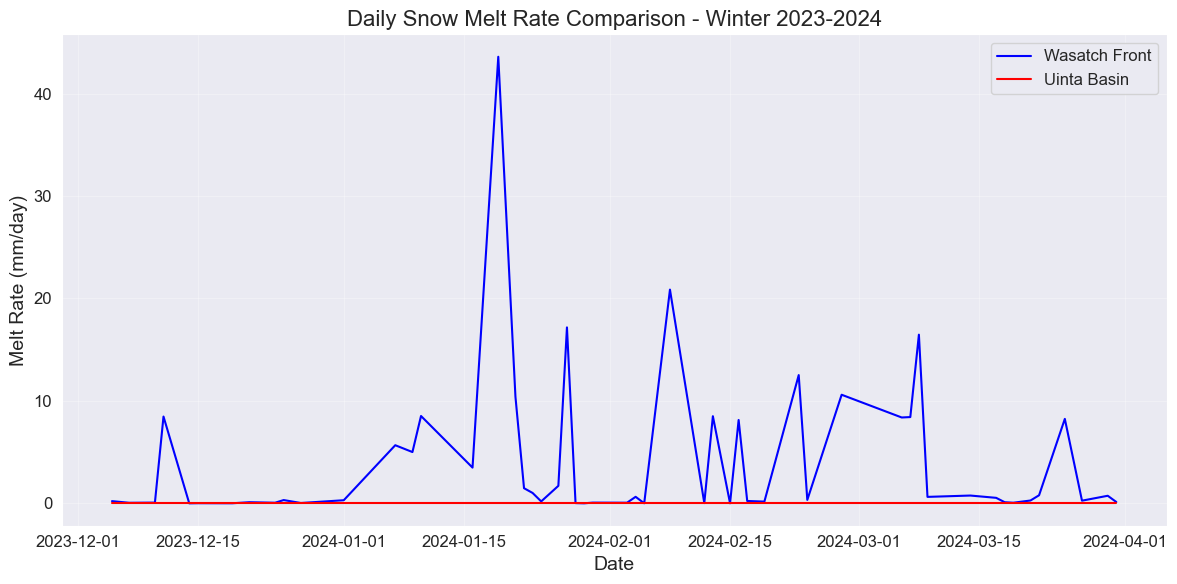

Melt rate comparison chart saved as melt_rate_comparison_winter_2023-2024.png


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

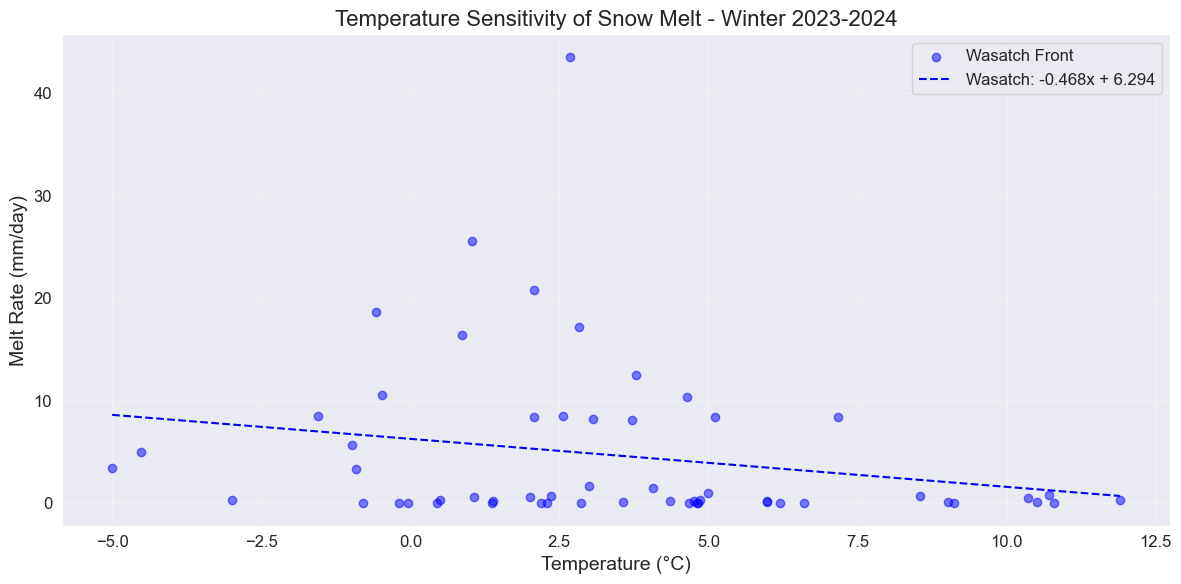

Temperature sensitivity chart saved as snow_shadow_temp_sensitivity_winter_2023-2024.png

--- GENERATING SNOW SHADOW REPORT ---
Snow shadow report saved to snow_shadow_report_winter_2023-2024.txt


<Figure size 1200x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

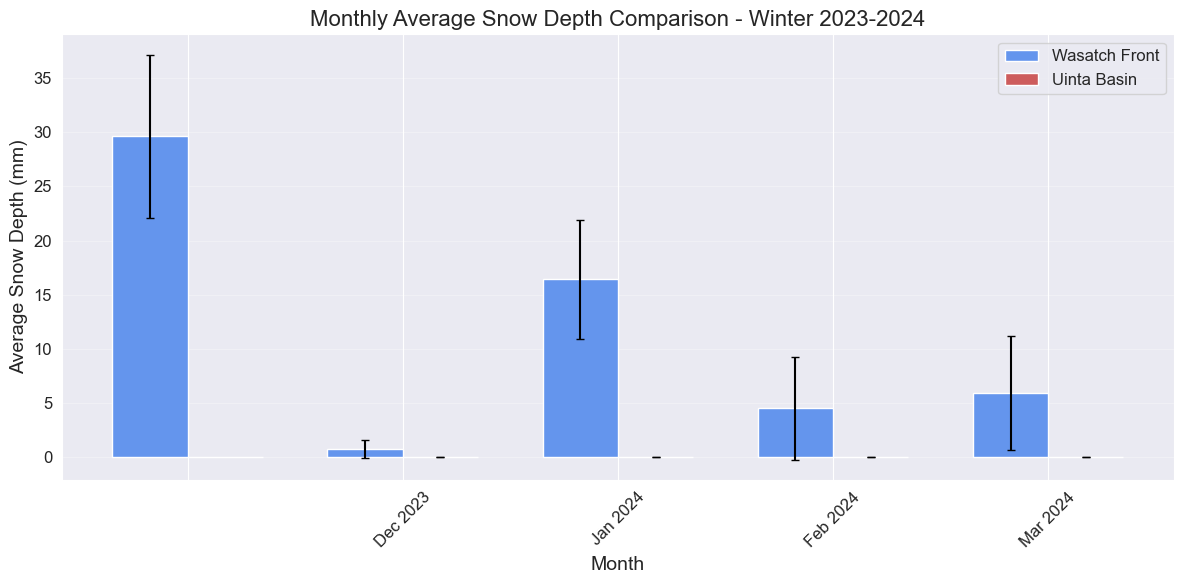

Monthly comparison chart saved as monthly_snow_depth_winter_2023-2024.png


<Figure size 1200x800 with 0 Axes>

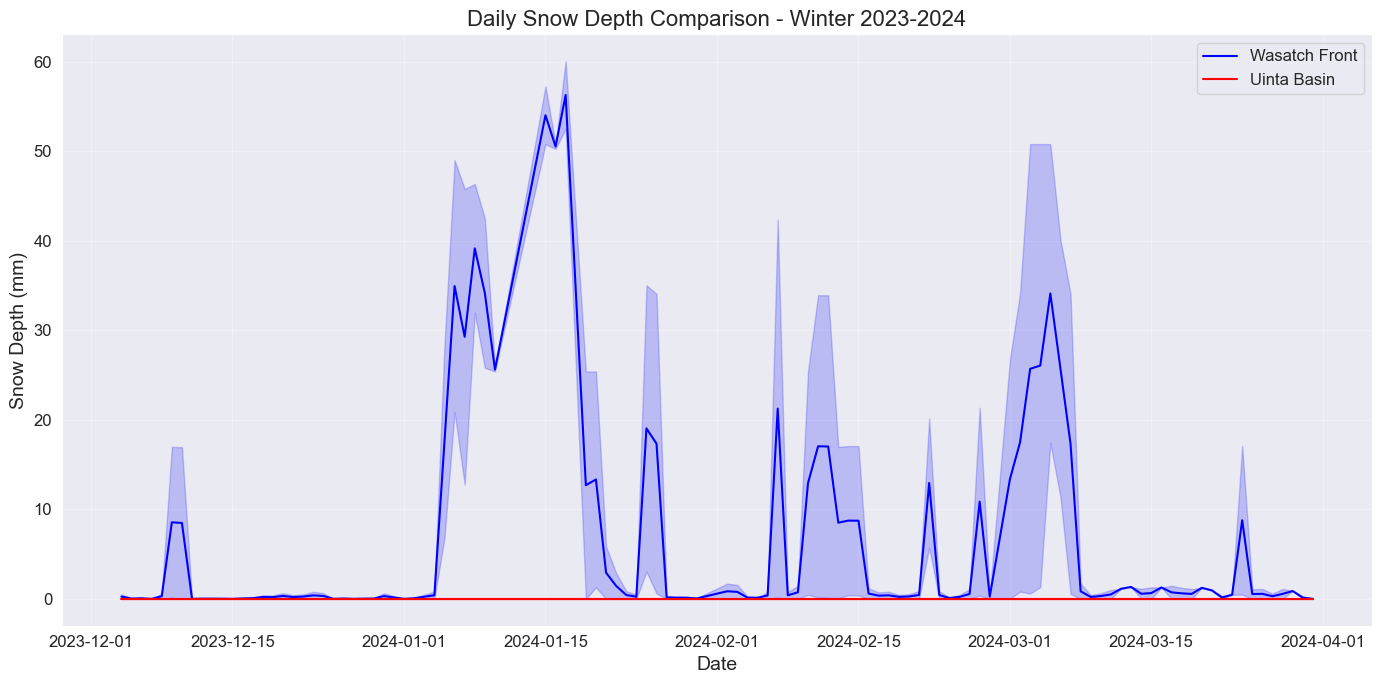

Daily snow depth chart saved as daily_snow_depth_winter_2023-2024.png
Daily snow depth and melt data saved to CSV files


'\n# Execute the analysis for each winter period\nall_results = {}\n\nfor winter in winter_periods:\n    print(f"\n\n{\'=\'*80}")\n    print(f"ANALYZING {winter[\'name\']}")\n    print(f"{\'=\'*80}")\n\n    # Run the analysis for this winter\n    results, data = analyze_snow_depth(winter)\n\n    if results is not None:\n        all_results[winter[\'name\']] = results\n\n# After all winters are analyzed, run the decade summary\nif len(all_results) > 0:\n    print("\n\n")\n    print("="*80)\n    print("DECADE SUMMARY ANALYSIS")\n    print("="*80)\n    summarize_decade_analysis(all_results)\n\n    # Save all results\n    print("\nSaving all results to file...")\n    with open(\'snow_analysis_results.pkl\', \'wb\') as f:\n        pickle.dump(all_results, f)\n    print("Analysis complete. Results saved to snow_analysis_results.pkl")\n'

In [7]:
%matplotlib inline
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import pandas as pd
import seaborn as sns
import synoptic
from scipy import stats
import statsmodels.api as sm
import os
import pickle

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Set token - try to get from environment or configuration
import os
token = os.environ.get("SYNOPTIC_TOKEN", None)  # First try to get from environment

# If not in environment, the synoptic library will check the configuration file
# If neither is available, it will show the proper error message with instructions

# Define 10 years of winter periods to analyze (Dec-Mar only)
winter_periods = [
    # Winter 2023-2024 (current winter - changed from 2024-2025 which is in the future)
    {
    "name": "Winter 2023-2024",
    "chunks": [
        {"start": datetime(2023, 12, 1), "end": datetime(2023, 12, 31), "month": "Dec 2023"},
        {"start": datetime(2024, 1, 1), "end": datetime(2024, 1, 31), "month": "Jan 2024"},
        {"start": datetime(2024, 2, 1), "end": datetime(2024, 2, 29), "month": "Feb 2024"},
        {"start": datetime(2024, 3, 1), "end": datetime(2024, 3, 31), "month": "Mar 2024"}
        ]
    },
    # Winter 2022-2023 (previous winter)
    {
        "name": "Winter 2022-2023",
        "chunks": [
            {"start": datetime(2022, 12, 1), "end": datetime(2022, 12, 31), "month": "Dec 2022"},
            {"start": datetime(2023, 1, 1), "end": datetime(2023, 1, 31), "month": "Jan 2023"},
            {"start": datetime(2023, 2, 1), "end": datetime(2023, 2, 28), "month": "Feb 2023"},
            {"start": datetime(2023, 3, 1), "end": datetime(2023, 3, 31), "month": "Mar 2023"}
        ]
    },
    # Winter 2021-2022
    {
        "name": "Winter 2021-2022",
        "chunks": [
            {"start": datetime(2021, 12, 1), "end": datetime(2021, 12, 31), "month": "Dec 2021"},
            {"start": datetime(2022, 1, 1), "end": datetime(2022, 1, 31), "month": "Jan 2022"},
            {"start": datetime(2022, 2, 1), "end": datetime(2022, 2, 28), "month": "Feb 2022"},
            {"start": datetime(2022, 3, 1), "end": datetime(2022, 3, 31), "month": "Mar 2022"}
        ]
    },
    # Winter 2020-2021
    {
        "name": "Winter 2020-2021",
        "chunks": [
            {"start": datetime(2020, 12, 1), "end": datetime(2020, 12, 31), "month": "Dec 2020"},
            {"start": datetime(2021, 1, 1), "end": datetime(2021, 1, 31), "month": "Jan 2021"},
            {"start": datetime(2021, 2, 1), "end": datetime(2021, 2, 28), "month": "Feb 2021"},
            {"start": datetime(2021, 3, 1), "end": datetime(2021, 3, 31), "month": "Mar 2021"}
        ]
    },
    # Winter 2019-2020
    {
        "name": "Winter 2019-2020",
        "chunks": [
            {"start": datetime(2019, 12, 1), "end": datetime(2019, 12, 31), "month": "Dec 2019"},
            {"start": datetime(2020, 1, 1), "end": datetime(2020, 1, 31), "month": "Jan 2020"},
            {"start": datetime(2020, 2, 1), "end": datetime(2020, 2, 29), "month": "Feb 2020"},
            {"start": datetime(2020, 3, 1), "end": datetime(2020, 3, 31), "month": "Mar 2020"}
        ]
    },
    # Winter 2018-2019
    {
        "name": "Winter 2018-2019",
        "chunks": [
            {"start": datetime(2018, 12, 1), "end": datetime(2018, 12, 31), "month": "Dec 2018"},
            {"start": datetime(2019, 1, 1), "end": datetime(2019, 1, 31), "month": "Jan 2019"},
            {"start": datetime(2019, 2, 1), "end": datetime(2019, 2, 28), "month": "Feb 2019"},
            {"start": datetime(2019, 3, 1), "end": datetime(2019, 3, 31), "month": "Mar 2019"}
        ]
    },
    # Winter 2017-2018
    {
        "name": "Winter 2017-2018",
        "chunks": [
            {"start": datetime(2017, 12, 1), "end": datetime(2017, 12, 31), "month": "Dec 2017"},
            {"start": datetime(2018, 1, 1), "end": datetime(2018, 1, 31), "month": "Jan 2018"},
            {"start": datetime(2018, 2, 1), "end": datetime(2018, 2, 28), "month": "Feb 2018"},
            {"start": datetime(2018, 3, 1), "end": datetime(2018, 3, 31), "month": "Mar 2018"}
        ]
    },
    # Winter 2016-2017
    {
        "name": "Winter 2016-2017",
        "chunks": [
            {"start": datetime(2016, 12, 1), "end": datetime(2016, 12, 31), "month": "Dec 2016"},
            {"start": datetime(2017, 1, 1), "end": datetime(2017, 1, 31), "month": "Jan 2017"},
            {"start": datetime(2017, 2, 1), "end": datetime(2017, 2, 28), "month": "Feb 2017"},
            {"start": datetime(2017, 3, 1), "end": datetime(2017, 3, 31), "month": "Mar 2017"}
        ]
    },
]

print("Analyzing snow depth and melt rate comparison between Uinta Basin and Wasatch Front")
print("Focusing on winter months (December-March) over a 10-year period")

# Define stations for each region with all variables
wasatch_front_stations = {
    "snow_depth": ["KHIF", "KSLC", "UTORM", "COOPPROU1"],
    "air_temp": ["QHW", "QLN", "QHV", "QBV", "QCV"],
    "solar_radiation": ["QHW", "QLN", "QBV"],
    "wind_speed": ["QHW", "QLN", "QHV", "QBV", "QCV"]
}

uinta_basin_stations = {
    "snow_depth": ["COOPDSNU1", "COOPFTDU1", "COOPJENU1", "COOPVELU1"],
    "air_temp": ["QV4", "QRS", "A1388", "UCL13"],
    "solar_radiation": ["QV4", "UCL13"],
    "wind_speed": ["QV4", "QRS", "UCL13"]
}

# Station name mappings
station_names = {
    # Wasatch Front - Snow Depth
    "KHIF": "Hill Air Force Base",
    "KSLC": "Salt Lake City",
    "UTORM": "I-15 @ Orem",
    "COOPPROU1": "PROVO BYU",

    # Uinta Basin - Snow Depth
    "COOPDSNU1": "DUCHESNE",
    "COOPFTDU1": "FORT DUCHESNE",
    "COOPJENU1": "JENSEN",
    "COOPVELU1": "VERNAL",

    # Wasatch Front - Additional Variables
    "QHW": "Hawthorne",
    "QLN": "Lindon",
    "QHV": "Harrisville",
    "QBV": "Bountiful - Viewmont",
    "QCV": "Copperview",

    # Uinta Basin - Additional Variables
    "QV4": "Vernal",
    "QRS": "Roosevelt",
    "A1388": "Myton",
    "UCL13": "Duchesne - Agrimet DUCU"
}

print("\n=== DEFINING REGIONS AND STATIONS ===")
print("\nWasatch Front Snow Depth Stations:")
print("  " + ", ".join([f"{id} ({station_names[id]})" for id in wasatch_front_stations['snow_depth']]))

print("\nUinta Basin Snow Depth Stations:")
print("  " + ", ".join([f"{id} ({station_names[id]})" for id in uinta_basin_stations['snow_depth']]))

print("\nWasatch Front Weather Stations:")
print("  " + ", ".join([f"{id} ({station_names[id]})" for id in wasatch_front_stations['air_temp']]))

print("\nUinta Basin Weather Stations:")
print("  " + ", ".join([f"{id} ({station_names[id]})" for id in uinta_basin_stations['air_temp']]))

# Function to filter outliers using IQR method
def filter_outliers_iqr(df, value_column, k=1.5):
    """
    Remove outliers based on IQR method (commonly used in scientific papers)
    k: multiplier for IQR (typically 1.5 or 3)
    """
    try:
        # Calculate Q1 and Q3
        q1 = df[value_column].quantile(0.25)
        q3 = df[value_column].quantile(0.75)

        # Calculate IQR
        iqr = q3 - q1

        # Define bounds
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        # Filter values within bounds
        filtered_df = df.filter((df[value_column] >= lower_bound) & (df[value_column] <= upper_bound))

        # Report how many outliers were removed
        outliers_count = len(df) - len(filtered_df)
        if outliers_count > 0:
            print(f"    Removed {outliers_count} outliers from {value_column} using IQR method")

        return filtered_df
    except Exception as e:
        print(f"Error filtering outliers: {e}")
        return df  # Return original dataframe if error

# Function to ensure datetime objects have consistent timezone for comparisons
def standardize_date_comparison(data_df, date_obj):
    """
    Ensure datetime objects have consistent timezone for comparison
    """
    if data_df is None or len(data_df) == 0:
        return date_obj

    # Check if the DataFrame datetime has timezone info
    if "date_time" in data_df.columns:
        # Get a sample datetime from the data - using iloc for pandas
        sample_dt = data_df["date_time"].iloc[0] if len(data_df) > 0 else None

        # If the sample has timezone but our comparison date doesn't,
        # add matching timezone to the comparison date
        if sample_dt and hasattr(sample_dt, 'tzinfo') and sample_dt.tzinfo is not None and date_obj.tzinfo is None:
            # Return a new date with matching timezone
            return date_obj.replace(tzinfo=sample_dt.tzinfo)

    # Otherwise return the original date
    return date_obj

# Function to collect and merge data from multiple monthly chunks
def collect_monthly_data(station, winter, variable):
    """Collect data for a station across all months of winter period"""
    all_data = []

    for chunk in winter['chunks']:
        try:
            print(f"  Retrieving {variable} data for {chunk['month']} from {station} ({station_names[station]})...")
            data = synoptic.TimeSeries(
                stid=station,
                start=chunk['start'],
                end=chunk['end'],
                vars=variable,
                token="YOUR_TOKEN_HERE"  # Replace with your token
            ).df()

            if data is not None and len(data) > 0:
                all_data.append(data)
                print(f"    Retrieved {len(data)} records")
            else:
                print(f"    No data available")

        except Exception as e:
            print(f"    Error: {e}")

    # Combine all monthly chunks
    if all_data:
        try:
            combined_data = pl.concat(all_data)
            return combined_data
        except Exception as e:
            print(f"Error combining data: {e}")
            # Return the first chunk if we can't combine
            if len(all_data) > 0:
                return all_data[0]

    return None

# Function to collect data from all stations in a region
def collect_regional_data(stations, winter, variable):
    """Collect data from all stations in a region for a variable"""
    all_station_data = []
    used_stations = []

    for station in stations:
        station_data = collect_monthly_data(station, winter, variable)
        if station_data is not None and len(station_data) > 0:
            # Add station identifier column
            station_data = station_data.with_columns(pl.lit(station).alias("station"))
            all_station_data.append(station_data)
            used_stations.append(station)

    # Combine all station data
    if all_station_data:
        try:
            combined_data = pl.concat(all_station_data)
            return combined_data, used_stations
        except Exception as e:
            print(f"Error combining station data: {e}")
            return None, []

    return None, []

# Function to create daily snow depth dataset for both regions
def create_daily_snow_depth_dataset(winter):
    """
    Create a daily snow depth dataset for both regions.

    Returns:
    --------
    DataFrame with daily snow depth data for both regions
    """
    print(f"\n--- CREATING DAILY SNOW DEPTH DATASET FOR {winter['name']} ---")

    # Get data for both regions
    print(f"\nRetrieving Uinta Basin snow depth data...")
    uinta_snow, uinta_stations_used = collect_regional_data(uinta_basin_stations["snow_depth"], winter, "snow_depth")

    print(f"\nRetrieving Wasatch Front snow depth data...")
    wasatch_snow, wasatch_stations_used = collect_regional_data(wasatch_front_stations["snow_depth"], winter, "snow_depth")

    # Create daily snow depth dataset
    if uinta_snow is not None and wasatch_snow is not None:
        try:
            # Aggregate data by date (daily average)
            uinta_daily = uinta_snow.group_by(
                [pl.col("date_time").dt.date(), "station"]
            ).agg(
                pl.col("value").mean().alias("daily_snow_depth")
            )

            # Apply outlier filtering to each region's data
            print("Filtering outliers in Uinta Basin data...")
            uinta_daily = filter_outliers_iqr(uinta_daily, "daily_snow_depth")

            # Average across stations for each day with additional statistics
            uinta_region_daily = uinta_daily.group_by(
                pl.col("date_time")
            ).agg(
                pl.col("daily_snow_depth").mean().alias("uinta_basin_snow_depth"),
                pl.col("daily_snow_depth").std().alias("uinta_basin_snow_depth_std"),
                pl.col("daily_snow_depth").count().alias("uinta_basin_station_count")
            ).sort("date_time")

            wasatch_daily = wasatch_snow.group_by(
                [pl.col("date_time").dt.date(), "station"]
            ).agg(
                pl.col("value").mean().alias("daily_snow_depth")
            )

            # Apply outlier filtering
            print("Filtering outliers in Wasatch Front data...")
            wasatch_daily = filter_outliers_iqr(wasatch_daily, "daily_snow_depth")

            # Average across stations for each day with additional statistics
            wasatch_region_daily = wasatch_daily.group_by(
                pl.col("date_time")
            ).agg(
                pl.col("daily_snow_depth").mean().alias("wasatch_front_snow_depth"),
                pl.col("daily_snow_depth").std().alias("wasatch_front_snow_depth_std"),
                pl.col("daily_snow_depth").count().alias("wasatch_front_station_count")
            ).sort("date_time")

            # Join the two datasets
            daily_data = uinta_region_daily.join(
                wasatch_region_daily,
                on="date_time",
                how="full"
            )

            # Fill missing values with 0
            daily_data = daily_data.fill_null(0)

            # Rename date_time to date for clarity
            daily_data = daily_data.rename({"date_time": "date"})

            # Add winter month information
            daily_data = daily_data.with_columns(
                pl.when(pl.col("date").dt.month() == 12)
                .then(pl.lit(0))  # December
                .when(pl.col("date").dt.month() == 1)
                .then(pl.lit(1))  # January
                .when(pl.col("date").dt.month() == 2)
                .then(pl.lit(2))  # February
                .when(pl.col("date").dt.month() == 3)
                .then(pl.lit(3))  # March
                .otherwise(pl.lit(-1))
                .alias("winter_month_idx")
            )

            # Add a string version of the winter month
            daily_data = daily_data.with_columns(
                pl.when(pl.col("winter_month_idx") == 0)
                .then(pl.lit("Dec"))
                .when(pl.col("winter_month_idx") == 1)
                .then(pl.lit("Jan"))
                .when(pl.col("winter_month_idx") == 2)
                .then(pl.lit("Feb"))
                .when(pl.col("winter_month_idx") == 3)
                .then(pl.lit("Mar"))
                .otherwise(pl.lit("Unknown"))
                .alias("winter_month")
            )

            # Add the year to the winter month label
            daily_data = daily_data.with_columns(
                pl.col("date").dt.year().cast(pl.Utf8).alias("year")
            )

            # Create combined winter month label (like "Dec 2022", "Jan 2023", etc.)
            daily_data = daily_data.with_columns(
                (pl.col("winter_month") + " " + pl.col("year")).alias("winter_month_label")
            )

            # Add a column for snow depth difference
            daily_data = daily_data.with_columns(
                (pl.col("wasatch_front_snow_depth") - pl.col("uinta_basin_snow_depth")).alias("snow_depth_diff")
            )

            # Calculate standard errors
            daily_data = daily_data.with_columns(
                (pl.col("wasatch_front_snow_depth_std") / (pl.col("wasatch_front_station_count").sqrt())).alias("wasatch_front_snow_depth_se"),
                (pl.col("uinta_basin_snow_depth_std") / (pl.col("uinta_basin_station_count").sqrt())).alias("uinta_basin_snow_depth_se")
            )

            print(f"Created daily dataset with {len(daily_data)} days")
            return daily_data, uinta_stations_used, wasatch_stations_used

        except Exception as e:
            print(f"Error creating daily dataset: {e}")
            import traceback
            traceback.print_exc()
            return None, [], []
    else:
        if uinta_snow is None:
            print("No snow depth data available for Uinta Basin stations")
        if wasatch_snow is None:
            print("No snow depth data available for Wasatch Front stations")

        return None, [], []

# Function to collect weather data (temperature, solar radiation, wind)
def collect_weather_data(winter, regions=None):
    """
    Collect weather data (temp, solar radiation, wind) for both regions for a winter period.

    Parameters:
    winter (dict): Winter period information
    regions (list): Optional list of regions to collect data for ('wasatch', 'uinta', or both)

    Returns:
    Dictionary with weather data for each region
    """
    if regions is None:
        regions = ['wasatch', 'uinta']

    weather_data = {}
    variables = ['air_temp', 'solar_radiation', 'wind_speed']

    for region in regions:
        region_key = 'wasatch_front' if region == 'wasatch' else 'uinta_basin'
        stations_dict = wasatch_front_stations if region == 'wasatch' else uinta_basin_stations
        weather_data[region_key] = {}

        for variable in variables:
            print(f"\nRetrieving {variable} data for {region_key.replace('_', ' ').title()}...")

            if variable not in stations_dict or not stations_dict[variable]:
                print(f"  No stations defined for {variable} in {region_key}")
                continue

            variable_data, stations_used = collect_regional_data(stations_dict[variable], winter, variable)

            if variable_data is not None and len(variable_data) > 0:
                # Aggregate to daily averages
                daily_agg = variable_data.group_by(
                    [pl.col("date_time").dt.date(), "station"]
                ).agg(
                    pl.col("value").mean().alias(f"daily_{variable}")
                )

                # Filter outliers
                print(f"Filtering outliers in {region_key} {variable} data...")
                daily_agg = filter_outliers_iqr(daily_agg, f"daily_{variable}")

                # Average across stations for each day
                daily_region = daily_agg.group_by(
                    pl.col("date_time")
                ).agg(
                    pl.col(f"daily_{variable}").mean().alias(f"{region_key}_{variable}"),
                    pl.col(f"daily_{variable}").std().alias(f"{region_key}_{variable}_std"),
                    pl.col(f"daily_{variable}").count().alias(f"{region_key}_{variable}_count")
                ).sort("date_time")

                # Rename date_time to date for consistency
                daily_region = daily_region.rename({"date_time": "date"})

                weather_data[region_key][variable] = daily_region
                print(f"  Processed {len(daily_region)} days of {variable} data for {region_key}")
            else:
                print(f"  No {variable} data available for {region_key}")

    return weather_data

# Function to merge snow and weather data
def merge_snow_and_weather_data(snow_data, weather_data):
    """
    Merge snow depth data with weather data into a single dataset.

    Parameters:
    snow_data (DataFrame): Daily snow depth data
    weather_data (dict): Weather data dictionary returned by collect_weather_data

    Returns:
    DataFrame with combined snow and weather data
    """
    # Start with snow data
    combined_data = snow_data

    # For each region and variable, join to the combined data
    for region in ['wasatch_front', 'uinta_basin']:
        if region in weather_data:
            for variable in ['air_temp', 'solar_radiation', 'wind_speed']:
                if variable in weather_data[region]:
                    variable_df = weather_data[region][variable]

                    # Join with the combined data
                    combined_data = combined_data.join(
                        variable_df,
                        on="date",
                        how="left"
                    )

    # Fill missing weather values with appropriate methods
    # For temperature, use linear interpolation for small gaps
    temp_cols = [col for col in combined_data.columns if 'air_temp' in col and 'std' not in col and 'count' not in col]
    for col in temp_cols:
        # Convert to pandas for interpolation then back to polars
        try:
            temp_series = combined_data[col].to_pandas()
            temp_series = temp_series.interpolate(method='linear', limit=3)  # Fill gaps up to 3 days
            combined_data = combined_data.with_columns(pl.Series(name=col, values=temp_series))
        except Exception as e:
            print(f"Could not interpolate {col}: {e}")

    return combined_data

# Function to calculate snow melt rates
def calculate_melt_rates(daily_data):
    """
    Calculate snow melt rates for both regions.

    Parameters:
    daily_data (DataFrame): Daily snow depth data from create_daily_snow_depth_dataset

    Returns:
    DataFrame with melt rate calculations added
    """
    # Convert to pandas for easier window calculations
    data_pd = daily_data.to_pandas()
    data_pd['date'] = pd.to_datetime(data_pd['date'])
    data_pd = data_pd.sort_values('date')

    # Calculate day-to-day changes (negative = melt, positive = accumulation)
    # For both regions
    data_pd['wasatch_depth_change'] = data_pd['wasatch_front_snow_depth'].diff() * -1
    data_pd['uinta_depth_change'] = data_pd['uinta_basin_snow_depth'].diff() * -1

    # Calculate melt rates (only where change is positive = actual melting)
    data_pd['wasatch_melt_rate'] = np.where(
        data_pd['wasatch_depth_change'] > 0,
        data_pd['wasatch_depth_change'],
        0
    )
    data_pd['uinta_melt_rate'] = np.where(
        data_pd['uinta_depth_change'] > 0,
        data_pd['uinta_depth_change'],
        0
    )

    # Calculate consecutive melt days
    data_pd['wasatch_melt_day'] = data_pd['wasatch_melt_rate'] > 0
    data_pd['uinta_melt_day'] = data_pd['uinta_melt_rate'] > 0

    # Calculate persistence metrics
    data_pd['wasatch_melt_streak'] = data_pd['wasatch_melt_day'].groupby(
        (data_pd['wasatch_melt_day'] != data_pd['wasatch_melt_day'].shift()).cumsum()
    ).cumcount() + 1
    data_pd['uinta_melt_streak'] = data_pd['uinta_melt_day'].groupby(
        (data_pd['uinta_melt_day'] != data_pd['uinta_melt_day'].shift()).cumsum()
    ).cumcount() + 1

    # Convert back to polars
    result = pl.from_pandas(data_pd)
    return result

# Function to analyze snow persistence
def analyze_snow_persistence(daily_data_with_melt):
    """
    Analyze snow persistence between regions.

    Parameters:
    daily_data_with_melt (DataFrame): Result from calculate_melt_rates

    Returns:
    Dictionary with persistence metrics
    """
    # Convert to pandas for easier analytics
    data = daily_data_with_melt.to_pandas()

    # For each winter month, calculate stats
    try:
        persistence_by_month = data.groupby('winter_month_label').agg({
            'wasatch_melt_rate': ['mean', 'max'],
            'uinta_melt_rate': ['mean', 'max'],
            'wasatch_melt_streak': 'max',
            'uinta_melt_streak': 'max'
        })
    except Exception as e:
        print(f"Error calculating monthly persistence: {e}")
        persistence_by_month = None

    # Calculate time to melt specific percentages
    # Start by finding the peak snow depth for each region
    wasatch_peak = data['wasatch_front_snow_depth'].max()
    uinta_peak = data['uinta_basin_snow_depth'].max()

    # Find dates of peak depth
    try:
        wasatch_peak_date = data.loc[data['wasatch_front_snow_depth'] == wasatch_peak, 'date'].min()
        uinta_peak_date = data.loc[data['uinta_basin_snow_depth'] == uinta_peak, 'date'].min()
    except Exception as e:
        print(f"Error finding peak dates: {e}")
        wasatch_peak_date = None
        uinta_peak_date = None

    # Define thresholds (e.g., days to melt 25%, 50%, 75%, 90% of peak)
    thresholds = [0.75, 0.50, 0.25, 0.10]

    persistence_metrics = {
        'wasatch_peak': wasatch_peak,
        'uinta_peak': uinta_peak,
        'wasatch_peak_date': wasatch_peak_date,
        'uinta_peak_date': uinta_peak_date,
        'thresholds': {}
    }

    for threshold in thresholds:
        # Calculate threshold values
        wasatch_threshold = wasatch_peak * threshold
        uinta_threshold = uinta_peak * threshold

        # Find first date after peak where depth falls below threshold
        if wasatch_peak_date is not None:
            wasatch_data = data[data['date'] >= wasatch_peak_date]
            try:
                wasatch_date = wasatch_data[wasatch_data['wasatch_front_snow_depth'] <= wasatch_threshold]['date'].min()
                if pd.notna(wasatch_date):
                    wasatch_days = (wasatch_date - wasatch_peak_date).days
                else:
                    wasatch_days = None
            except:
                wasatch_days = None

        if uinta_peak_date is not None:
            uinta_data = data[data['date'] >= uinta_peak_date]
            try:
                uinta_date = uinta_data[uinta_data['uinta_basin_snow_depth'] <= uinta_threshold]['date'].min()
                if pd.notna(uinta_date):
                    uinta_days = (uinta_date - uinta_peak_date).days
                else:
                    uinta_days = None
            except:
                uinta_days = None
        else:
            uinta_days = None

        persistence_metrics['thresholds'][f'{int((1-threshold) * 100)}%_melt'] = {
            'wasatch_days': wasatch_days,
            'uinta_days': uinta_days,
            'difference': None if wasatch_days is None or uinta_days is None else wasatch_days - uinta_days
        }

    # Add monthly persistence stats
    persistence_metrics['monthly'] = persistence_by_month

    return persistence_metrics

# Function to analyze factors affecting snow melt
def analyze_melt_factors(data_with_melt):
    """
    Analyze factors affecting snow melt rates.

    Parameters:
    data_with_melt (DataFrame): Data with melt rates and weather variables

    Returns:
    Dictionary with correlation analysis and regression results
    """
    # Convert to pandas for statistical analysis
    data_pd = data_with_melt.to_pandas()

    # Only analyze days with actual melting
    wasatch_melt_days = data_pd[data_pd['wasatch_melt_rate'] > 0].copy()
    uinta_melt_days = data_pd[data_pd['uinta_melt_rate'] > 0].copy()

    results = {'wasatch': {}, 'uinta': {}}

    # Check if we have enough data for analysis
    if len(wasatch_melt_days) < 5 or len(uinta_melt_days) < 5:
        return {
            'status': 'insufficient_data',
            'message': 'Not enough melt days for robust analysis'
        }

    # Correlation analysis for Wasatch Front
    wasatch_correlations = {}
    for var in ['wasatch_front_air_temp', 'wasatch_front_solar_radiation', 'wasatch_front_wind_speed']:
        if var in wasatch_melt_days.columns:
            try:
                corr = wasatch_melt_days['wasatch_melt_rate'].corr(wasatch_melt_days[var])
                wasatch_correlations[var] = corr
            except Exception as e:
                print(f"Error calculating correlation for {var}: {e}")

    # Correlation analysis for Uinta Basin
    uinta_correlations = {}
    for var in ['uinta_basin_air_temp', 'uinta_basin_solar_radiation', 'uinta_basin_wind_speed']:
        if var in uinta_melt_days.columns:
            try:
                corr = uinta_melt_days['uinta_melt_rate'].corr(uinta_melt_days[var])
                uinta_correlations[var] = corr
            except Exception as e:
                print(f"Error calculating correlation for {var}: {e}")

    # Linear regression for Wasatch Front melt rate vs temperature
    # Wasatch regression
    if 'wasatch_front_air_temp' in wasatch_melt_days.columns:
        try:
            # Simple linear regression first
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                wasatch_melt_days['wasatch_front_air_temp'],
                wasatch_melt_days['wasatch_melt_rate']
            )

            wasatch_temp_model = {
                'slope': slope,
                'intercept': intercept,
                'r_squared': r_value**2,
                'p_value': p_value,
                'std_err': std_err
            }

            # Try multiple regression if we have solar radiation
            if 'wasatch_front_solar_radiation' in wasatch_melt_days.columns:
                X = wasatch_melt_days[['wasatch_front_air_temp', 'wasatch_front_solar_radiation']]
                X = sm.add_constant(X)
                y = wasatch_melt_days['wasatch_melt_rate']

                try:
                    model = sm.OLS(y, X).fit()
                    wasatch_multi_model = {
                        'r_squared': model.rsquared,
                        'adj_r_squared': model.rsquared_adj,
                        'p_values': model.pvalues.to_dict(),
                        'params': model.params.to_dict()
                    }
                    results['wasatch']['multi_model'] = wasatch_multi_model
                except Exception as e:
                    print(f"Error in Wasatch multiple regression: {e}")

            results['wasatch']['temp_model'] = wasatch_temp_model
        except Exception as e:
            print(f"Error in Wasatch temperature regression: {e}")

    # Uinta regression
    if 'uinta_basin_air_temp' in uinta_melt_days.columns:
        try:
            # Simple linear regression first
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                uinta_melt_days['uinta_basin_air_temp'],
                uinta_melt_days['uinta_melt_rate']
            )

            uinta_temp_model = {
                'slope': slope,
                'intercept': intercept,
                'r_squared': r_value**2,
                'p_value': p_value,
                'std_err': std_err
            }

            # Try multiple regression if we have solar radiation
            if 'uinta_basin_solar_radiation' in uinta_melt_days.columns:
                X = uinta_melt_days[['uinta_basin_air_temp', 'uinta_basin_solar_radiation']]
                X = sm.add_constant(X)
                y = uinta_melt_days['uinta_melt_rate']

                try:
                    model = sm.OLS(y, X).fit()
                    uinta_multi_model = {
                        'r_squared': model.rsquared,
                        'adj_r_squared': model.rsquared_adj,
                        'p_values': model.pvalues.to_dict(),
                        'params': model.params.to_dict()
                    }
                    results['uinta']['multi_model'] = uinta_multi_model
                except Exception as e:
                    print(f"Error in Uinta multiple regression: {e}")

            results['uinta']['temp_model'] = uinta_temp_model
        except Exception as e:
            print(f"Error in Uinta temperature regression: {e}")

    results['wasatch']['correlations'] = wasatch_correlations
    results['uinta']['correlations'] = uinta_correlations

    # Determine the snow shadow effect by comparing melt sensitivity to temperature
    if 'temp_model' in results['wasatch'] and 'temp_model' in results['uinta']:
        # Higher slope means more sensitive to temperature changes
        wasatch_slope = results['wasatch']['temp_model']['slope']
        uinta_slope = results['uinta']['temp_model']['slope']

        temp_sensitivity_ratio = wasatch_slope / uinta_slope if uinta_slope != 0 else float('inf')

        results['snow_shadow_evidence'] = {
            'temp_sensitivity_ratio': temp_sensitivity_ratio,
            'interpretation': (
                "Strong evidence for snow shadow effect" if temp_sensitivity_ratio < 0.7 else
                "Moderate evidence for snow shadow effect" if temp_sensitivity_ratio < 0.9 else
                "Weak evidence for snow shadow effect" if temp_sensitivity_ratio < 1.0 else
                "No evidence for snow shadow effect"
            )
        }

    results['status'] = 'success'
    return results

# Function to conduct statistical tests between regions
def conduct_statistical_tests(daily_data):
    """
    Perform statistical tests to compare the two regions
    """
    from scipy import stats

    # Convert to pandas for statistical testing
    daily_pd = daily_data.to_pandas()

    # T-test for overall difference
    t_stat, p_value = stats.ttest_ind(
        daily_pd['wasatch_front_snow_depth'].values,
        daily_pd['uinta_basin_snow_depth'].values,
        equal_var=False  # Use Welch's t-test which does not assume equal variances
    )

    print("\n=== STATISTICAL TESTS ===")
    print(f"T-test comparing overall snow depth between regions:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  {'Statistically significant difference (p < 0.05)' if p_value < 0.05 else 'No statistically significant difference (p >= 0.05)'}")

    # Monthly tests
    monthly_tests = []
    for month_idx in range(4):  # 0-3 for Dec-Mar
        month_data = daily_pd[daily_pd['winter_month_idx'] == month_idx]
        if len(month_data) > 0:
            month_name = ["December", "January", "February", "March"][month_idx]
            month_t, month_p = stats.ttest_ind(
                month_data['wasatch_front_snow_depth'].values,
                month_data['uinta_basin_snow_depth'].values,
                equal_var=False
            )
            monthly_tests.append({
                'month': month_name,
                't_stat': month_t,
                'p_value': month_p,
                'significant': month_p < 0.05
            })

    print("\nMonthly t-tests:")
    for test in monthly_tests:
        print(f"  {test['month']}: t={test['t_stat']:.4f}, p={test['p_value']:.4f} {'(significant)' if test['significant'] else '(not significant)'}")

    return {
        'overall': {'t_stat': t_stat, 'p_value': p_value},
        'monthly': monthly_tests
    }

# Function to visualize melt rate comparison
def visualize_melt_comparison(daily_data_with_melt, winter):
    """
    Create visualizations comparing snow melt between regions.

    Parameters:
    daily_data_with_melt (DataFrame): Result from calculate_melt_rates
    winter (dict): Winter period information
    """
    # Convert to pandas for easier plotting
    data = daily_data_with_melt.to_pandas()
    data['date'] = pd.to_datetime(data['date'])

    # 1. Melt rate comparison
    plt.figure(figsize=(12, 6))

    # Only plot days with actual melting
    melt_data = data[(data['wasatch_melt_rate'] > 0) | (data['uinta_melt_rate'] > 0)]

    if len(melt_data) > 0:
        plt.plot(melt_data['date'], melt_data['wasatch_melt_rate'], 'b-', label='Wasatch Front')
        plt.plot(melt_data['date'], melt_data['uinta_melt_rate'], 'r-', label='Uinta Basin')

        plt.title(f'Daily Snow Melt Rate Comparison - {winter["name"]}')
        plt.xlabel('Date')
        plt.ylabel('Melt Rate (mm/day)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()  # This displays the plot in the notebook

        # Also save the figure to file
        filename = f'melt_rate_comparison_{winter["name"].replace(" ", "_").lower()}.png'
        plt.savefig(filename, dpi=300)
        print(f"Melt rate comparison chart saved as {filename}")

    # 2. Normalized snow depth from peak
    plt.figure(figsize=(12, 6))

    # Find peak snow depth dates
    wasatch_peak = data['wasatch_front_snow_depth'].max()
    uinta_peak = data['uinta_basin_snow_depth'].max()

    if wasatch_peak > 0 and uinta_peak > 0:
        try:
            wasatch_peak_date = data.loc[data['wasatch_front_snow_depth'] == wasatch_peak, 'date'].min()
            uinta_peak_date = data.loc[data['uinta_basin_snow_depth'] == uinta_peak, 'date'].min()

            # Create normalized snow depth series from peak
            if pd.notna(wasatch_peak_date) and pd.notna(uinta_peak_date):
                wasatch_from_peak = data[data['date'] >= wasatch_peak_date].copy()
                wasatch_from_peak['normalized_depth'] = wasatch_from_peak['wasatch_front_snow_depth'] / wasatch_peak * 100

                uinta_from_peak = data[data['date'] >= uinta_peak_date].copy()
                uinta_from_peak['normalized_depth'] = uinta_from_peak['uinta_basin_snow_depth'] / uinta_peak * 100

                # Plot normalized depths
                plt.plot(wasatch_from_peak['date'], wasatch_from_peak['normalized_depth'], 'b-',
                        label=f'Wasatch Front (from peak: {wasatch_peak_date.strftime("%b %d")})')
                plt.plot(uinta_from_peak['date'], uinta_from_peak['normalized_depth'], 'r-',
                        label=f'Uinta Basin (from peak: {uinta_peak_date.strftime("%b %d")})')

                # Add horizontal lines at threshold percentages
                thresholds = [75, 50, 25, 10]
                for threshold in thresholds:
                    plt.axhline(y=threshold, color='gray', linestyle='--', alpha=0.5)
                    plt.text(wasatch_from_peak['date'].min(), threshold + 2, f'{threshold}%', fontsize=8)

                plt.title(f'Normalized Snow Depth from Peak - {winter["name"]}')
                plt.xlabel('Date')
                plt.ylabel('Snow Depth (% of peak)')
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()  # This displays the plot in the notebook

                # Also save the figure if desired
                filename = f'normalized_melt_{winter["name"].replace(" ", "_").lower()}.png'
                plt.savefig(filename, dpi=300)
                print(f"Normalized melt chart saved as {filename}")
        except Exception as e:
            print(f"Error creating normalized snow depth chart: {e}")

    # 3. Cumulative melt
    plt.figure(figsize=(12, 6))

    # Calculate cumulative melt from peak
    try:
        if 'wasatch_from_peak' in locals() and 'uinta_from_peak' in locals():
            wasatch_from_peak['cumulative_melt'] = wasatch_from_peak['wasatch_melt_rate'].cumsum()
            uinta_from_peak['cumulative_melt'] = uinta_from_peak['uinta_melt_rate'].cumsum()

            plt.plot(wasatch_from_peak['date'], wasatch_from_peak['cumulative_melt'], 'b-',
                    label=f'Wasatch Front (from {wasatch_peak_date.strftime("%b %d")})')
            plt.plot(uinta_from_peak['date'], uinta_from_peak['cumulative_melt'], 'r-',
                    label=f'Uinta Basin (from {uinta_peak_date.strftime("%b %d")})')

            plt.title(f'Cumulative Snow Melt - {winter["name"]}')
            plt.xlabel('Date')
            plt.ylabel('Cumulative Melt (mm)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()  # This displays the plot in the notebook

            # Also save the figure if desired
            filename = f'cumulative_melt_{winter["name"].replace(" ", "_").lower()}.png'
            plt.savefig(filename, dpi=300)
            print(f"Cumulative melt chart saved as {filename}")
    except Exception as e:
        print(f"Error creating cumulative melt chart: {e}")

# Function to visualize snow shadow evidence
def visualize_snow_shadow_evidence(combined_data, winter, melt_factors):
    """
    Create visualizations specifically highlighting the snow shadow effect.

    Parameters:
    combined_data (DataFrame): Combined data with snow depth, melt rates, and weather
    winter (dict): Winter period information
    melt_factors (dict): Results from analyze_melt_factors function
    """
    # Convert to pandas for easier plotting
    data = combined_data.to_pandas()
    data['date'] = pd.to_datetime(data['date'])

    # 1. Temperature vs. Melt rate scatter plot with regression lines
    plt.figure(figsize=(12, 6))

    # Wasatch data
    wasatch_data = data[data['wasatch_melt_rate'] > 0]
    if 'wasatch_front_air_temp' in wasatch_data.columns and len(wasatch_data) > 0:
        plt.scatter(wasatch_data['wasatch_front_air_temp'], wasatch_data['wasatch_melt_rate'],
                  color='blue', alpha=0.5, label='Wasatch Front')

        # Add regression line
        try:
            z = np.polyfit(wasatch_data['wasatch_front_air_temp'], wasatch_data['wasatch_melt_rate'], 1)
            p = np.poly1d(z)
            x_range = np.linspace(wasatch_data['wasatch_front_air_temp'].min(),
                                wasatch_data['wasatch_front_air_temp'].max(), 100)
            plt.plot(x_range, p(x_range), 'b--',
                    label=f'Wasatch: {z[0]:.3f}x + {z[1]:.3f}')
        except Exception as e:
            print(f"Error creating Wasatch regression line: {e}")

    # Uinta data
    uinta_data = data[data['uinta_melt_rate'] > 0]
    if 'uinta_basin_air_temp' in uinta_data.columns and len(uinta_data) > 0:
        plt.scatter(uinta_data['uinta_basin_air_temp'], uinta_data['uinta_melt_rate'],
                  color='red', alpha=0.5, label='Uinta Basin')

        # Add regression line
        try:
            z = np.polyfit(uinta_data['uinta_basin_air_temp'], uinta_data['uinta_melt_rate'], 1)
            p = np.poly1d(z)
            x_range = np.linspace(uinta_data['uinta_basin_air_temp'].min(),
                                uinta_data['uinta_basin_air_temp'].max(), 100)
            plt.plot(x_range, p(x_range), 'r--',
                    label=f'Uinta: {z[0]:.3f}x + {z[1]:.3f}')
        except Exception as e:
            print(f"Error creating Uinta regression line: {e}")

    plt.title(f'Temperature Sensitivity of Snow Melt - {winter["name"]}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Melt Rate (mm/day)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add explanation text
    if melt_factors and melt_factors.get('status') == 'success' and 'snow_shadow_evidence' in melt_factors:
        # Get the interpretation from analysis results
        conclusion = melt_factors['snow_shadow_evidence']['interpretation']
        ratio = melt_factors['snow_shadow_evidence']['temp_sensitivity_ratio']

        annotation_text = f"Temperature sensitivity ratio (Wasatch/Uinta): {ratio:.2f}\n{conclusion}"
        plt.annotate(annotation_text, xy=(0.02, 0.95), xycoords='axes fraction',
                    fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()  # This displays the plot in the notebook

    # Also save the figure if desired
    filename = f'snow_shadow_temp_sensitivity_{winter["name"].replace(" ", "_").lower()}.png'
    plt.savefig(filename, dpi=300)
    print(f"Temperature sensitivity chart saved as {filename}")

    # 2. Snow persistence comparison
    plt.figure(figsize=(10, 8))

    # Find peak snow dates
    wasatch_peak = data['wasatch_front_snow_depth'].max()
    uinta_peak = data['uinta_basin_snow_depth'].max()

    if wasatch_peak > 0 and uinta_peak > 0:
        try:
            wasatch_peak_date = data.loc[data['wasatch_front_snow_depth'] == wasatch_peak, 'date'].min()
            uinta_peak_date = data.loc[data['uinta_basin_snow_depth'] == uinta_peak, 'date'].min()

            # If peaks exist, create persistence chart
            if pd.notna(wasatch_peak_date) and pd.notna(uinta_peak_date):
                # Normalize data from peaks
                wasatch_norm = data[data['date'] >= wasatch_peak_date].copy()
                wasatch_norm['norm_depth'] = wasatch_norm['wasatch_front_snow_depth'] / wasatch_peak * 100

                uinta_norm = data[data['date'] >= uinta_peak_date].copy()
                uinta_norm['norm_depth'] = uinta_norm['uinta_basin_snow_depth'] / uinta_peak * 100

                # Plot normalized depths
                plt.subplot(2, 1, 1)
                plt.plot(wasatch_norm['date'], wasatch_norm['norm_depth'], 'b-',
                       label=f'Wasatch Front (peak: {wasatch_peak:.0f}mm)')
                plt.plot(uinta_norm['date'], uinta_norm['norm_depth'], 'r-',
                       label=f'Uinta Basin (peak: {uinta_peak:.0f}mm)')

                plt.title(f'Snow Persistence from Peak - {winter["name"]}')
                plt.ylabel('Snow Depth (% of peak)')
                plt.legend()
                plt.grid(True, alpha=0.3)

                # Add horizontal threshold lines
                thresholds = [75, 50, 25, 10]
                for t in thresholds:
                    plt.axhline(y=t, color='gray', linestyle='--', alpha=0.5)
                    plt.text(wasatch_norm['date'].min(), t+2, f'{t}%', fontsize=8)

                # Plot actual depths
                plt.subplot(2, 1, 2)
                plt.plot(data['date'], data['wasatch_front_snow_depth'], 'b-', label='Wasatch Front')
                plt.plot(data['date'], data['uinta_basin_snow_depth'], 'r-', label='Uinta Basin')

                plt.xlabel('Date')
                plt.ylabel('Snow Depth (mm)')
                plt.legend()
                plt.grid(True, alpha=0.3)

                # Mark peak dates
                plt.axvline(x=wasatch_peak_date, color='blue', linestyle='--', alpha=0.5)
                plt.axvline(x=uinta_peak_date, color='red', linestyle='--', alpha=0.5)

                plt.tight_layout()
                plt.show()  # This displays the plot in the notebook

                # Also save the figure if desired
                filename = f'snow_persistence_comparison_{winter["name"].replace(" ", "_").lower()}.png'
                plt.savefig(filename, dpi=300)
                print(f"Snow persistence chart saved as {filename}")
        except Exception as e:
            print(f"Error creating snow persistence charts: {e}")

# Function to generate comprehensive snow shadow report
def generate_snow_shadow_report(data, melt_factors, persistence_metrics, winter):
    """
    Generate a comprehensive snow shadow effect report.

    Parameters:
    data (DataFrame): Data with melt rates and weather variables
    melt_factors (dict): Results from analyze_melt_factors
    persistence_metrics (dict): Results from analyze_snow_persistence
    winter (dict): Winter period information

    Returns:
    Dictionary with snow shadow analysis results
    """
    report = {
        'winter': winter['name'],
        'evidence': []
    }

    # Evidence 1: Temperature sensitivity difference
    if melt_factors and melt_factors.get('status') == 'success' and 'snow_shadow_evidence' in melt_factors:
        temp_ratio = melt_factors['snow_shadow_evidence']['temp_sensitivity_ratio']
        report['evidence'].append({
            'factor': 'temperature_sensitivity',
            'wasatch': melt_factors['wasatch']['temp_model']['slope'],
            'uinta': melt_factors['uinta']['temp_model']['slope'],
            'ratio': temp_ratio,
            'supports_snow_shadow': temp_ratio < 1.0,
            'strength': (
                "Strong" if temp_ratio < 0.7 else
                "Moderate" if temp_ratio < 0.9 else
                "Weak" if temp_ratio < 1.0 else
                "None"
            )
        })

    # Evidence 2: Melt rate differences
    data_pd = data.to_pandas()
    wasatch_melt_days = data_pd[data_pd['wasatch_melt_rate'] > 0]
    uinta_melt_days = data_pd[data_pd['uinta_melt_rate'] > 0]

    if len(wasatch_melt_days) > 0 and len(uinta_melt_days) > 0:
        wasatch_avg_melt = wasatch_melt_days['wasatch_melt_rate'].mean()
        uinta_avg_melt = uinta_melt_days['uinta_melt_rate'].mean()
        melt_ratio = uinta_avg_melt / wasatch_avg_melt if wasatch_avg_melt > 0 else 0

        report['evidence'].append({
            'factor': 'melt_rate',
            'wasatch': wasatch_avg_melt,
            'uinta': uinta_avg_melt,
            'ratio': melt_ratio,
            'supports_snow_shadow': melt_ratio > 1.0,
            'strength': (
                "Strong" if melt_ratio > 1.3 else
                "Moderate" if melt_ratio > 1.1 else
                "Weak" if melt_ratio > 1.0 else
                "None"
            )
        })

    # Evidence 3: Snow persistence
    if persistence_metrics and persistence_metrics.get('thresholds', {}).get('50%_melt'):
        wasatch_days = persistence_metrics['thresholds']['50%_melt']['wasatch_days']
        uinta_days = persistence_metrics['thresholds']['50%_melt']['uinta_days']

        if wasatch_days is not None and uinta_days is not None:
            persistence_ratio = wasatch_days / uinta_days if uinta_days > 0 else float('inf')

            report['evidence'].append({
                'factor': 'snow_persistence',
                'wasatch': wasatch_days,
                'uinta': uinta_days,
                'ratio': persistence_ratio,
                'supports_snow_shadow': persistence_ratio > 1.0,
                'strength': (
                    "Strong" if persistence_ratio > 1.5 else
                    "Moderate" if persistence_ratio > 1.2 else
                    "Weak" if persistence_ratio > 1.0 else
                    "None"
                )
            })

    # Overall snow shadow assessment
    if report['evidence']:
        supporting_evidence = [e for e in report['evidence'] if e['supports_snow_shadow']]
        strong_evidence = [e for e in supporting_evidence if e['strength'] == "Strong"]
        moderate_evidence = [e for e in supporting_evidence if e['strength'] == "Moderate"]

        total_weight = len(supporting_evidence) / len(report['evidence']) if report['evidence'] else 0

        if len(strong_evidence) >= 2 or (len(strong_evidence) >= 1 and len(moderate_evidence) >= 1):
            overall_strength = "Strong"
        elif len(moderate_evidence) >= 2 or (len(strong_evidence) == 1 and total_weight > 0.5):
            overall_strength = "Moderate"
        elif total_weight > 0.5:
            overall_strength = "Weak"
        else:
            overall_strength = "None"

        report['overall_assessment'] = {
            'proportion_supporting': total_weight,
            'strength': overall_strength,
            'conclusion': (
                f"There is {overall_strength.lower()} evidence of a snow shadow effect in the Uinta Basin "
                f"compared to the Wasatch Front during {winter['name']}."
            )
        }
    else:
        report['overall_assessment'] = {
            'proportion_supporting': 0,
            'strength': "None",
            'conclusion': f"Unable to assess snow shadow effect for {winter['name']} due to insufficient evidence."
        }

    # Save the report to a file
    report_filename = f"snow_shadow_report_{winter['name'].replace(' ', '_').lower()}.txt"
    with open(report_filename, 'w') as f:
        f.write(f"SNOW SHADOW EFFECT ANALYSIS - {winter['name']}\n")
        f.write("=" * 50 + "\n\n")

        f.write("EVIDENCE SUMMARY:\n")
        for evidence in report['evidence']:
            f.write(f"- {evidence['factor'].replace('_', ' ').title()}:\n")
            f.write(f"  Wasatch Front: {evidence['wasatch']:.2f}\n")
            f.write(f"  Uinta Basin: {evidence['uinta']:.2f}\n")
            f.write(f"  Ratio: {evidence['ratio']:.2f}\n")
            f.write(f"  Supports snow shadow: {'Yes' if evidence['supports_snow_shadow'] else 'No'}\n")
            f.write(f"  Strength of evidence: {evidence['strength']}\n\n")

        f.write("OVERALL ASSESSMENT:\n")
        f.write(f"- {report['overall_assessment']['conclusion']}\n")
        if report['evidence']:
            f.write(f"- {len(supporting_evidence)} out of {len(report['evidence'])} factors support a snow shadow effect.\n")

    print(f"Snow shadow report saved to {report_filename}")

    return report

# Function to analyze snow depth and melt patterns
def analyze_snow_depth(winter):
    """
    Analyze snow depth and melt patterns for a winter period.
    """
    print(f"\n===== ANALYZING SNOW DEPTH AND MELT FOR {winter['name']} =====")

    # Create daily snow depth dataset
    daily_data, uinta_stations_used, wasatch_stations_used = create_daily_snow_depth_dataset(winter)

    if daily_data is not None and len(daily_data) > 0:
        # Print stations used
        print("\nWasatch Front Snow Depth Stations Used:")
        for station in wasatch_stations_used:
            print(f"  - {station} ({station_names[station]})")

        print("\nUinta Basin Snow Depth Stations Used:")
        for station in uinta_stations_used:
            print(f"  - {station} ({station_names[station]})")

        # Perform statistical tests
        stat_tests = conduct_statistical_tests(daily_data)

        # Calculate monthly statistics - Include winter_month_idx and year in group_by with additional statistics
        monthly_stats = daily_data.group_by(["winter_month_label", "winter_month_idx", "year"]).agg(
            pl.col("wasatch_front_snow_depth").mean().alias("wasatch_avg"),
            pl.col("uinta_basin_snow_depth").mean().alias("uinta_avg"),
            pl.col("snow_depth_diff").mean().alias("avg_diff"),
            pl.col("wasatch_front_snow_depth").max().alias("wasatch_max"),
            pl.col("uinta_basin_snow_depth").max().alias("uinta_max"),
            pl.col("wasatch_front_snow_depth_std").mean().alias("wasatch_std"),
            pl.col("uinta_basin_snow_depth_std").mean().alias("uinta_std"),
            pl.col("wasatch_front_station_count").mean().alias("wasatch_count"),
            pl.col("uinta_basin_station_count").mean().alias("uinta_count"),
            pl.col("date").count().alias("days_count")
        ).sort("winter_month_idx", "year")

        # Calculate standard errors for monthly data
        monthly_stats = monthly_stats.with_columns(
            (pl.col("wasatch_std") / (pl.col("wasatch_count").sqrt())).alias("wasatch_se"),
            (pl.col("uinta_std") / (pl.col("uinta_count").sqrt())).alias("uinta_se")
        )

        # Calculate overall statistics for the winter
        overall_stats = {
            "wasatch_avg": daily_data["wasatch_front_snow_depth"].mean(),
            "uinta_avg": daily_data["uinta_basin_snow_depth"].mean(),
            "avg_diff": daily_data["snow_depth_diff"].mean(),
            "wasatch_max": daily_data["wasatch_front_snow_depth"].max(),
            "uinta_max": daily_data["uinta_basin_snow_depth"].max(),
            "wasatch_std": daily_data["wasatch_front_snow_depth_std"].mean(),
            "uinta_std": daily_data["uinta_basin_snow_depth_std"].mean(),
            "wasatch_se": (daily_data["wasatch_front_snow_depth_std"] / daily_data["wasatch_front_station_count"].sqrt()).mean(),
            "uinta_se": (daily_data["uinta_basin_snow_depth_std"] / daily_data["uinta_basin_station_count"].sqrt()).mean(),
            "days_count": len(daily_data),
            "days_wasatch_more": (daily_data["snow_depth_diff"] > 0).sum(),
            "days_uinta_more": (daily_data["snow_depth_diff"] < 0).sum(),
            "days_equal": (daily_data["snow_depth_diff"] == 0).sum()
        }

        # Print summary statistics
        print("\n=== SNOW DEPTH COMPARISON SUMMARY ===")
        print(f"\nMonthly Statistics for {winter['name']} (mean ± standard error):")
        print(f"{'Month':<12} {'Wasatch Front (mm)':<20} {'Uinta Basin (mm)':<20} {'Difference (mm)':<15} {'Days':<8}")
        print("-" * 80)

        # Handle potential None values in the rows
        for row in monthly_stats.to_dicts():
            try:
                # Get values with None checks
                winter_month = row.get('winter_month_label', 'Unknown')
                wasatch_avg = row.get('wasatch_avg', 0) or 0
                uinta_avg = row.get('uinta_avg', 0) or 0
                avg_diff = row.get('avg_diff', 0) or 0
                wasatch_se = row.get('wasatch_se', 0) or 0
                uinta_se = row.get('uinta_se', 0) or 0
                days_count = row.get('days_count', 0) or 0

                # Only print if winter_month is not None and doesn't have a -1 winter_month_idx
                if winter_month != 'Unknown' and row.get('winter_month_idx', -1) != -1:
                    print(f"{winter_month:<12} {wasatch_avg:.2f} ± {wasatch_se:.2f}{'':<6} {uinta_avg:.2f} ± {uinta_se:.2f}{'':<6} {avg_diff:.2f}{'':<6} {days_count}")
            except Exception as e:
                print(f"Error printing row data: {e}")
                print(f"Problematic row: {row}")

        print("-" * 80)
        print(f"{'Overall':<12} {overall_stats['wasatch_avg']:.2f} ± {overall_stats['wasatch_se']:.2f}{'':<6} {overall_stats['uinta_avg']:.2f} ± {overall_stats['uinta_se']:.2f}{'':<6} {overall_stats['avg_diff']:.2f}{'':<6} {overall_stats['days_count']}")
        print("-" * 80)
        print(f"Days with more snow in Wasatch Front: {overall_stats['days_wasatch_more']} ({overall_stats['days_wasatch_more']/overall_stats['days_count']*100:.1f}%)")
        print(f"Days with more snow in Uinta Basin: {overall_stats['days_uinta_more']} ({overall_stats['days_uinta_more']/overall_stats['days_count']*100:.1f}%)")
        print(f"Days with equal snow depth: {overall_stats['days_equal']} ({overall_stats['days_equal']/overall_stats['days_count']*100:.1f}%)")

        # Collect weather data for both regions
        print("\n--- COLLECTING WEATHER DATA ---")
        weather_data = collect_weather_data(winter)

        # Merge snow and weather data
        print("\n--- MERGING SNOW DEPTH AND WEATHER DATA ---")
        combined_data = merge_snow_and_weather_data(daily_data, weather_data)

        # Calculate melt rates
        print("\n--- CALCULATING SNOW MELT RATES ---")
        data_with_melt = calculate_melt_rates(combined_data)

        # Analyze snow persistence
        print("\n--- ANALYZING SNOW PERSISTENCE ---")
        persistence_metrics = analyze_snow_persistence(data_with_melt)

        # Analyze melt factors
        print("\n--- ANALYZING FACTORS AFFECTING SNOW MELT ---")
        melt_factors = analyze_melt_factors(data_with_melt)

        # Print snow shadow analysis results
        if melt_factors.get('status') == 'success' and 'snow_shadow_evidence' in melt_factors:
            print("\n=== SNOW SHADOW EFFECT ANALYSIS ===")
            print(f"Temperature sensitivity ratio (Wasatch/Uinta): {melt_factors['snow_shadow_evidence']['temp_sensitivity_ratio']:.2f}")
            print(f"Interpretation: {melt_factors['snow_shadow_evidence']['interpretation']}")

            # Print correlations
            print("\nCorrelations with melt rate:")
            for region in ['wasatch', 'uinta']:
                region_name = "Wasatch Front" if region == 'wasatch' else "Uinta Basin"
                print(f"\n{region_name}:")
                for var, corr in melt_factors[region]['correlations'].items():
                    var_name = var.replace(f"{region_name.lower().replace(' ', '_')}_", "")
                    print(f"  {var_name}: {corr:.3f}")

        # Create visualizations
        print("\n--- CREATING VISUALIZATIONS ---")
        visualize_melt_comparison(data_with_melt, winter)
        visualize_snow_shadow_evidence(data_with_melt, winter, melt_factors)

        # Add detailed snow shadow analysis
        print("\n--- GENERATING SNOW SHADOW REPORT ---")
        snow_shadow_report = generate_snow_shadow_report(data_with_melt, melt_factors, persistence_metrics, winter)

        # Create monthly comparison chart with error bars (original visualization)
        plt.figure(figsize=(12, 6))
        months = monthly_stats["winter_month_label"].to_list()
        wasatch_avgs = monthly_stats["wasatch_avg"].to_list()
        uinta_avgs = monthly_stats["uinta_avg"].to_list()
        wasatch_se = monthly_stats["wasatch_se"].to_list()
        uinta_se = monthly_stats["uinta_se"].to_list()

        x = range(len(months))
        width = 0.35

        plt.bar([i - width/2 for i in x], wasatch_avgs, width, yerr=wasatch_se,
                label='Wasatch Front', color='cornflowerblue', capsize=3)
        plt.bar([i + width/2 for i in x], uinta_avgs, width, yerr=uinta_se,
                label='Uinta Basin', color='indianred', capsize=3)

        plt.xlabel('Month')
        plt.ylabel('Average Snow Depth (mm)')
        plt.title(f'Monthly Average Snow Depth Comparison - {winter["name"]}')
        plt.xticks(x, months, rotation=45)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()  # Display the plot
        plt.savefig(f"monthly_snow_depth_{winter['name'].replace(' ', '_').lower()}.png", dpi=300)
        print(f"Monthly comparison chart saved as monthly_snow_depth_{winter['name'].replace(' ', '_').lower()}.png")

        # Create time series plot with shaded error bands (original visualization)
        plt.figure(figsize=(14, 7))

        # Convert to pandas for easier time series plotting
        daily_pd = daily_data.to_pandas()
        daily_pd['date'] = pd.to_datetime(daily_pd['date'])
        daily_pd = daily_pd.sort_values('date')

        # Plot lines with error bands (standard error)
        plt.plot(daily_pd['date'], daily_pd['wasatch_front_snow_depth'], 'b-', label='Wasatch Front')
        plt.fill_between(
            daily_pd['date'],
            daily_pd['wasatch_front_snow_depth'] - daily_pd['wasatch_front_snow_depth_se'],
            daily_pd['wasatch_front_snow_depth'] + daily_pd['wasatch_front_snow_depth_se'],
            color='blue', alpha=0.2
        )

        plt.plot(daily_pd['date'], daily_pd['uinta_basin_snow_depth'], 'r-', label='Uinta Basin')
        plt.fill_between(
            daily_pd['date'],
            daily_pd['uinta_basin_snow_depth'] - daily_pd['uinta_basin_snow_depth_se'],
            daily_pd['uinta_basin_snow_depth'] + daily_pd['uinta_basin_snow_depth_se'],
            color='red', alpha=0.2
        )

        plt.xlabel('Date')
        plt.ylabel('Snow Depth (mm)')
        plt.title(f'Daily Snow Depth Comparison - {winter["name"]}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()  # Display the plot
        plt.savefig(f"daily_snow_depth_{winter['name'].replace(' ', '_').lower()}.png", dpi=300)
        print(f"Daily snow depth chart saved as daily_snow_depth_{winter['name'].replace(' ', '_').lower()}.png")

        # Save daily data for potential further analysis
        daily_data.write_csv(f"snow_depth_data_{winter['name'].replace(' ', '_').lower()}.csv")
        data_with_melt.write_csv(f"snow_melt_data_{winter['name'].replace(' ', '_').lower()}.csv")
        print(f"Daily snow depth and melt data saved to CSV files")

        # Return results for potential further analysis
        return {
            "monthly_stats": monthly_stats,
            "overall_stats": overall_stats,
            "statistical_tests": stat_tests,
            "persistence_metrics": persistence_metrics,
            "melt_factors": melt_factors,
            "snow_shadow_report": snow_shadow_report
        }, data_with_melt
    else:
        print("Cannot perform snow depth analysis - insufficient data")
        return None, None

# Function to analyze trends over the decade
def analyze_decade_trends(all_results):
    """
    Perform trend analysis over the decade
    """
    from scipy import stats

    # Extract data from all years
    winters = sorted(list(all_results.keys()))
    # Convert winter year strings to numeric years for regression
    winter_years = [float(w.split(" ")[1].split("-")[0]) for w in winters]

    wasatch_avgs = [all_results[w]['overall_stats']['wasatch_avg'] for w in winters]
    uinta_avgs = [all_results[w]['overall_stats']['uinta_avg'] for w in winters]

    # Perform linear regression
    wasatch_slope, wasatch_intercept, wasatch_r, wasatch_p, wasatch_std_err = stats.linregress(winter_years, wasatch_avgs)
    uinta_slope, uinta_intercept, uinta_r, uinta_p, uinta_std_err = stats.linregress(winter_years, uinta_avgs)

    print("\n=== DECADE TREND ANALYSIS ===")
    print(f"Wasatch Front trend: {wasatch_slope:.2f} mm/year (p-value: {wasatch_p:.4f}, R²: {wasatch_r**2:.4f})")
    print(f"Uinta Basin trend: {uinta_slope:.2f} mm/year (p-value: {uinta_p:.4f}, R²: {uinta_r**2:.4f})")

    trend_significance = {
        'wasatch': {
            'slope': wasatch_slope,
            'p_value': wasatch_p,
            'r_squared': wasatch_r**2,
            'significant': wasatch_p < 0.05
        },
        'uinta': {
            'slope': uinta_slope,
            'p_value': uinta_p,
            'r_squared': uinta_r**2,
            'significant': uinta_p < 0.05
        }
    }

    # Add snow shadow trend analysis
    if len(all_results) > 2:
        # Extract data about snow shadow strength across years
        shadow_strengths = []
        shadow_metrics = []

        for winter in winters:
            if 'snow_shadow_report' in all_results[winter] and 'overall_assessment' in all_results[winter]['snow_shadow_report']:
                strength = all_results[winter]['snow_shadow_report']['overall_assessment']['strength']
                # Convert strength to numeric value for trend analysis
                strength_value = {
                    'Strong': 3,
                    'Moderate': 2,
                    'Weak': 1,
                    'None': 0
                }.get(strength, 0)

                shadow_strengths.append(strength_value)
                shadow_metrics.append(winter)

        # If we have enough data points, analyze trend
        if len(shadow_strengths) > 2:
            shadow_years = [float(w.split(" ")[1].split("-")[0]) for w in shadow_metrics]
            shadow_slope, shadow_intercept, shadow_r, shadow_p, shadow_std_err = stats.linregress(shadow_years, shadow_strengths)

            print(f"\nSnow Shadow Effect trend: {shadow_slope:.2f} per year (p-value: {shadow_p:.4f}, R²: {shadow_r**2:.4f})")
            print("(Positive slope indicates strengthening snow shadow effect over time)")

            trend_significance['snow_shadow'] = {
                'slope': shadow_slope,
                'p_value': shadow_p,
                'r_squared': shadow_r**2,
                'significant': shadow_p < 0.05
            }

    return trend_significance

# Function to summarize the decade analysis
def summarize_decade_analysis(all_results):
    """
    Create a summary of the snow depth and melt analysis across the decade.

    Parameters:
    -----------
    all_results : dict
        Dictionary with winter names as keys and their results as values
    """
    if not all_results:
        print("No results available for decade analysis.")
        return

    # Perform trend analysis
    trend_analysis = analyze_decade_trends(all_results)

    # Create arrays to store data for each winter
    winters = list(all_results.keys())
    winters.sort(reverse=True)  # Most recent first

    decade_stats = {
        'wasatch_avg': [],
        'uinta_avg': [],
        'avg_diff': [],
        'wasatch_max': [],
        'uinta_max': [],
        'wasatch_se': [],
        'uinta_se': [],
        'pct_days_wasatch_more': [],
        'wasatch_melt': [],
        'uinta_melt': [],
        'snow_shadow_strength': []
    }

    # Collect data from each winter
    for winter in winters:
        results = all_results[winter]

        # Check if all required stats are available
        if 'overall_stats' not in results:
            print(f"Warning: Missing overall_stats for {winter}")
            continue

        try:
            decade_stats['wasatch_avg'].append(results['overall_stats']['wasatch_avg'])
            decade_stats['uinta_avg'].append(results['overall_stats']['uinta_avg'])
            decade_stats['avg_diff'].append(results['overall_stats']['avg_diff'])
            decade_stats['wasatch_max'].append(results['overall_stats']['wasatch_max'])
            decade_stats['uinta_max'].append(results['overall_stats']['uinta_max'])
            decade_stats['wasatch_se'].append(results['overall_stats']['wasatch_se'])
            decade_stats['uinta_se'].append(results['overall_stats']['uinta_se'])
            decade_stats['pct_days_wasatch_more'].append(
                results['overall_stats']['days_wasatch_more'] /
                results['overall_stats']['days_count'] * 100
            )

            # Add melt rate data if available
            if 'melt_factors' in results and 'status' in results['melt_factors'] and results['melt_factors']['status'] == 'success':
                if 'wasatch' in results['melt_factors'] and 'temp_model' in results['melt_factors']['wasatch']:
                    decade_stats['wasatch_melt'].append(results['melt_factors']['wasatch']['temp_model']['slope'])
                else:
                    decade_stats['wasatch_melt'].append(None)

                if 'uinta' in results['melt_factors'] and 'temp_model' in results['melt_factors']['uinta']:
                    decade_stats['uinta_melt'].append(results['melt_factors']['uinta']['temp_model']['slope'])
                else:
                    decade_stats['uinta_melt'].append(None)
            else:
                decade_stats['wasatch_melt'].append(None)
                decade_stats['uinta_melt'].append(None)

            # Add snow shadow strength
            if 'snow_shadow_report' in results and 'overall_assessment' in results['snow_shadow_report']:
                strength = results['snow_shadow_report']['overall_assessment']['strength']
                # Convert to numeric for plotting
                strength_value = {
                    'Strong': 3,
                    'Moderate': 2,
                    'Weak': 1,
                    'None': 0
                }.get(strength, 0)
                decade_stats['snow_shadow_strength'].append(strength_value)
            else:
                decade_stats['snow_shadow_strength'].append(0)

        except KeyError as e:
            print(f"Warning: Missing key {e} in results for {winter}")
            continue

    # Create decade summary table
    print("\n=== DECADE SNOW DEPTH AND MELT ANALYSIS SUMMARY ===")
    print(f"{'Winter':<15} {'Wasatch Avg (mm)':<20} {'Uinta Avg (mm)':<20} {'Diff (mm)':<15} {'% Wasatch More':<15} {'Shadow Strength':<15}")
    print("-" * 100)

    for i, winter in enumerate(winters):
        # Add error checking here
        try:
            shadow_strength = {
                3: "Strong",
                2: "Moderate",
                1: "Weak",
                0: "None"
            }.get(decade_stats['snow_shadow_strength'][i], "Unknown")

            print(f"{winter:<15} {decade_stats['wasatch_avg'][i]:.2f} ± {decade_stats['wasatch_se'][i]:.2f}{'':<4} {decade_stats['uinta_avg'][i]:.2f} ± {decade_stats['uinta_se'][i]:.2f}{'':<4} {decade_stats['avg_diff'][i]:.2f}{'':<6} {decade_stats['pct_days_wasatch_more'][i]:.1f}%{'':<6} {shadow_strength}")
        except (IndexError, TypeError) as e:
            print(f"Error displaying data for {winter}: {e}")

    # Create decade visualization
    plt.figure(figsize=(12, 8))

    # Make sure we have data before plotting
    if len(winters) > 0 and len(decade_stats['wasatch_avg']) > 0:
        # Plot average snow depth trends with error bars
        plt.subplot(2, 1, 1)

        # Convert winter strings to years for trend line
        winter_years = [float(w.split(" ")[1].split("-")[0]) for w in winters]

        # Plot points with error bars
        plt.errorbar(winters, decade_stats['wasatch_avg'], yerr=decade_stats['wasatch_se'],
                    fmt='bo-', label='Wasatch Front', capsize=3)
        plt.errorbar(winters, decade_stats['uinta_avg'], yerr=decade_stats['uinta_se'],
                    fmt='ro-', label='Uinta Basin', capsize=3)

        # Add trend lines if significant
        if trend_analysis['wasatch']['significant']:
            # Calculate trend line points
            x_trend = np.array([min(winter_years), max(winter_years)])
            y_trend = trend_analysis['wasatch']['slope'] * x_trend + trend_analysis['wasatch']['slope'] * winter_years[0] + decade_stats['wasatch_avg'][-1]
            # Convert x_trend years back to winter labels for plotting
            x_labels = [f"Winter {int(year)}-{int(year)+1}" for year in x_trend]
            plt.plot(x_labels, y_trend, 'b--', alpha=0.7,
                    label=f"Wasatch trend: {trend_analysis['wasatch']['slope']:.2f} mm/year (p={trend_analysis['wasatch']['p_value']:.3f})")

        if trend_analysis['uinta']['significant']:
            # Calculate trend line points
            x_trend = np.array([min(winter_years), max(winter_years)])
            y_trend = trend_analysis['uinta']['slope'] * x_trend + trend_analysis['uinta']['slope'] * winter_years[0] + decade_stats['uinta_avg'][-1]
            # Convert x_trend years back to winter labels for plotting
            x_labels = [f"Winter {int(year)}-{int(year)+1}" for year in x_trend]
            plt.plot(x_labels, y_trend, 'r--', alpha=0.7,
                    label=f"Uinta trend: {trend_analysis['uinta']['slope']:.2f} mm/year (p={trend_analysis['uinta']['p_value']:.3f})")

        plt.title('Average Snow Depth Trends (2014-2024)')
        plt.ylabel('Average Snow Depth (mm)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Plot maximum snow depth trends
        plt.subplot(2, 1, 2)
        plt.errorbar(winters, decade_stats['wasatch_max'], fmt='bo-', label='Wasatch Front')
        plt.errorbar(winters, decade_stats['uinta_max'], fmt='ro-', label='Uinta Basin')
        plt.title('Maximum Snow Depth Trends (2014-2024)')
        plt.ylabel('Maximum Snow Depth (mm)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.legend()

        plt.tight_layout()
        plt.show()  # Display the plot
        plt.savefig("decade_snow_depth_trends.png", dpi=300)
        print("Decade summary chart saved as decade_snow_depth_trends.png")

        # Create bar chart comparing averages
        plt.figure(figsize=(14, 8))

        x = np.arange(len(winters))
        width = 0.35

        plt.bar(x - width/2, decade_stats['wasatch_avg'], width, yerr=decade_stats['wasatch_se'],
                label='Wasatch Front', color='cornflowerblue', capsize=3)
        plt.bar(x + width/2, decade_stats['uinta_avg'], width, yerr=decade_stats['uinta_se'],
                label='Uinta Basin', color='indianred', capsize=3)

        plt.xlabel('Winter Period')
        plt.ylabel('Average Snow Depth (mm)')
        plt.title('Average Snow Depth by Winter Period (2014-2024)')
        plt.xticks(x, [w.replace('Winter ', '') for w in winters], rotation=45)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)

        # Add significance annotation if applicable
        if trend_analysis['wasatch']['significant'] or trend_analysis['uinta']['significant']:
            annotation_text = "Significant trends:\n"
            if trend_analysis['wasatch']['significant']:
                annotation_text += f"Wasatch: {trend_analysis['wasatch']['slope']:.2f} mm/year (p={trend_analysis['wasatch']['p_value']:.3f})\n"
            if trend_analysis['uinta']['significant']:
                annotation_text += f"Uinta: {trend_analysis['uinta']['slope']:.2f} mm/year (p={trend_analysis['uinta']['p_value']:.3f})"

            plt.annotate(annotation_text, xy=(0.02, 0.95), xycoords='axes fraction',
                        fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()  # Display the plot
        plt.savefig("decade_snow_depth_comparison.png", dpi=300)
        print("Decade comparison chart saved as decade_snow_depth_comparison.png")

        # Plot snow shadow strength trend
        if 'snow_shadow' in trend_analysis:
            plt.figure(figsize=(12, 6))

            # Define shadow strength labels
            shadow_labels = {
                3: "Strong",
                2: "Moderate",
                1: "Weak",
                0: "None"
            }

            # Create the plot
            plt.bar(winters, decade_stats['snow_shadow_strength'], color=['darkblue' if x == 3 else 'royalblue' if x == 2 else 'skyblue' if x == 1 else 'lightgray' for x in decade_stats['snow_shadow_strength']])

            # Add trend line
            if trend_analysis['snow_shadow']['significant']:
                z = np.polyfit(winter_years, decade_stats['snow_shadow_strength'], 1)
                p = np.poly1d(z)
                x_range = np.linspace(min(winter_years), max(winter_years), len(winters))
                x_labels = winters
                plt.plot(x_labels, p(x_range), 'r--', label=f"Trend: {z[0]:.2f} per year (p={trend_analysis['snow_shadow']['p_value']:.3f})")
                plt.legend()

            plt.title('Snow Shadow Effect Strength by Winter Period')
            plt.ylabel('Snow Shadow Strength')
            plt.xlabel('Winter Period')
            plt.xticks(rotation=45)

            # Add custom y-ticks with labels
            plt.yticks([0, 1, 2, 3], ['None', 'Weak', 'Moderate', 'Strong'])

            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()  # Display the plot
            plt.savefig("decade_snow_shadow_trend.png", dpi=300)
            print("Snow shadow trend chart saved as decade_snow_shadow_trend.png")

        # Plot temperature sensitivity comparison if data available
        non_null_wasatch = [x for x in decade_stats['wasatch_melt'] if x is not None]
        non_null_uinta = [x for x in decade_stats['uinta_melt'] if x is not None]

        if len(non_null_wasatch) >= 2 and len(non_null_uinta) >= 2:
            plt.figure(figsize=(12, 6))

            # Create indices for valid data points only
            valid_indices = []
            valid_winters = []
            valid_wasatch = []
            valid_uinta = []

            for i, (w, u) in enumerate(zip(decade_stats['wasatch_melt'], decade_stats['uinta_melt'])):
                if w is not None and u is not None:
                    valid_indices.append(i)
                    valid_winters.append(winters[i])
                    valid_wasatch.append(w)
                    valid_uinta.append(u)

            # Plot temperature sensitivity
            width = 0.35
            x = np.arange(len(valid_winters))

            plt.bar(x - width/2, valid_wasatch, width, label='Wasatch Front', color='cornflowerblue')
            plt.bar(x + width/2, valid_uinta, width, label='Uinta Basin', color='indianred')

            plt.xlabel('Winter Period')
            plt.ylabel('Temperature Sensitivity Coefficient (mm/°C)')
            plt.title('Snow Melt Temperature Sensitivity by Winter Period')
            plt.xticks(x, [w.replace('Winter ', '') for w in valid_winters], rotation=45)
            plt.legend()
            plt.grid(axis='y', alpha=0.3)

            # Calculate trend lines
            if len(valid_indices) >= 3:  # Need at least 3 points for meaningful trend
                valid_years = [float(w.split(" ")[1].split("-")[0]) for w in valid_winters]

                # Wasatch trend
                wasatch_trend = stats.linregress(valid_years, valid_wasatch)

                # Uinta trend
                uinta_trend = stats.linregress(valid_years, valid_uinta)

                # Add trend annotation
                trend_text = "Temperature Sensitivity Trends:\n"
                if wasatch_trend.pvalue < 0.05:
                    trend_text += f"Wasatch: {wasatch_trend.slope:.3f} per year (p={wasatch_trend.pvalue:.3f})\n"
                if uinta_trend.pvalue < 0.05:
                    trend_text += f"Uinta: {uinta_trend.slope:.3f} per year (p={uinta_trend.pvalue:.3f})"

                if wasatch_trend.pvalue < 0.05 or uinta_trend.pvalue < 0.05:
                    plt.annotate(trend_text, xy=(0.02, 0.95), xycoords='axes fraction',
                               fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

            plt.tight_layout()
            plt.show()  # Display the plot
            plt.savefig("decade_temperature_sensitivity.png", dpi=300)
            print("Temperature sensitivity chart saved as decade_temperature_sensitivity.png")

# Execute the analysis for a specific winter period
# For example, to analyze the most recent winter:
current_winter = winter_periods[0]  # Winter 2023-2024

print(f"\n\n{'='*80}")
print(f"ANALYZING {current_winter['name']}")
print(f"{'='*80}")

# Run the analysis for this winter
results, data_with_melt = analyze_snow_depth(current_winter)

# If you want to analyze all winters, uncomment the following:
"""
# Execute the analysis for each winter period
all_results = {}

for winter in winter_periods:
    print(f"\n\n{'='*80}")
    print(f"ANALYZING {winter['name']}")
    print(f"{'='*80}")

    # Run the analysis for this winter
    results, data = analyze_snow_depth(winter)

    if results is not None:
        all_results[winter['name']] = results

# After all winters are analyzed, run the decade summary
if len(all_results) > 0:
    print("\n\n")
    print("="*80)
    print("DECADE SUMMARY ANALYSIS")
    print("="*80)
    summarize_decade_analysis(all_results)

    # Save all results
    print("\nSaving all results to file...")
    with open('snow_analysis_results.pkl', 'wb') as f:
        pickle.dump(all_results, f)
    print("Analysis complete. Results saved to snow_analysis_results.pkl")
"""



ANALYZING Winter 2023-2024

===== ANALYZING SNOW DEPTH AND MELT FOR Winter 2023-2024 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2023-2024 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2023 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.29 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Jan 2024 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.18 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Feb 2024 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.18 seconds).
    Retrieved 28 records
  Retrieving snow_depth data for Mar 2024 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.19 seconds).
    Retrieved 31 records
  Re

<Figure size 1200x800 with 0 Axes>

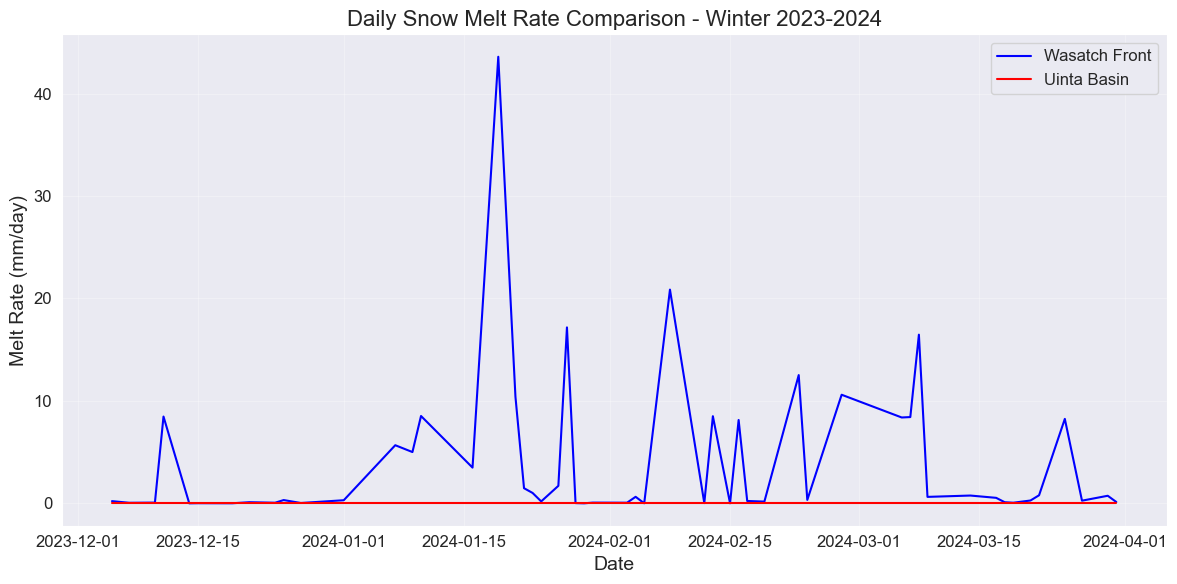

Melt rate comparison chart saved as melt_rate_comparison_winter_2023-2024.png


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

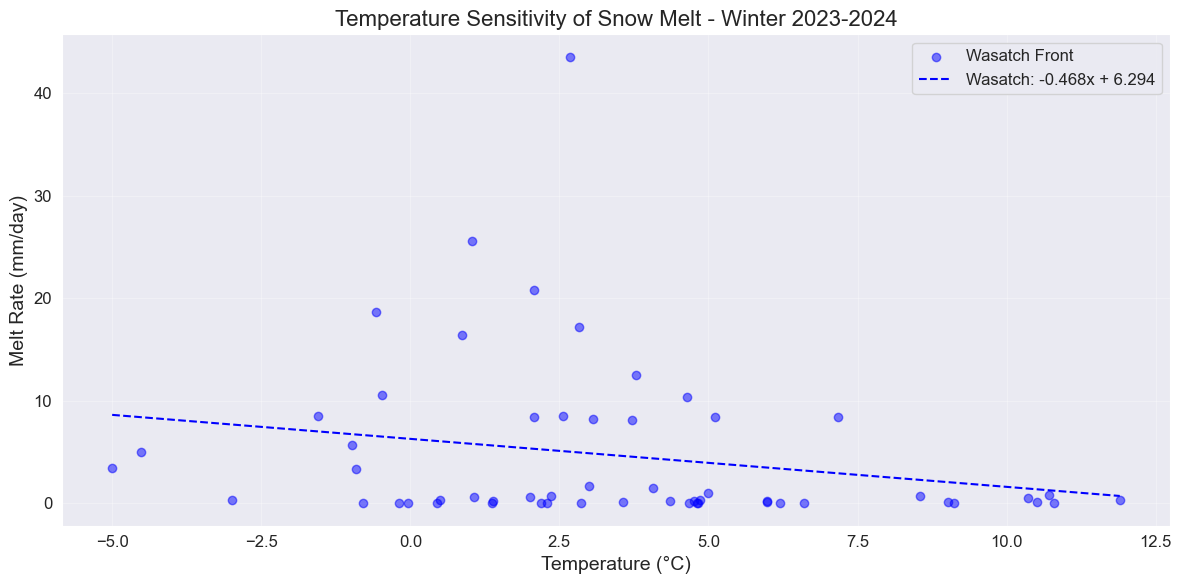

Temperature sensitivity chart saved as snow_shadow_temp_sensitivity_winter_2023-2024.png

--- GENERATING SNOW SHADOW REPORT ---
Snow shadow report saved to snow_shadow_report_winter_2023-2024.txt


<Figure size 1200x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

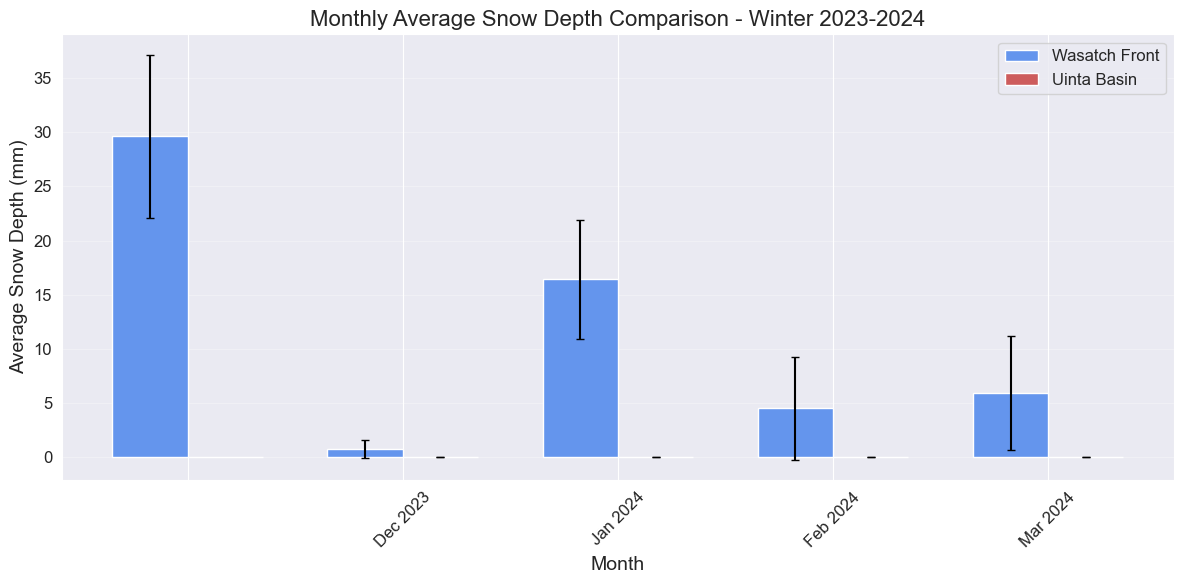

Monthly comparison chart saved as monthly_snow_depth_winter_2023-2024.png


<Figure size 1200x800 with 0 Axes>

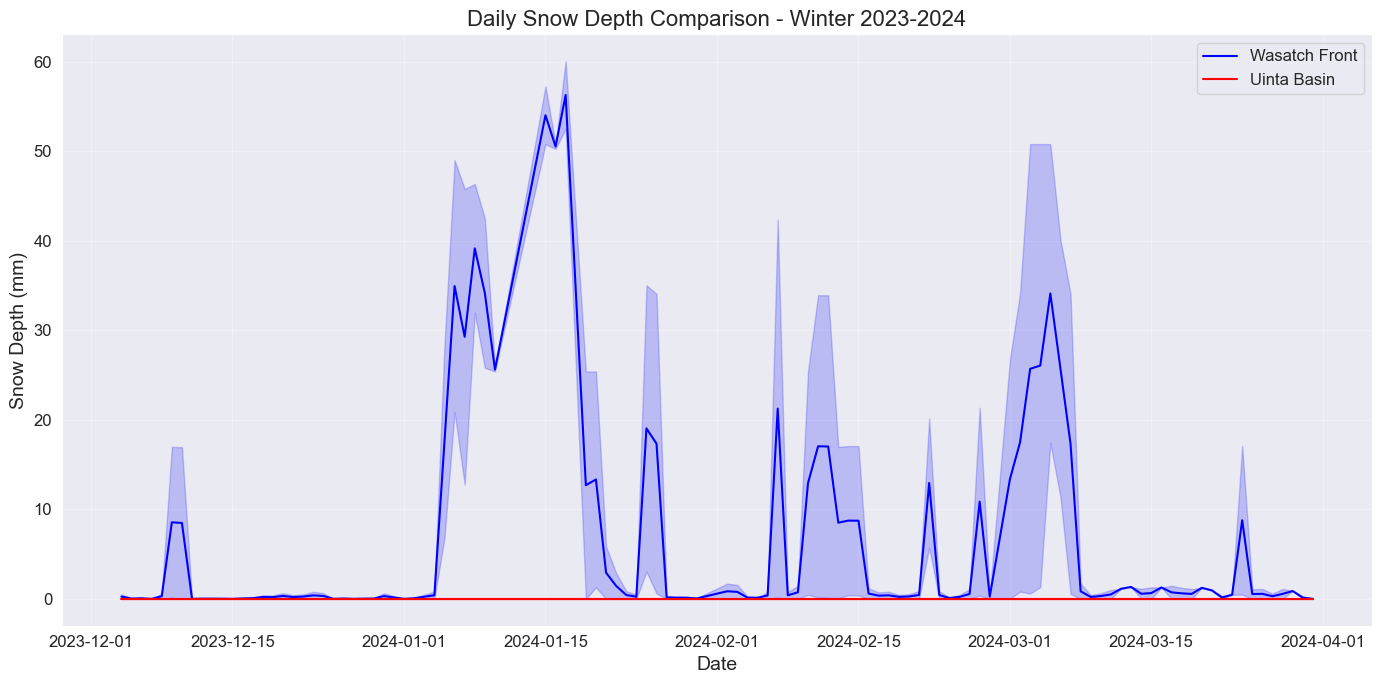

Daily snow depth chart saved as daily_snow_depth_winter_2023-2024.png
Daily snow depth and melt data saved to CSV files


ANALYZING Winter 2022-2023

===== ANALYZING SNOW DEPTH AND MELT FOR Winter 2022-2023 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2022-2023 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2022 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.23 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Jan 2023 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.22 seconds).
    Retrieved 28 records
  Retrieving snow_depth data for Feb 2023 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.24 seconds).
    Retrieved 27 records
  Retrieving snow_depth data for Mar 2023 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy de

<Figure size 1200x800 with 0 Axes>

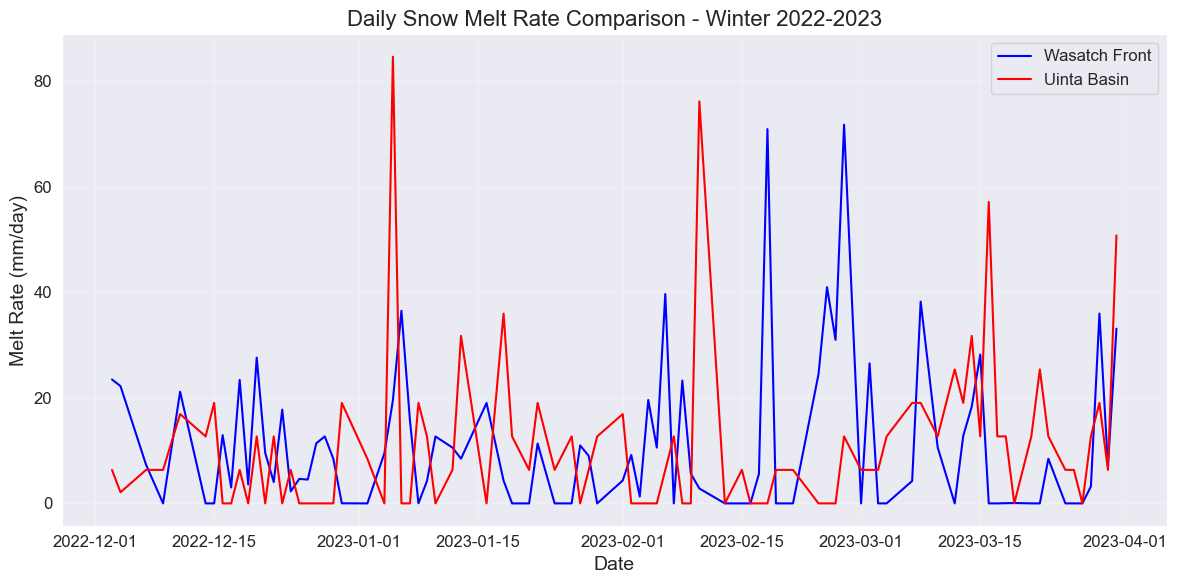

Melt rate comparison chart saved as melt_rate_comparison_winter_2022-2023.png


<Figure size 1200x800 with 0 Axes>

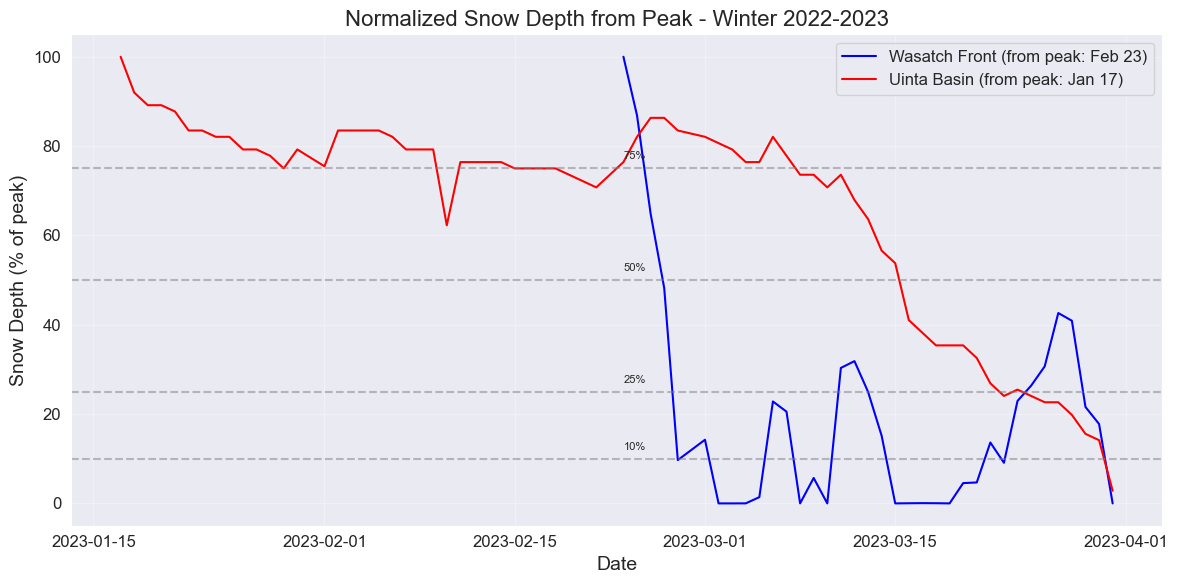

Normalized melt chart saved as normalized_melt_winter_2022-2023.png


<Figure size 1200x800 with 0 Axes>

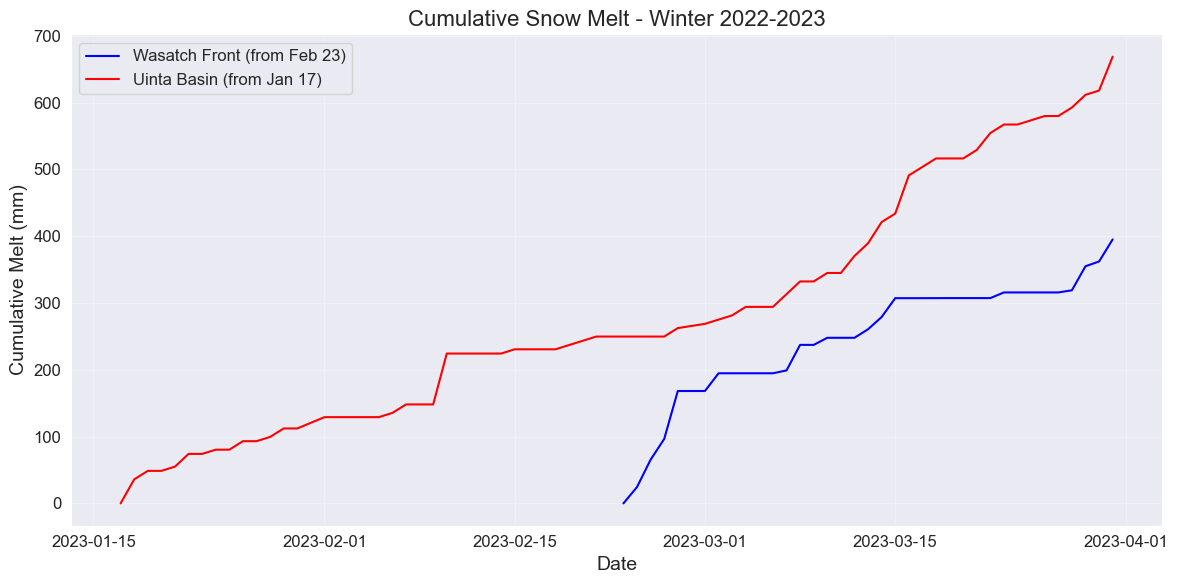

Cumulative melt chart saved as cumulative_melt_winter_2022-2023.png


<Figure size 1200x800 with 0 Axes>

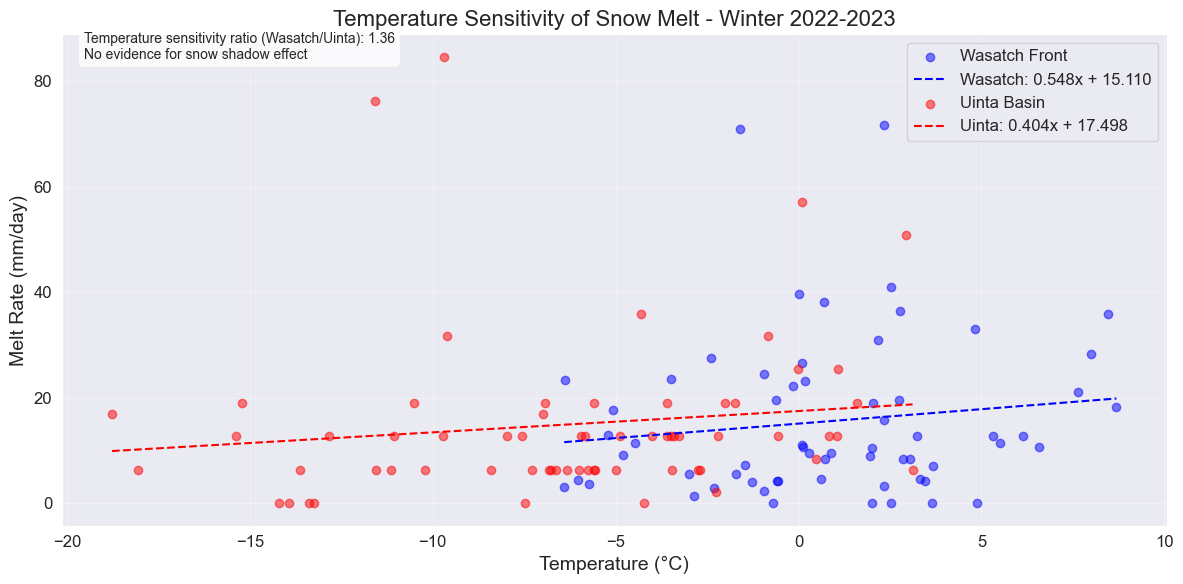

Temperature sensitivity chart saved as snow_shadow_temp_sensitivity_winter_2022-2023.png


<Figure size 1200x800 with 0 Axes>

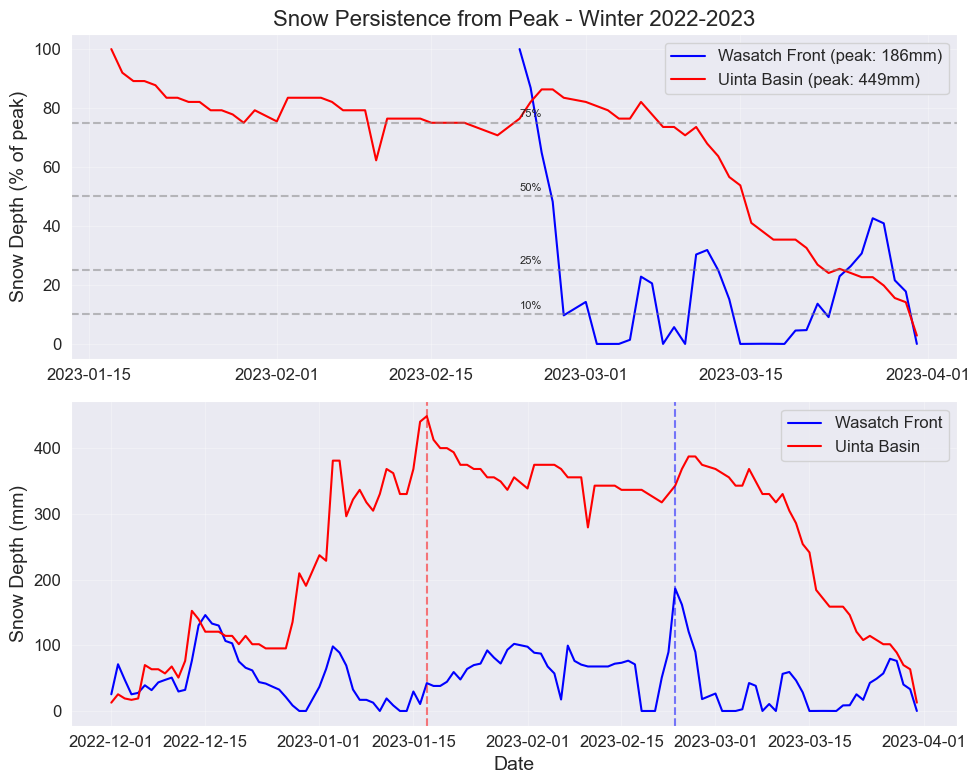

Snow persistence chart saved as snow_persistence_comparison_winter_2022-2023.png

--- GENERATING SNOW SHADOW REPORT ---
Snow shadow report saved to snow_shadow_report_winter_2022-2023.txt


<Figure size 1200x800 with 0 Axes>

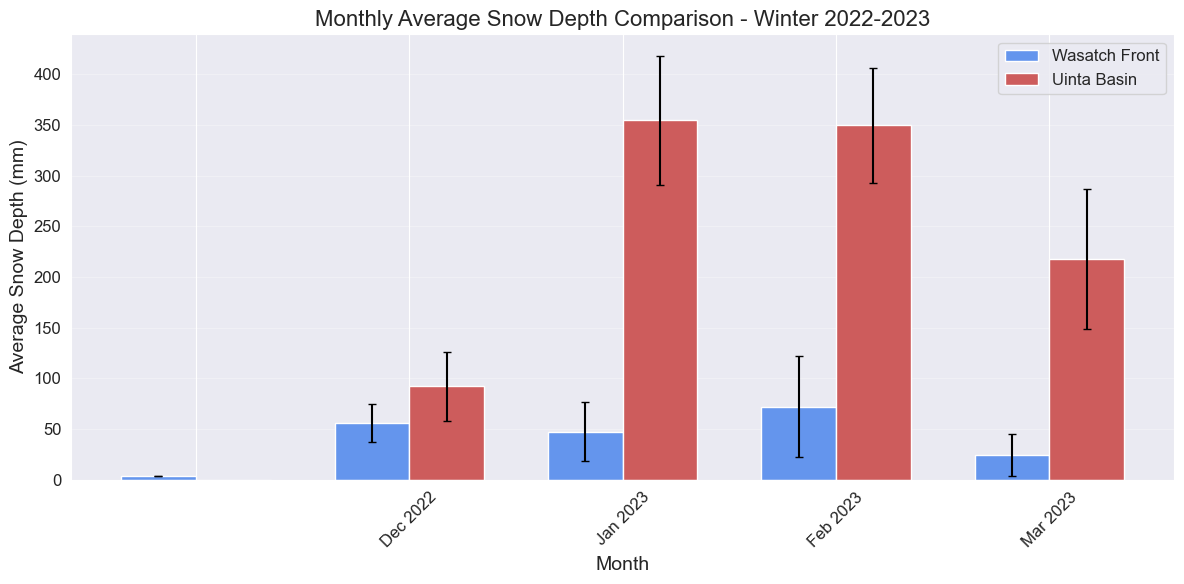

Monthly comparison chart saved as monthly_snow_depth_winter_2022-2023.png


<Figure size 1200x800 with 0 Axes>

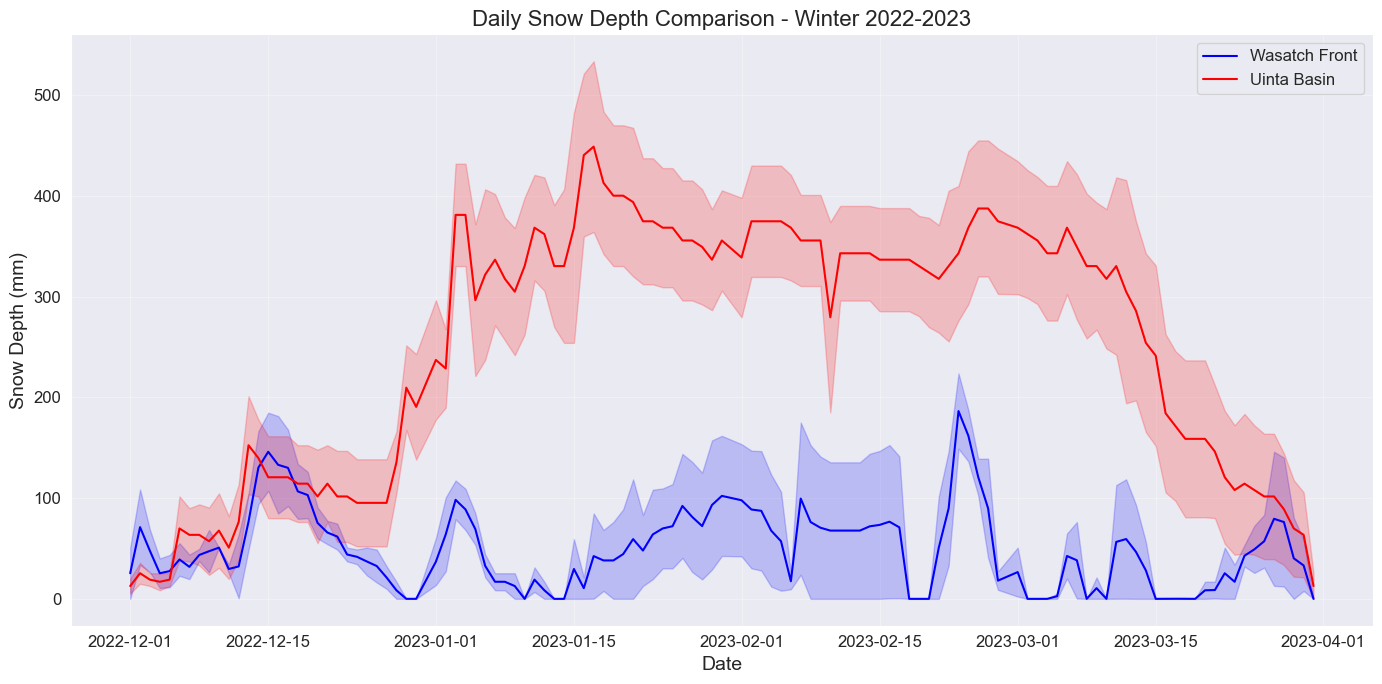

Daily snow depth chart saved as daily_snow_depth_winter_2022-2023.png
Daily snow depth and melt data saved to CSV files


ANALYZING Winter 2021-2022

===== ANALYZING SNOW DEPTH AND MELT FOR Winter 2021-2022 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2021-2022 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2021 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.78 seconds).
    Retrieved 27 records
  Retrieving snow_depth data for Jan 2022 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.20 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Feb 2022 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.20 seconds).
    Retrieved 27 records
  Retrieving snow_depth data for Mar 2022 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy de

<Figure size 1200x800 with 0 Axes>

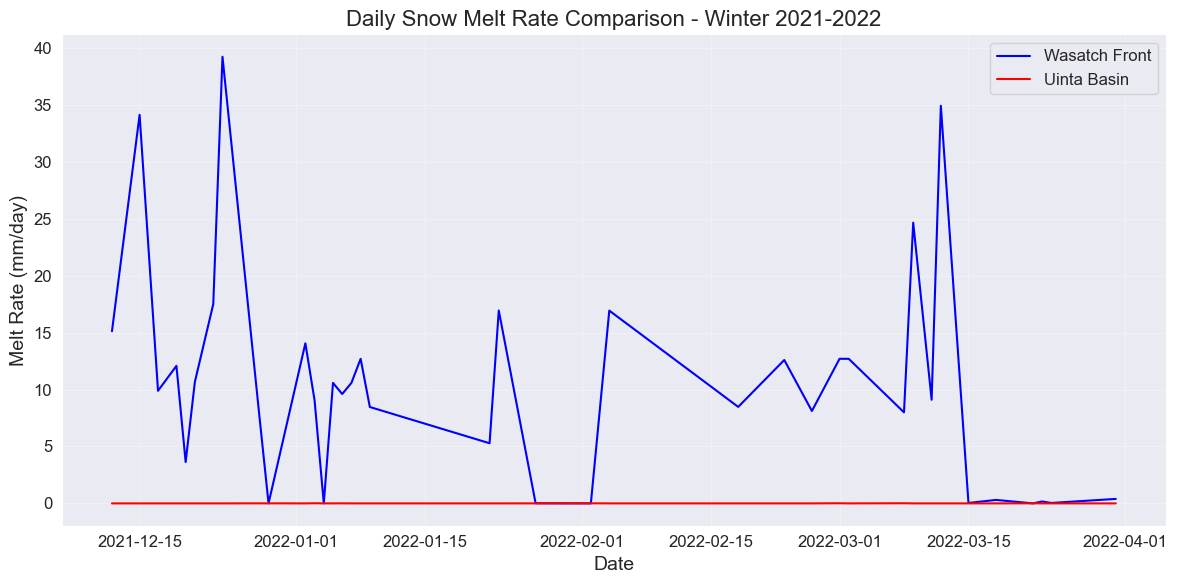

Melt rate comparison chart saved as melt_rate_comparison_winter_2021-2022.png


<Figure size 1200x800 with 0 Axes>

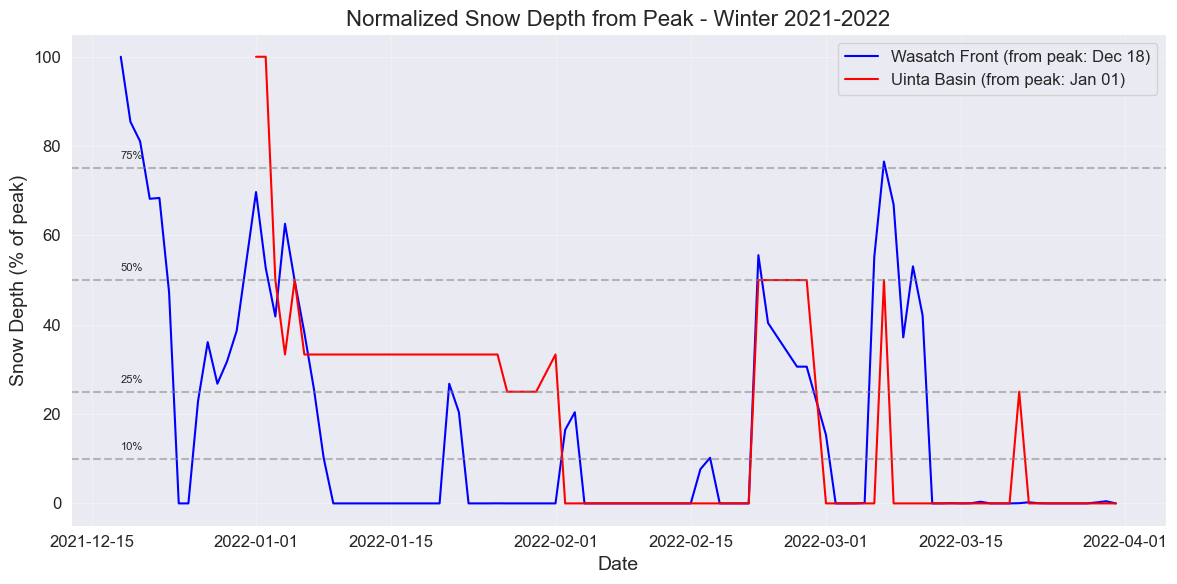

Normalized melt chart saved as normalized_melt_winter_2021-2022.png


<Figure size 1200x800 with 0 Axes>

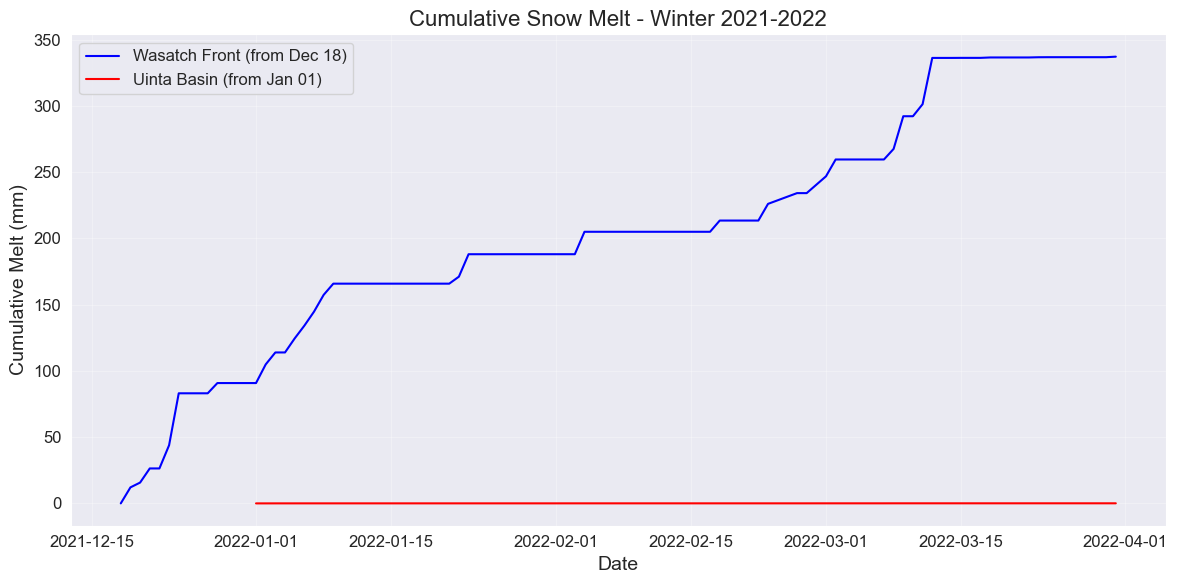

Cumulative melt chart saved as cumulative_melt_winter_2021-2022.png


<Figure size 1200x800 with 0 Axes>

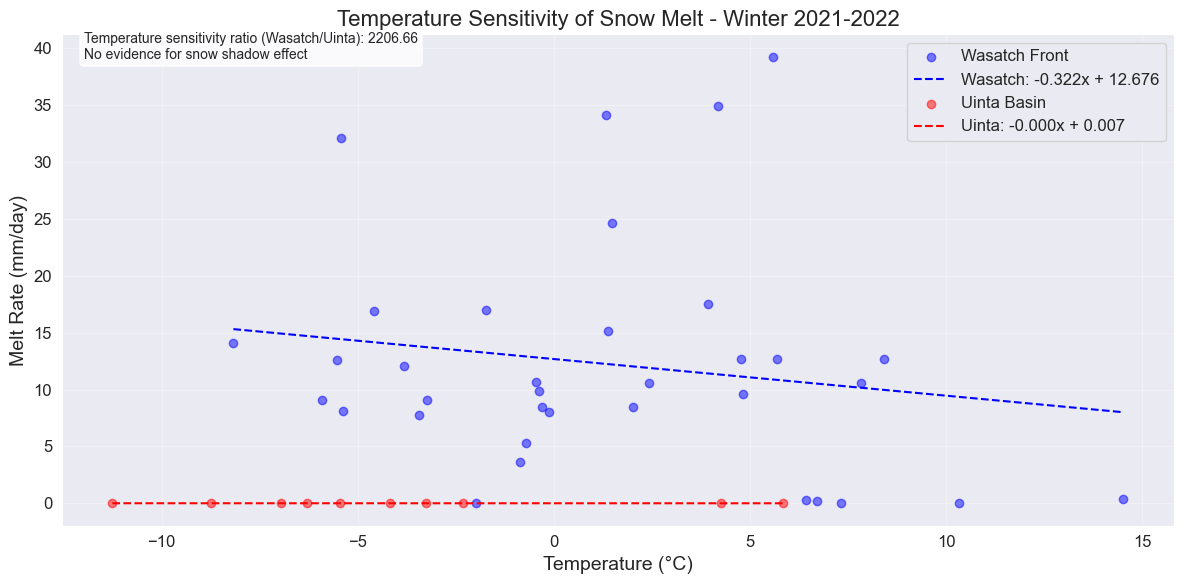

Temperature sensitivity chart saved as snow_shadow_temp_sensitivity_winter_2021-2022.png


<Figure size 1200x800 with 0 Axes>

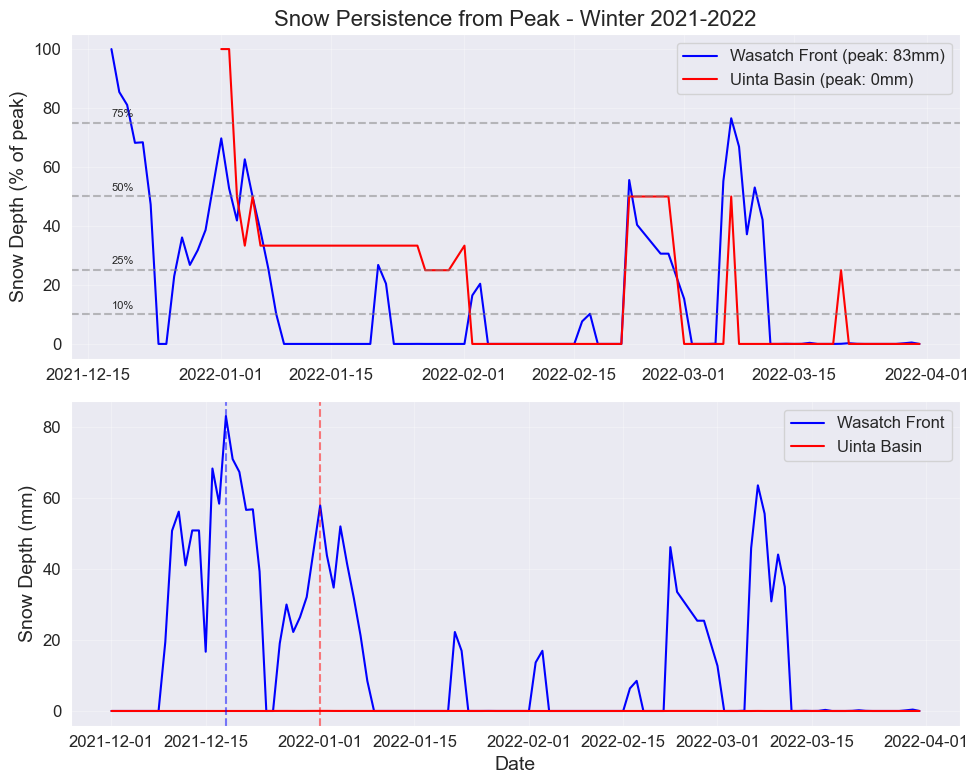

Snow persistence chart saved as snow_persistence_comparison_winter_2021-2022.png

--- GENERATING SNOW SHADOW REPORT ---
Snow shadow report saved to snow_shadow_report_winter_2021-2022.txt


<Figure size 1200x800 with 0 Axes>

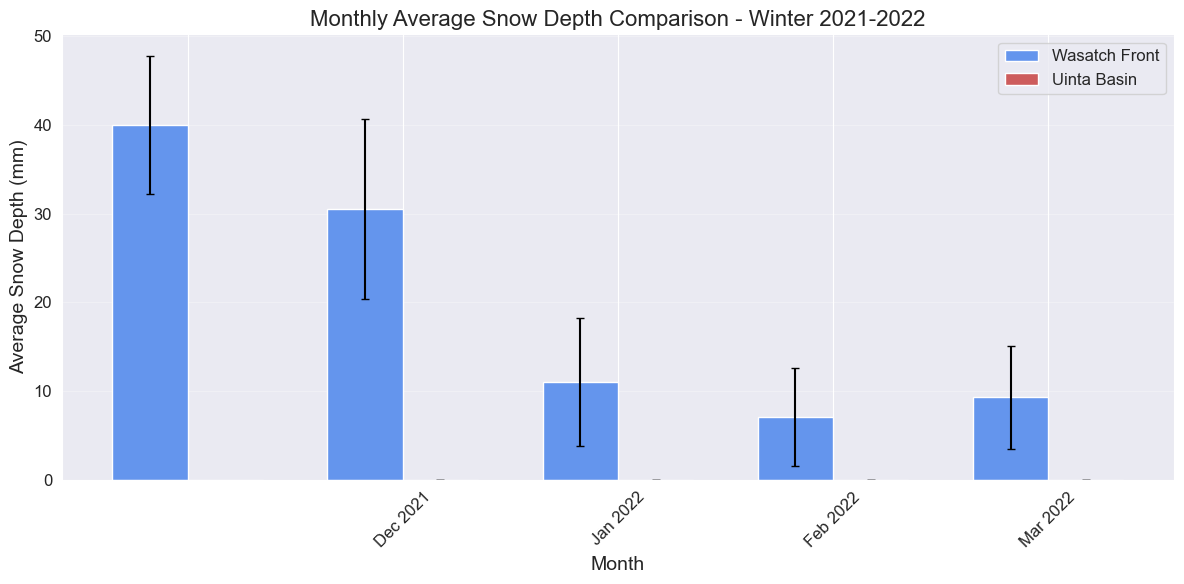

Monthly comparison chart saved as monthly_snow_depth_winter_2021-2022.png


<Figure size 1200x800 with 0 Axes>

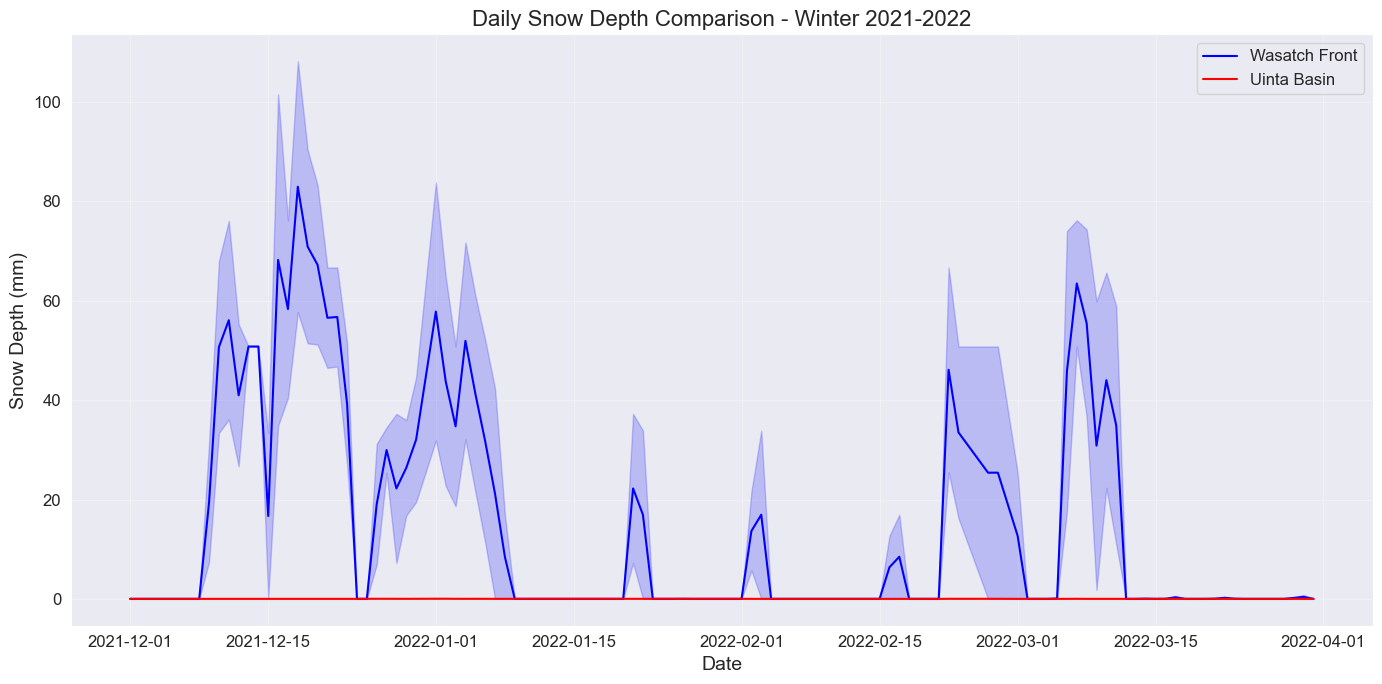

Daily snow depth chart saved as daily_snow_depth_winter_2021-2022.png
Daily snow depth and melt data saved to CSV files


ANALYZING Winter 2020-2021

===== ANALYZING SNOW DEPTH AND MELT FOR Winter 2020-2021 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2020-2021 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2020 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.20 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Jan 2021 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.22 seconds).
    Retrieved 28 records
  Retrieving snow_depth data for Feb 2021 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.19 seconds).
    Retrieved 27 records
  Retrieving snow_depth data for Mar 2021 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy de

<Figure size 1200x800 with 0 Axes>

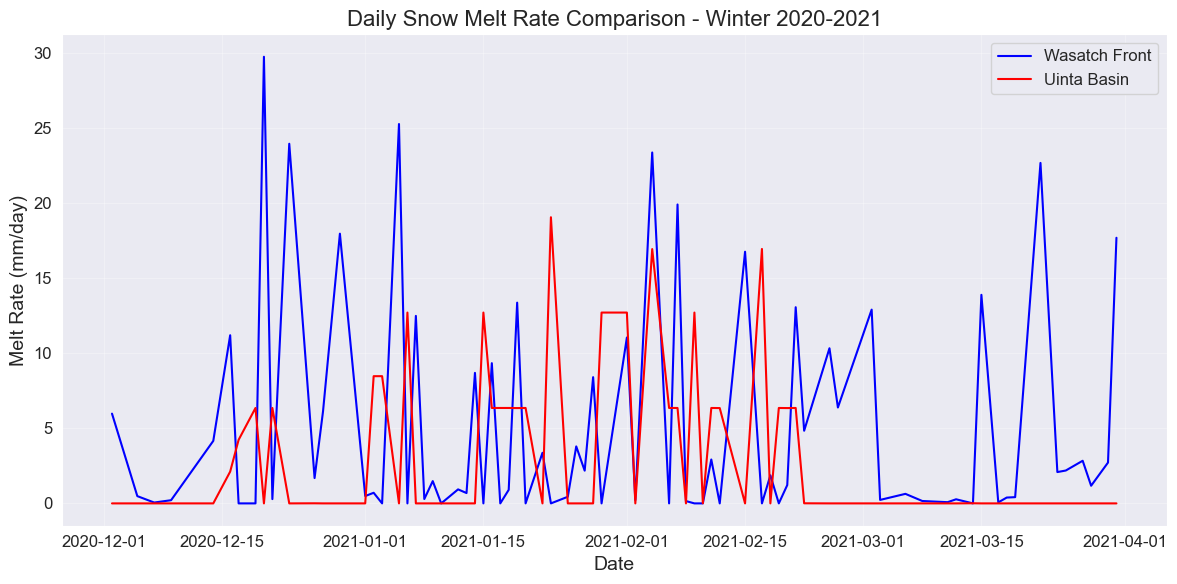

Melt rate comparison chart saved as melt_rate_comparison_winter_2020-2021.png


<Figure size 1200x800 with 0 Axes>

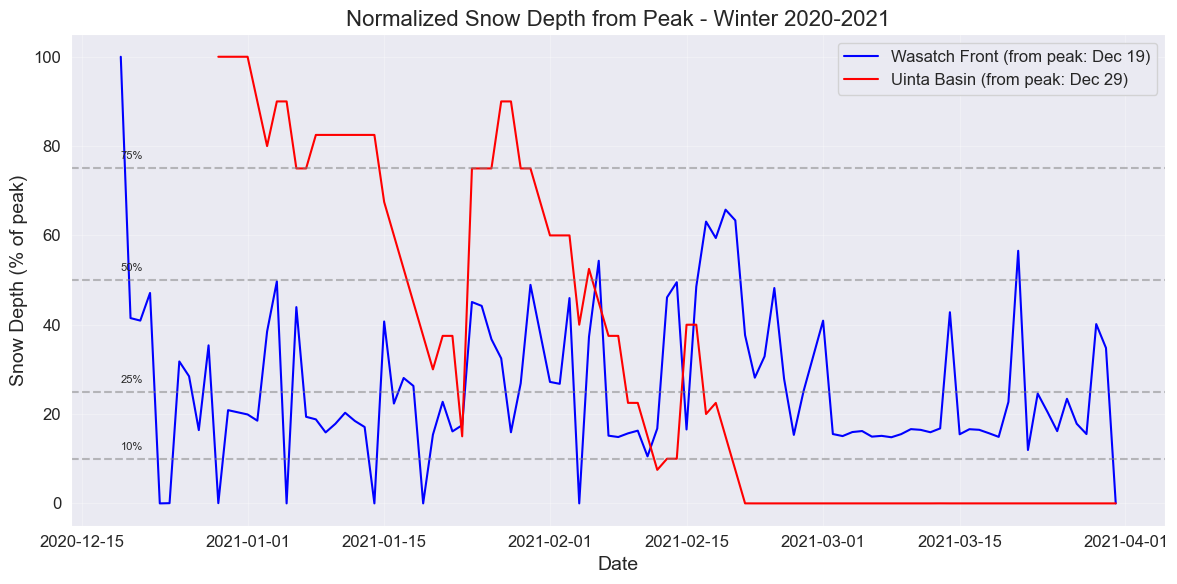

Normalized melt chart saved as normalized_melt_winter_2020-2021.png


<Figure size 1200x800 with 0 Axes>

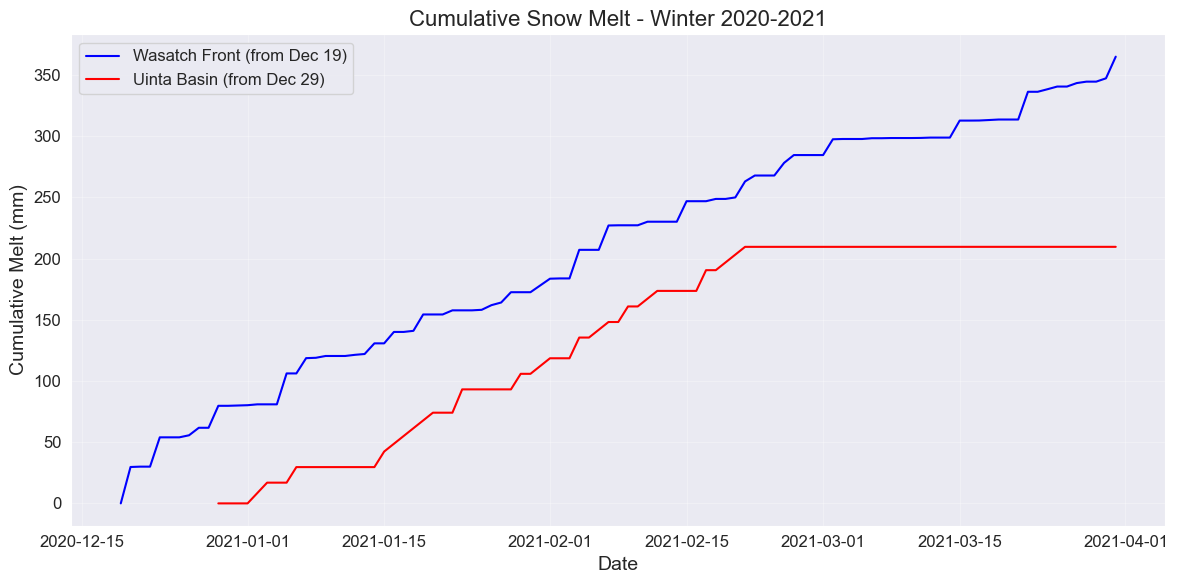

Cumulative melt chart saved as cumulative_melt_winter_2020-2021.png


<Figure size 1200x800 with 0 Axes>

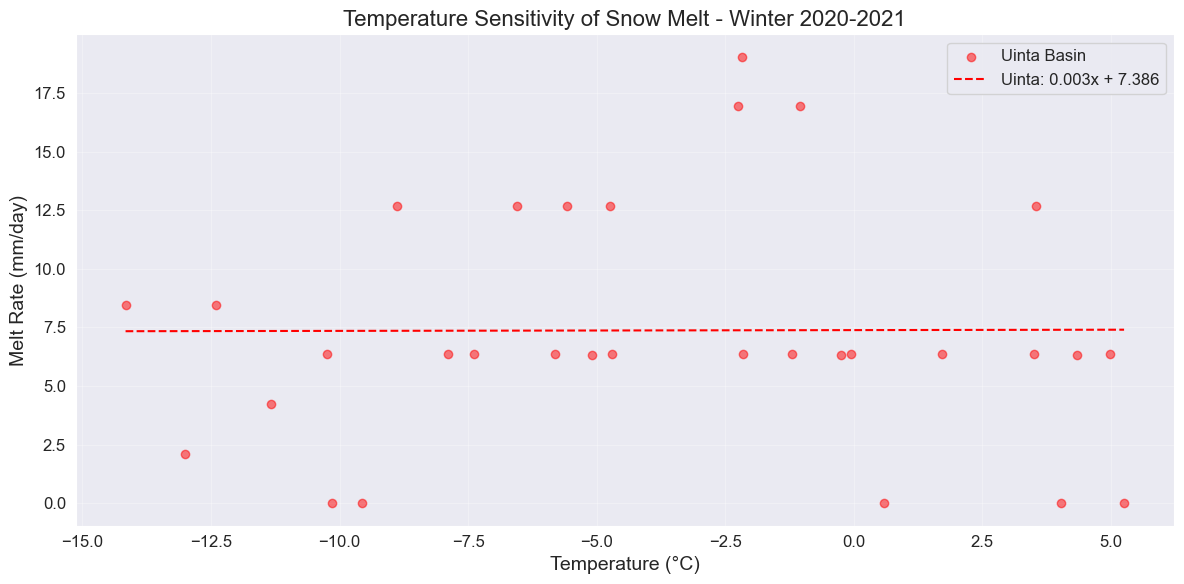

Temperature sensitivity chart saved as snow_shadow_temp_sensitivity_winter_2020-2021.png


<Figure size 1200x800 with 0 Axes>

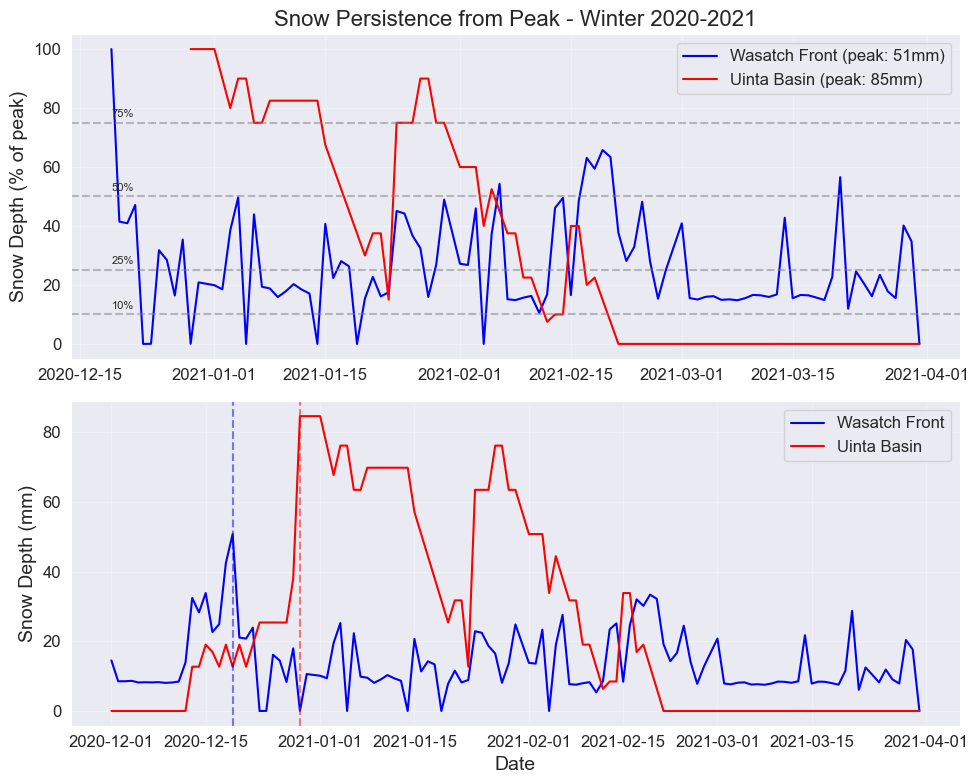

Snow persistence chart saved as snow_persistence_comparison_winter_2020-2021.png

--- GENERATING SNOW SHADOW REPORT ---
Snow shadow report saved to snow_shadow_report_winter_2020-2021.txt


<Figure size 1200x800 with 0 Axes>

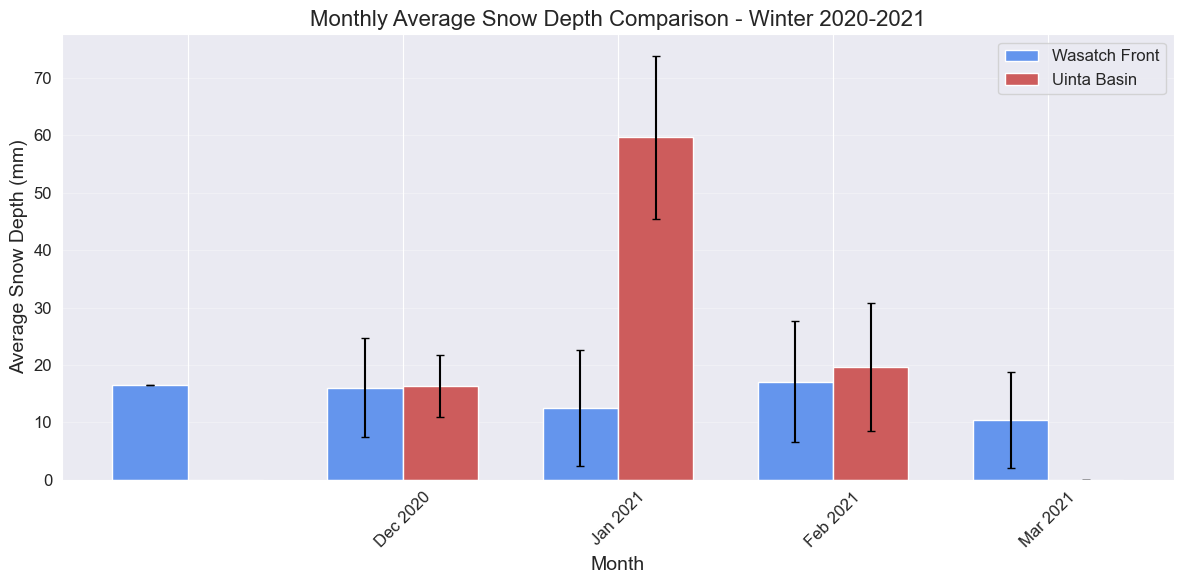

Monthly comparison chart saved as monthly_snow_depth_winter_2020-2021.png


<Figure size 1200x800 with 0 Axes>

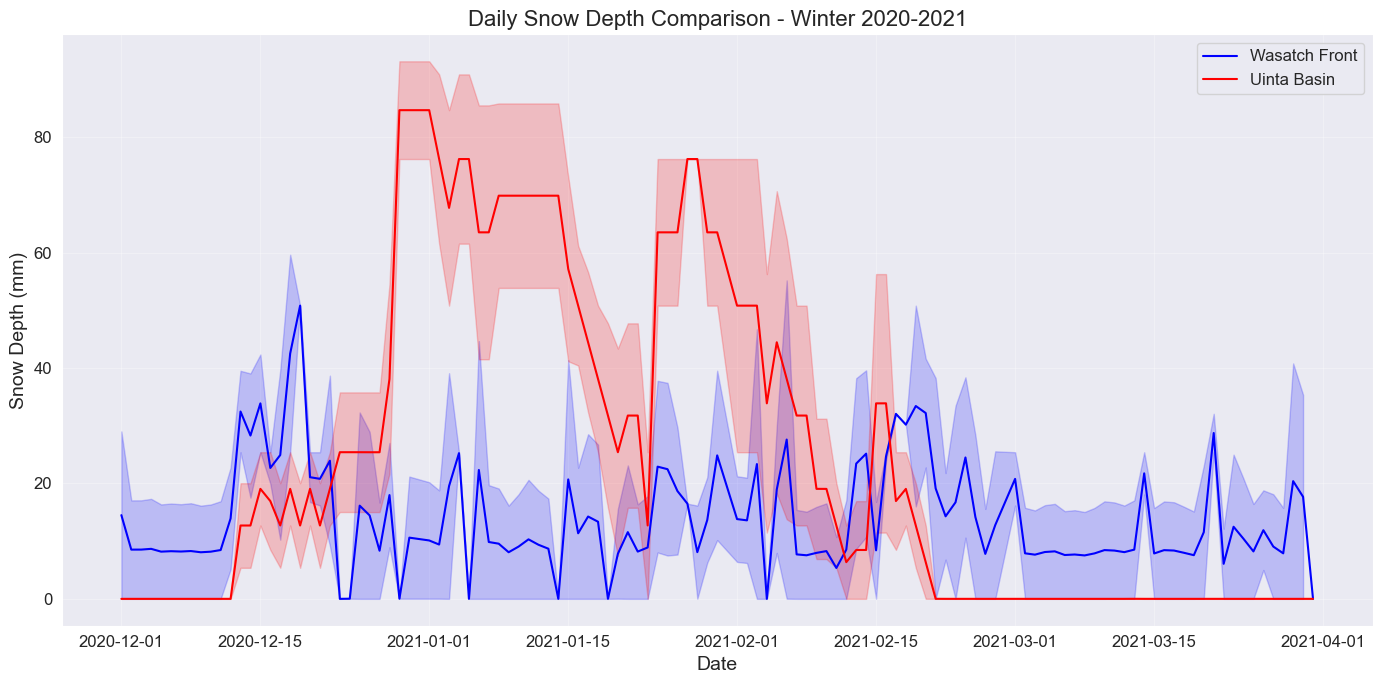

Daily snow depth chart saved as daily_snow_depth_winter_2020-2021.png
Daily snow depth and melt data saved to CSV files


ANALYZING Winter 2019-2020

===== ANALYZING SNOW DEPTH AND MELT FOR Winter 2019-2020 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2019-2020 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2019 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.19 seconds).
    Retrieved 29 records
  Retrieving snow_depth data for Jan 2020 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.18 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Feb 2020 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.21 seconds).
    Retrieved 28 records
  Retrieving snow_depth data for Mar 2020 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy de

<Figure size 1200x800 with 0 Axes>

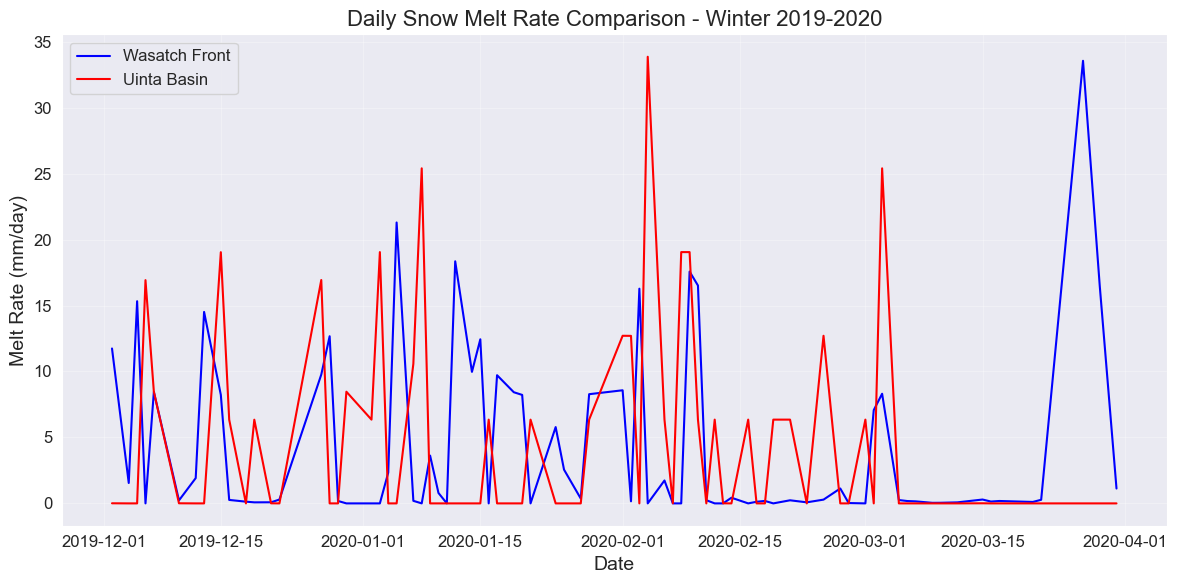

Melt rate comparison chart saved as melt_rate_comparison_winter_2019-2020.png


<Figure size 1200x800 with 0 Axes>

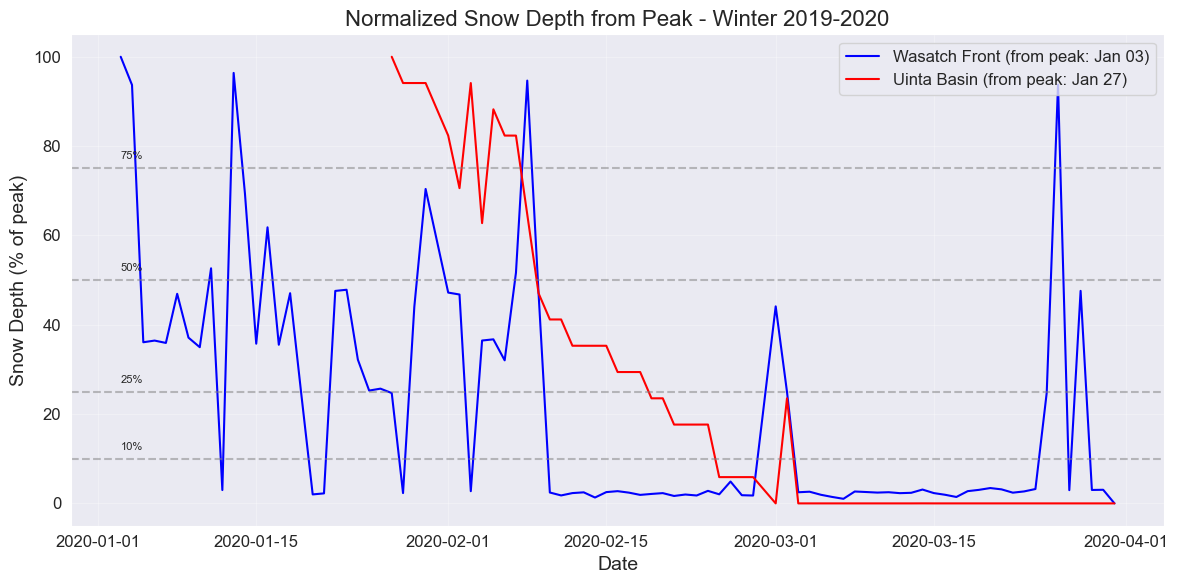

Normalized melt chart saved as normalized_melt_winter_2019-2020.png


<Figure size 1200x800 with 0 Axes>

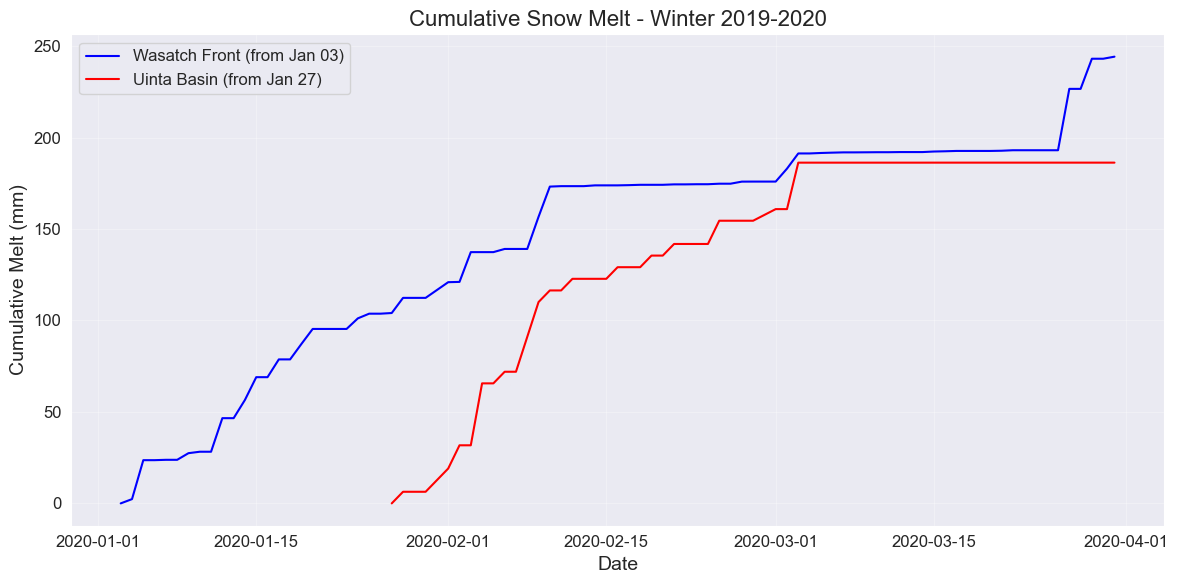

Cumulative melt chart saved as cumulative_melt_winter_2019-2020.png


<Figure size 1200x800 with 0 Axes>

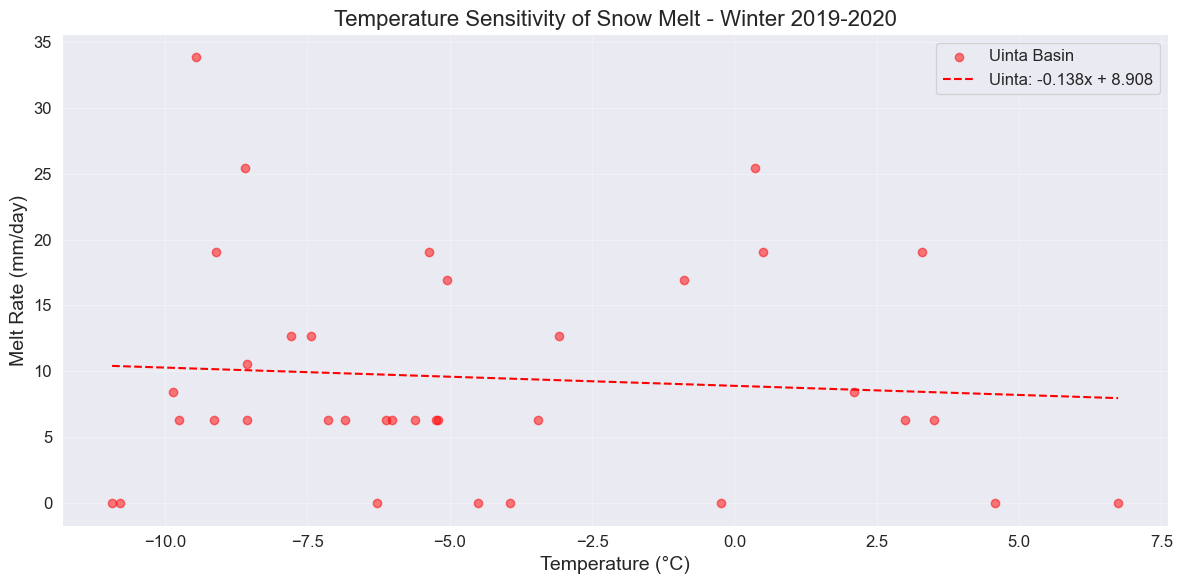

Temperature sensitivity chart saved as snow_shadow_temp_sensitivity_winter_2019-2020.png


<Figure size 1200x800 with 0 Axes>

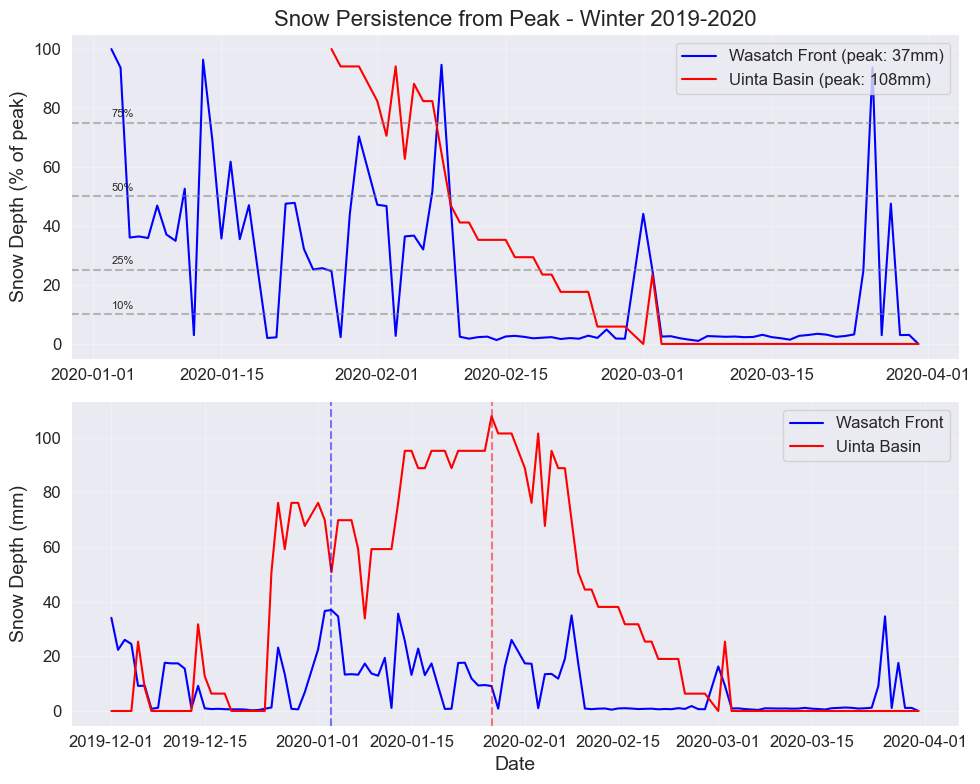

Snow persistence chart saved as snow_persistence_comparison_winter_2019-2020.png

--- GENERATING SNOW SHADOW REPORT ---
Snow shadow report saved to snow_shadow_report_winter_2019-2020.txt


<Figure size 1200x800 with 0 Axes>

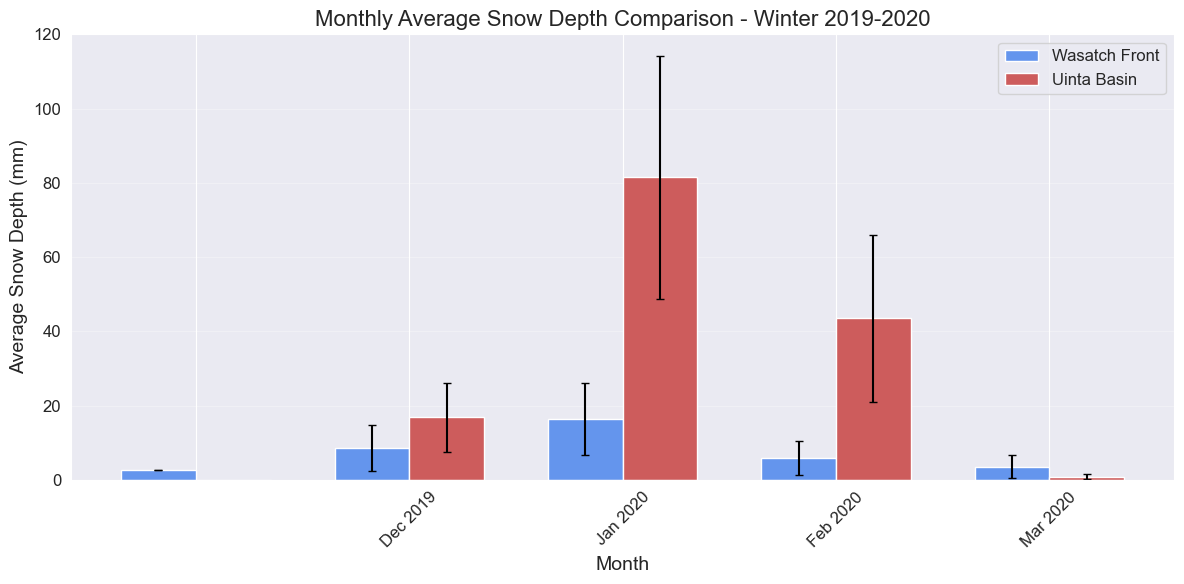

Monthly comparison chart saved as monthly_snow_depth_winter_2019-2020.png


<Figure size 1200x800 with 0 Axes>

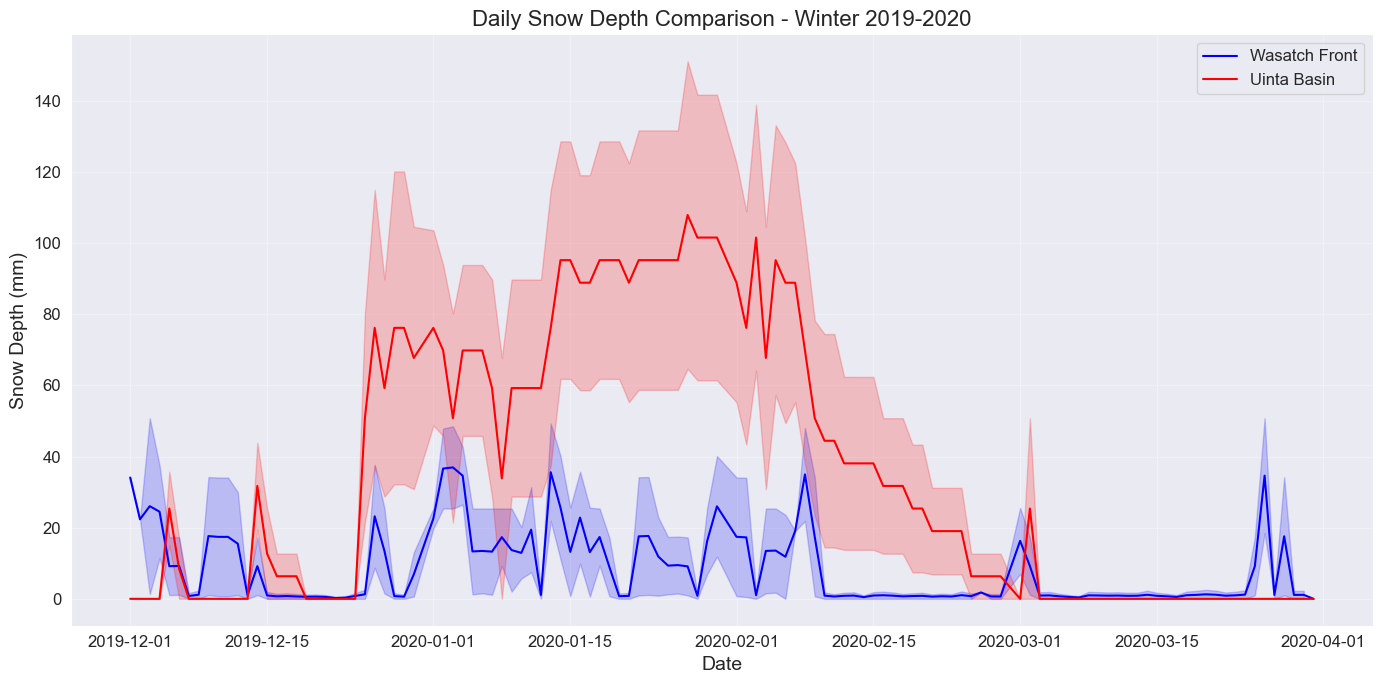

Daily snow depth chart saved as daily_snow_depth_winter_2019-2020.png
Daily snow depth and melt data saved to CSV files


ANALYZING Winter 2018-2019

===== ANALYZING SNOW DEPTH AND MELT FOR Winter 2018-2019 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2018-2019 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2018 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.25 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Jan 2019 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.22 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Feb 2019 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.21 seconds).
    Retrieved 27 records
  Retrieving snow_depth data for Mar 2019 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy de

<Figure size 1200x800 with 0 Axes>

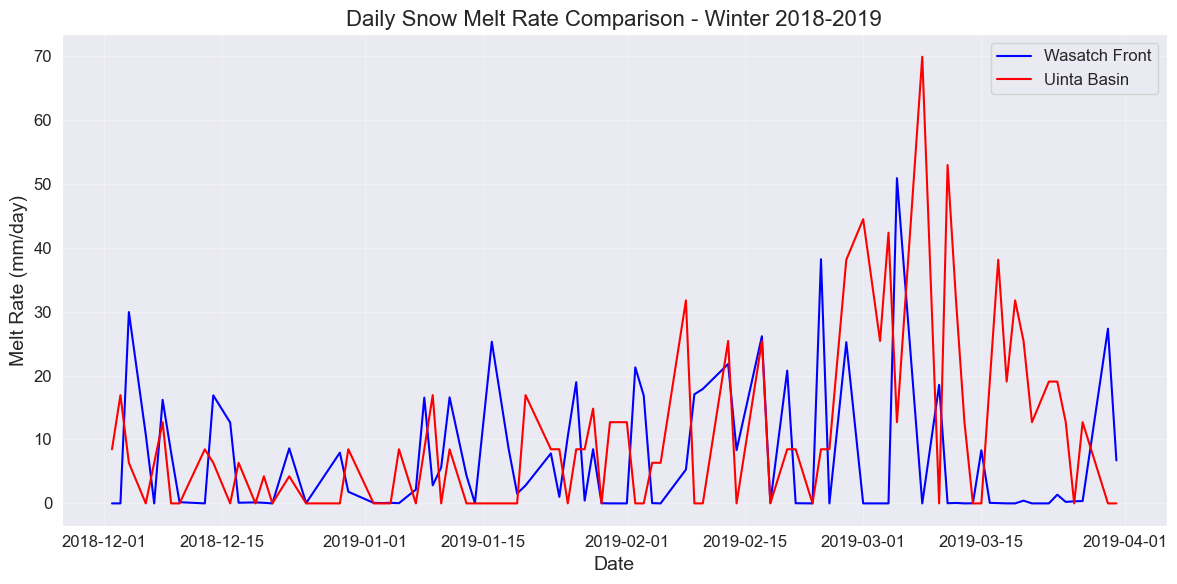

Melt rate comparison chart saved as melt_rate_comparison_winter_2018-2019.png


<Figure size 1200x800 with 0 Axes>

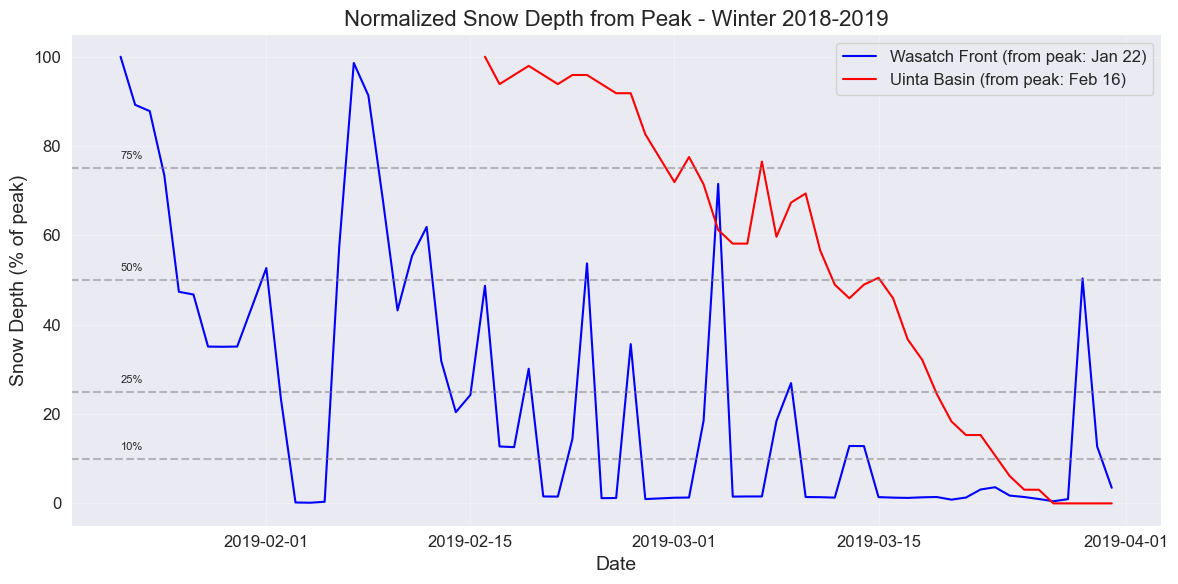

Normalized melt chart saved as normalized_melt_winter_2018-2019.png


<Figure size 1200x800 with 0 Axes>

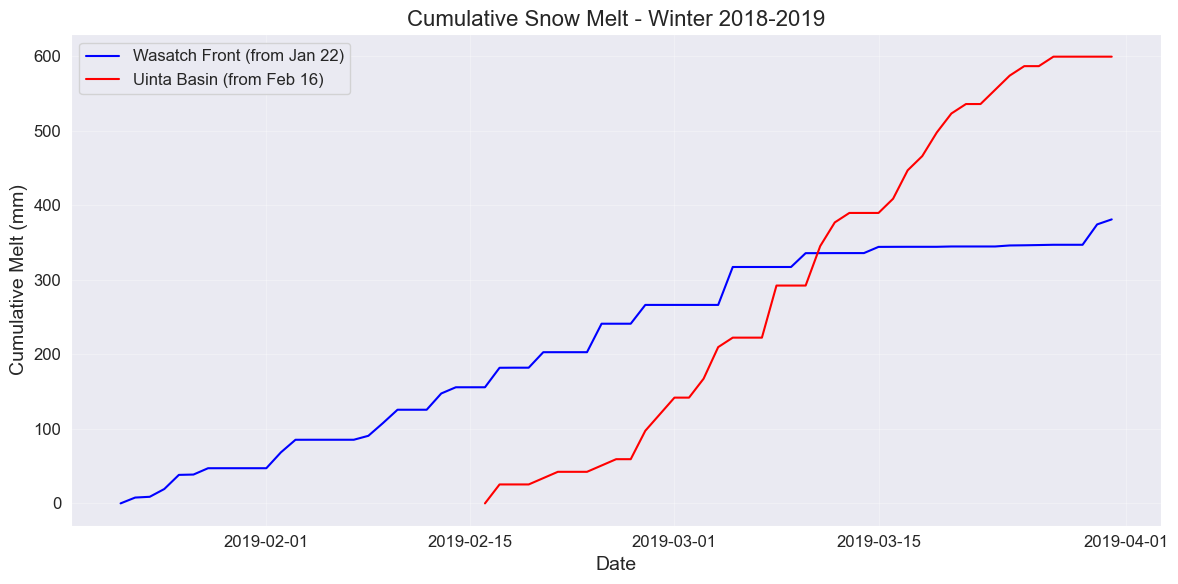

Cumulative melt chart saved as cumulative_melt_winter_2018-2019.png


<Figure size 1200x800 with 0 Axes>

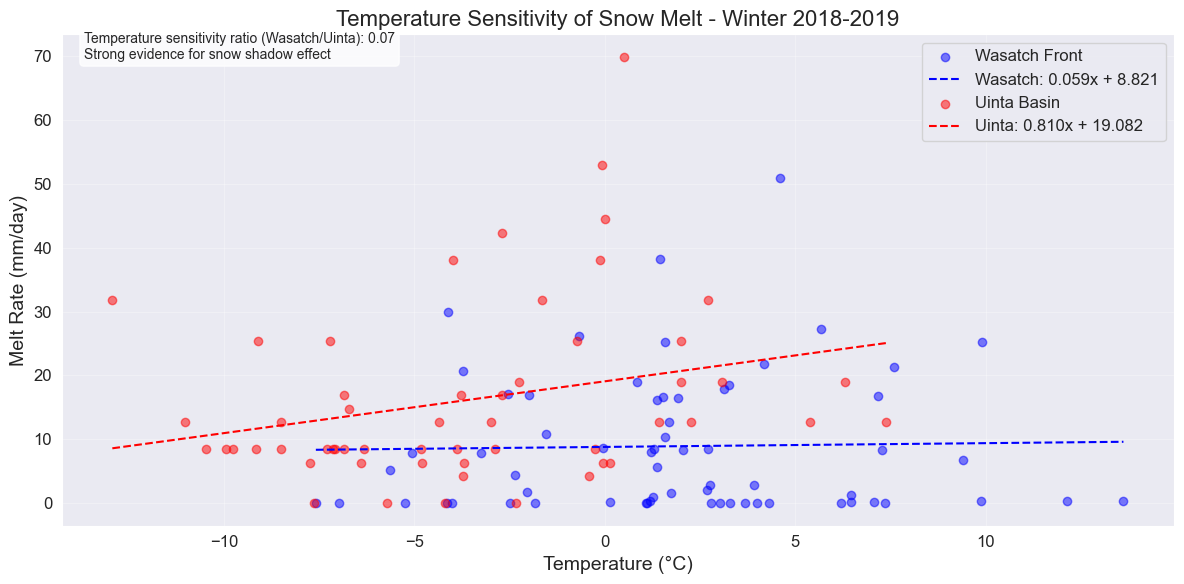

Temperature sensitivity chart saved as snow_shadow_temp_sensitivity_winter_2018-2019.png


<Figure size 1200x800 with 0 Axes>

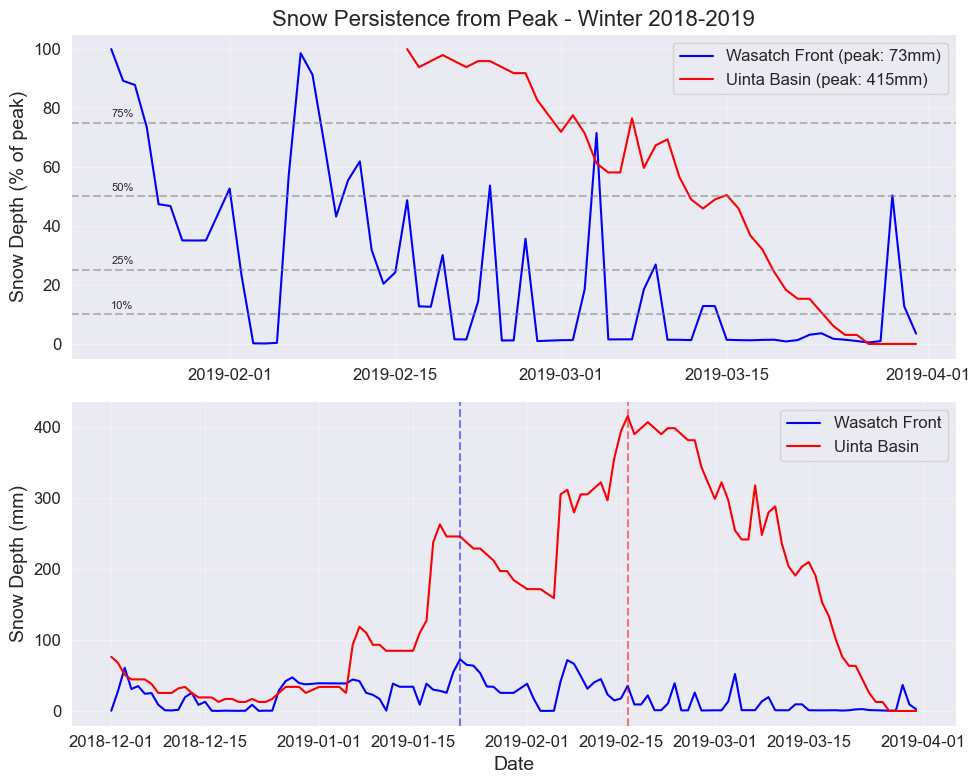

Snow persistence chart saved as snow_persistence_comparison_winter_2018-2019.png

--- GENERATING SNOW SHADOW REPORT ---
Snow shadow report saved to snow_shadow_report_winter_2018-2019.txt


<Figure size 1200x800 with 0 Axes>

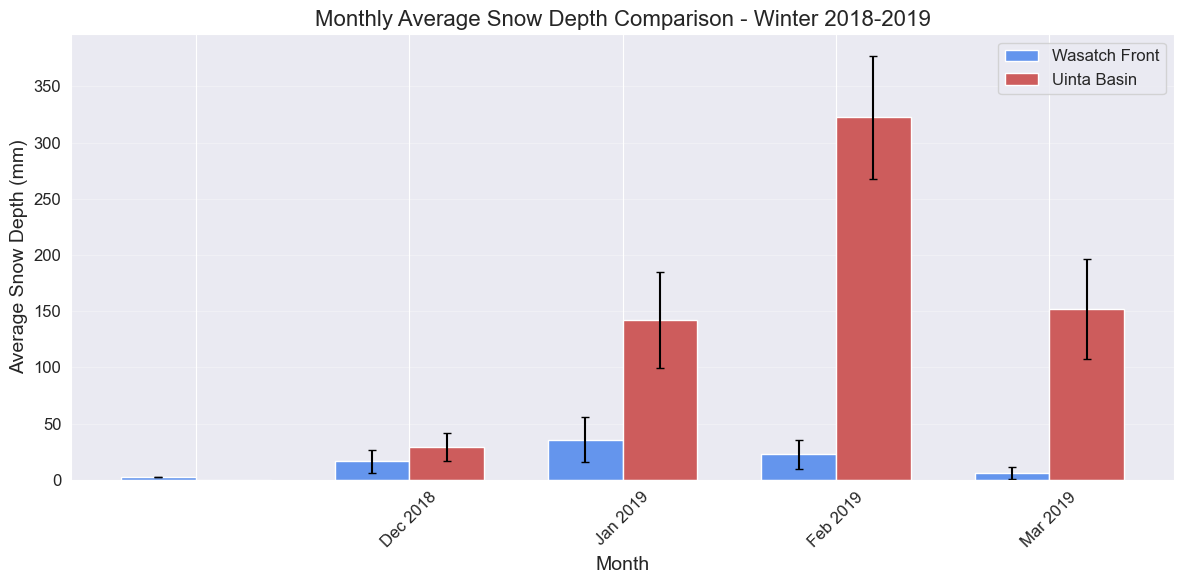

Monthly comparison chart saved as monthly_snow_depth_winter_2018-2019.png


<Figure size 1200x800 with 0 Axes>

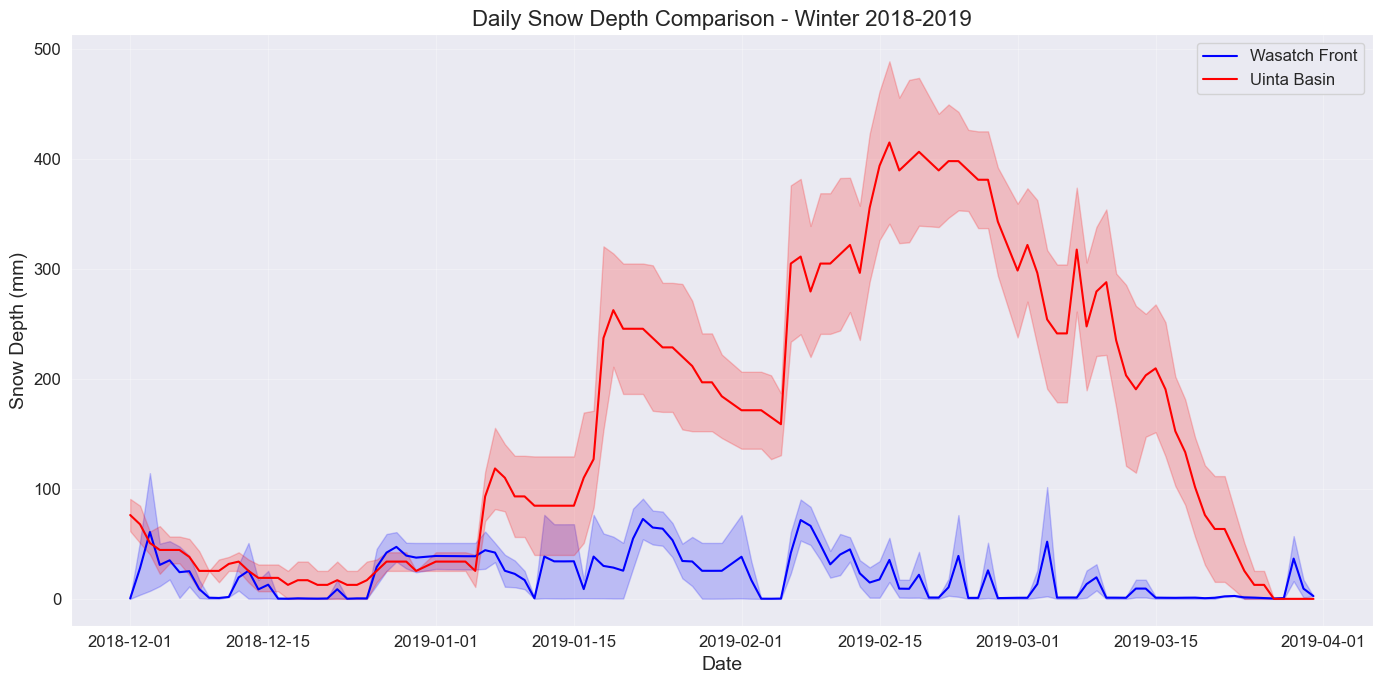

Daily snow depth chart saved as daily_snow_depth_winter_2018-2019.png
Daily snow depth and melt data saved to CSV files


ANALYZING Winter 2017-2018

===== ANALYZING SNOW DEPTH AND MELT FOR Winter 2017-2018 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2017-2018 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2017 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.18 seconds).
    Retrieved 28 records
  Retrieving snow_depth data for Jan 2018 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.20 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Feb 2018 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.17 seconds).
    Retrieved 25 records
  Retrieving snow_depth data for Mar 2018 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy de

<Figure size 1200x800 with 0 Axes>

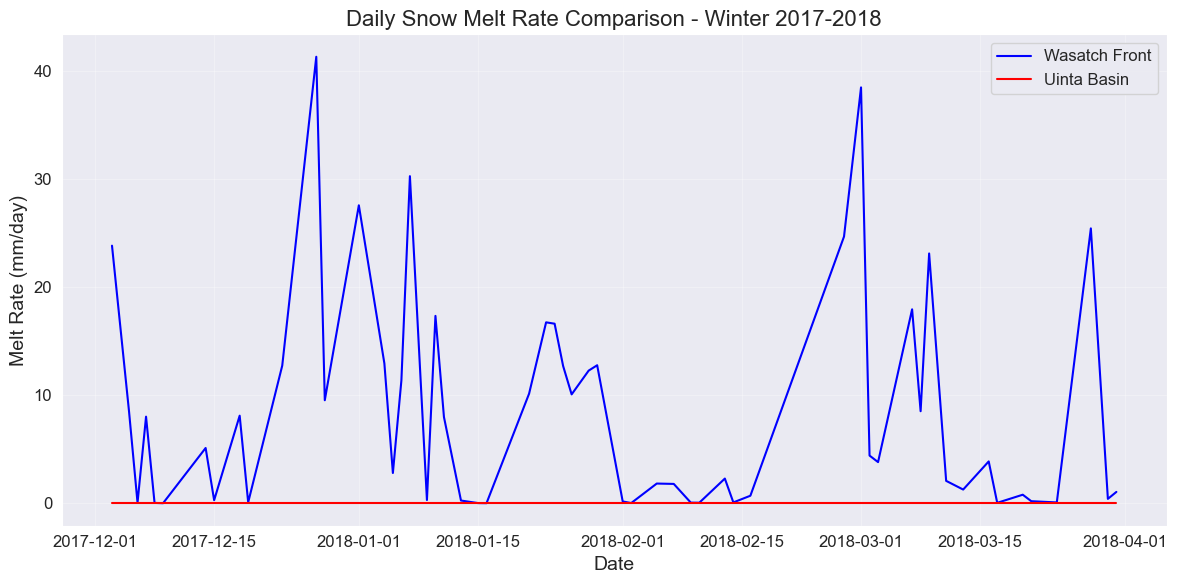

Melt rate comparison chart saved as melt_rate_comparison_winter_2017-2018.png


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

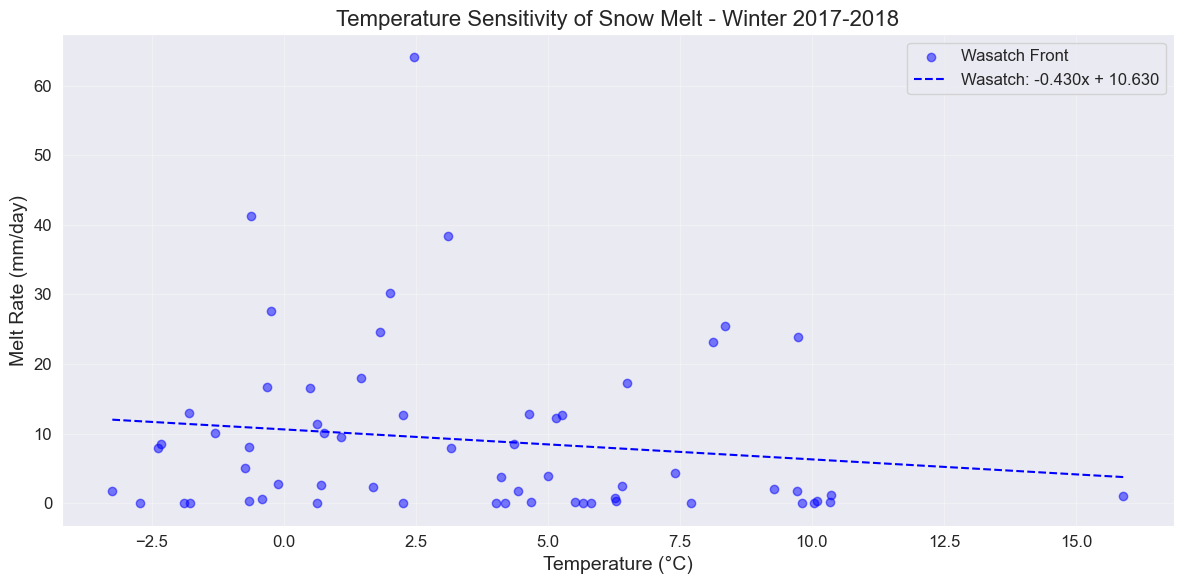

Temperature sensitivity chart saved as snow_shadow_temp_sensitivity_winter_2017-2018.png

--- GENERATING SNOW SHADOW REPORT ---
Snow shadow report saved to snow_shadow_report_winter_2017-2018.txt


<Figure size 1200x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

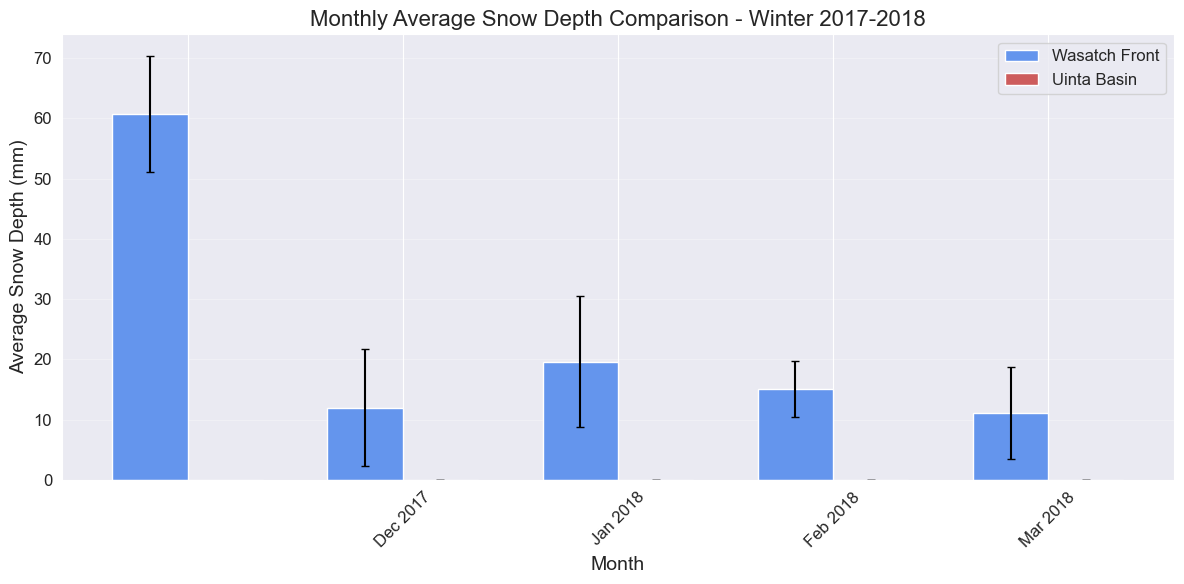

Monthly comparison chart saved as monthly_snow_depth_winter_2017-2018.png


<Figure size 1200x800 with 0 Axes>

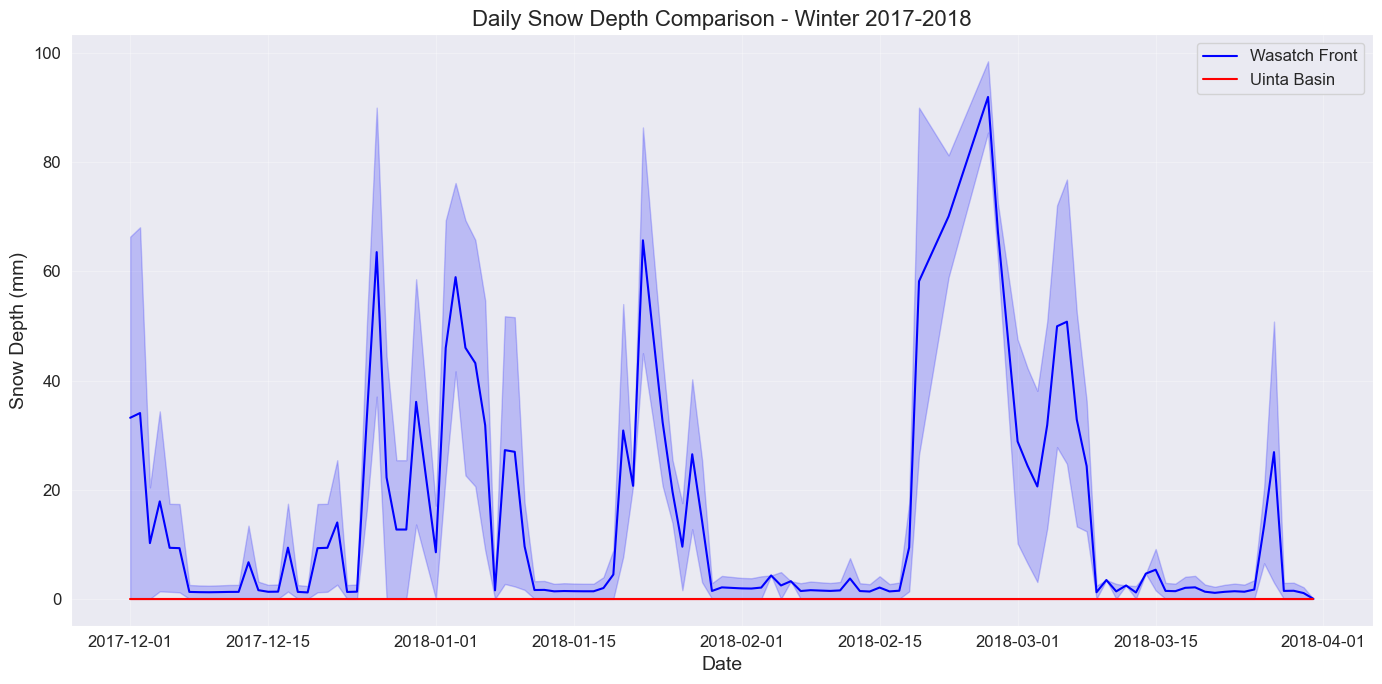

Daily snow depth chart saved as daily_snow_depth_winter_2017-2018.png
Daily snow depth and melt data saved to CSV files


ANALYZING Winter 2016-2017

===== ANALYZING SNOW DEPTH AND MELT FOR Winter 2016-2017 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2016-2017 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2016 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.21 seconds).
    Retrieved 27 records
  Retrieving snow_depth data for Jan 2017 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.18 seconds).
    Retrieved 29 records
  Retrieving snow_depth data for Feb 2017 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.18 seconds).
    Retrieved 26 records
  Retrieving snow_depth data for Mar 2017 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy de

<Figure size 1200x800 with 0 Axes>

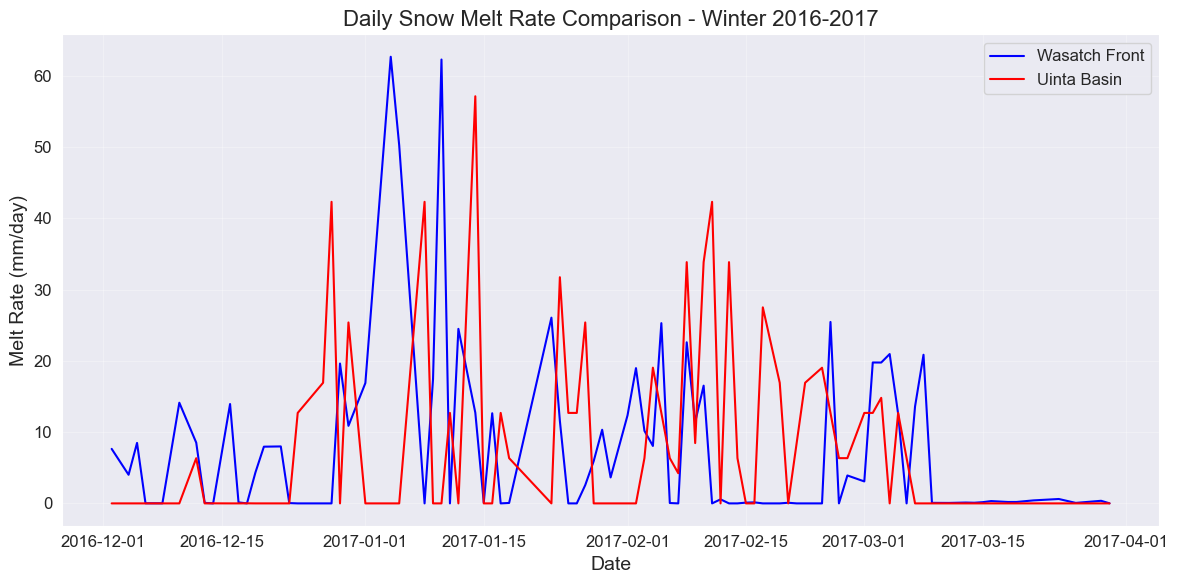

Melt rate comparison chart saved as melt_rate_comparison_winter_2016-2017.png


<Figure size 1200x800 with 0 Axes>

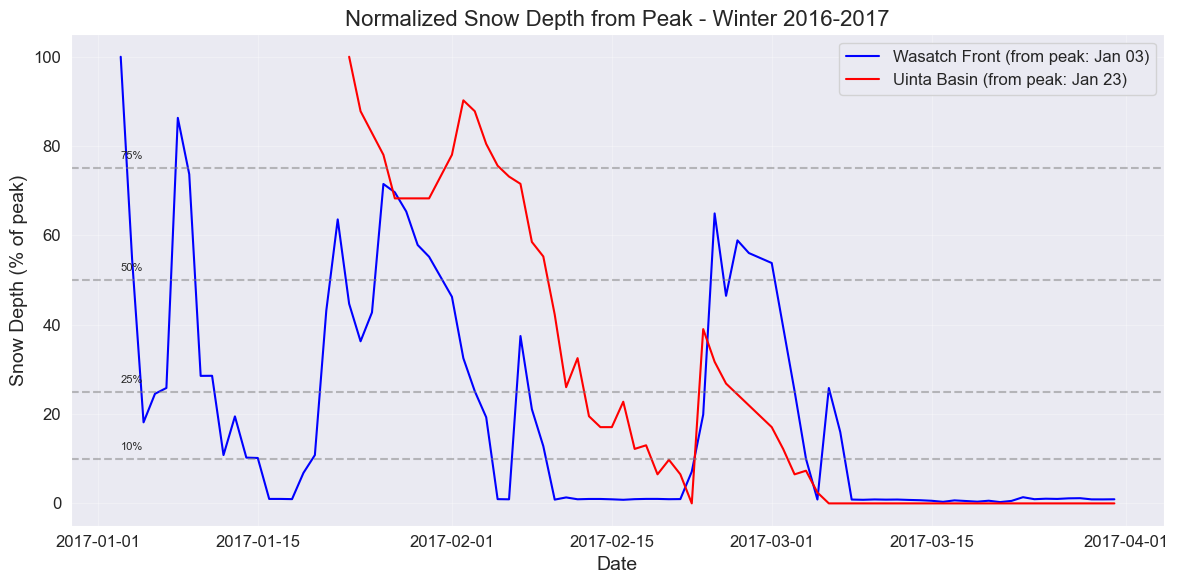

Normalized melt chart saved as normalized_melt_winter_2016-2017.png


<Figure size 1200x800 with 0 Axes>

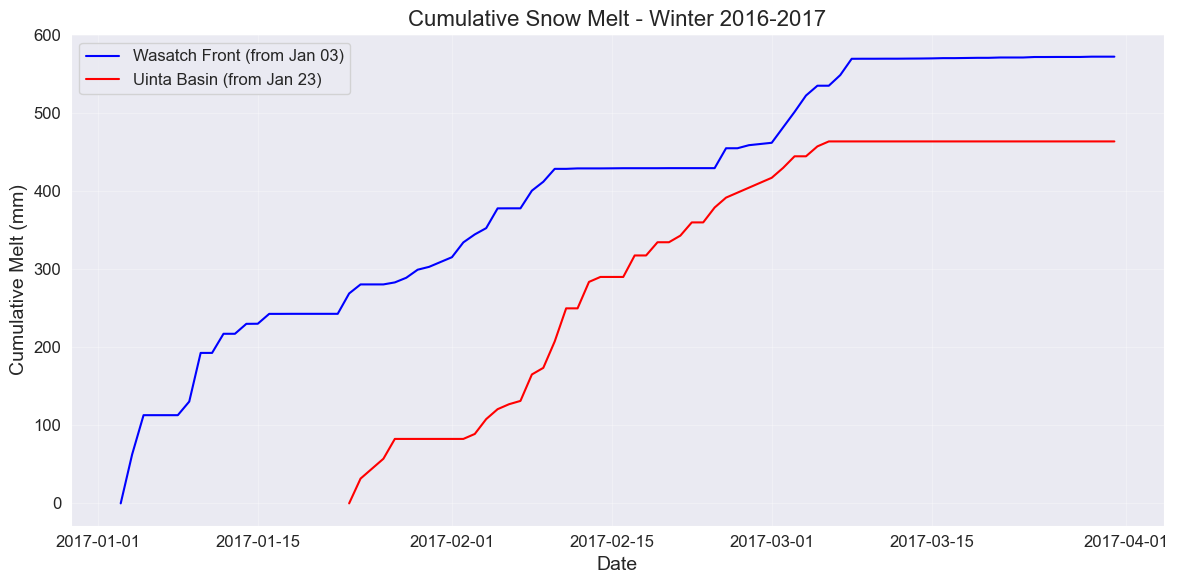

Cumulative melt chart saved as cumulative_melt_winter_2016-2017.png


<Figure size 1200x800 with 0 Axes>

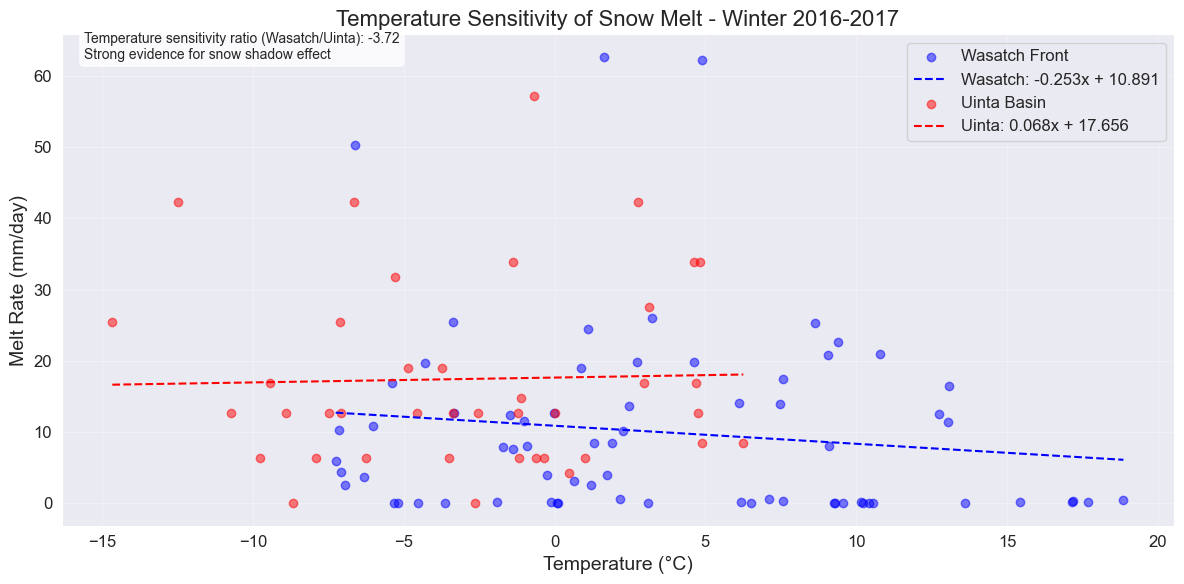

Temperature sensitivity chart saved as snow_shadow_temp_sensitivity_winter_2016-2017.png


<Figure size 1200x800 with 0 Axes>

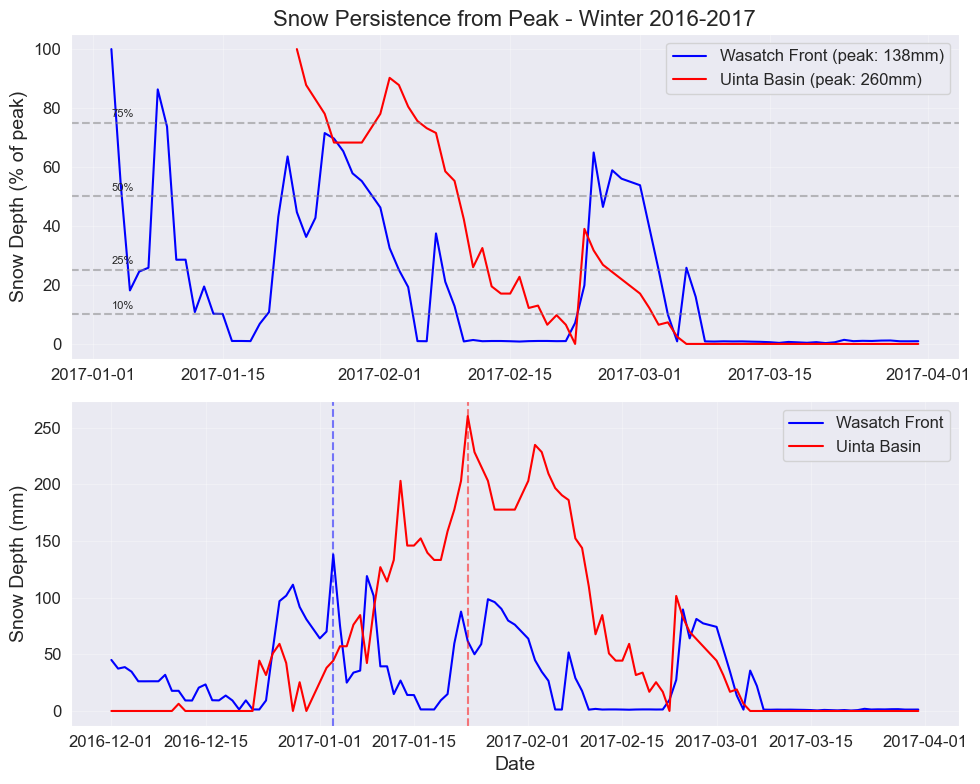

Snow persistence chart saved as snow_persistence_comparison_winter_2016-2017.png

--- GENERATING SNOW SHADOW REPORT ---
Snow shadow report saved to snow_shadow_report_winter_2016-2017.txt


<Figure size 1200x800 with 0 Axes>

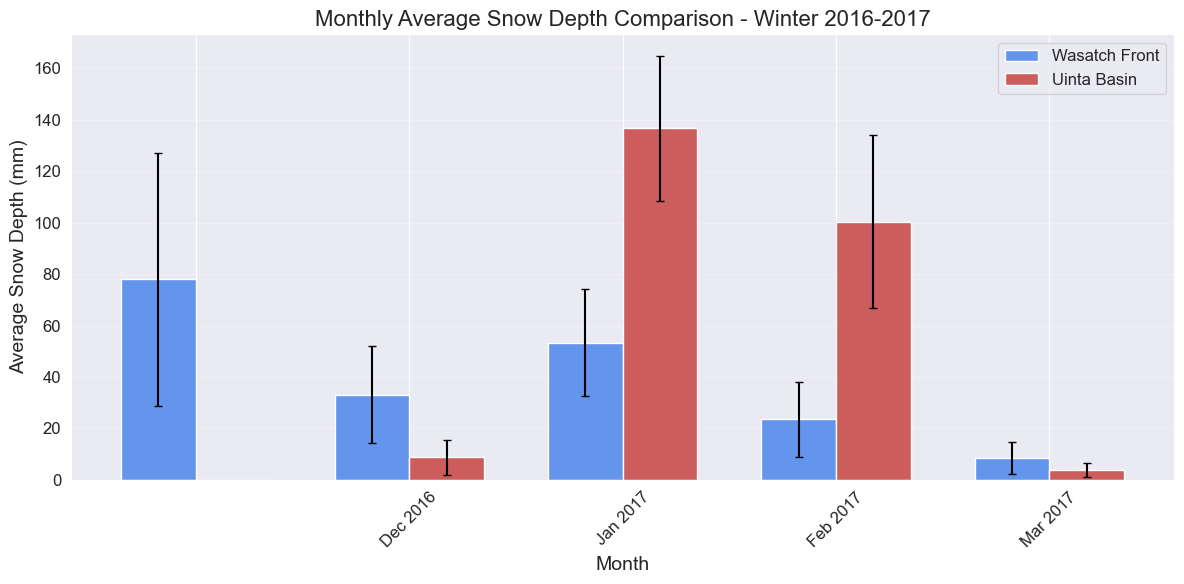

Monthly comparison chart saved as monthly_snow_depth_winter_2016-2017.png


<Figure size 1200x800 with 0 Axes>

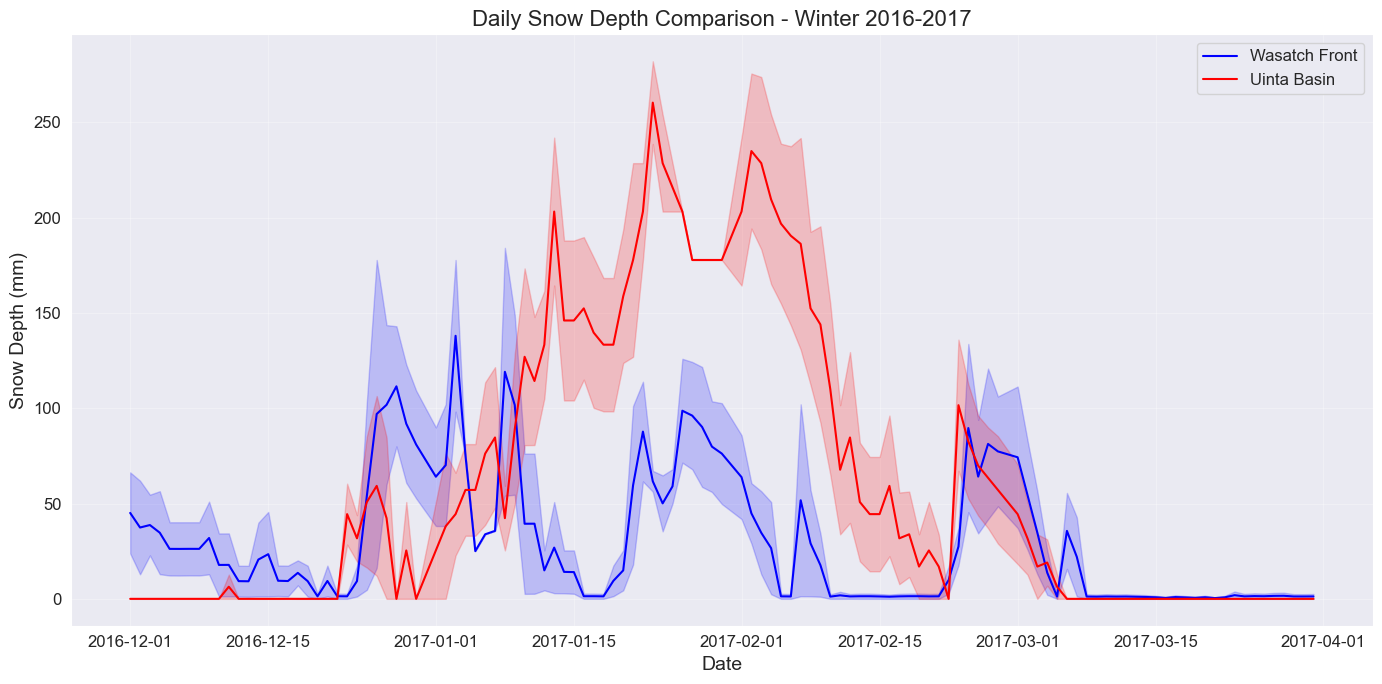

Daily snow depth chart saved as daily_snow_depth_winter_2016-2017.png
Daily snow depth and melt data saved to CSV files



DECADE SUMMARY ANALYSIS

=== DECADE TREND ANALYSIS ===
Wasatch Front trend: -0.12 mm/year (p-value: 0.9604, R²: 0.0004)
Uinta Basin trend: 4.06 mm/year (p-value: 0.7937, R²: 0.0123)

Snow Shadow Effect trend: -0.19 per year (p-value: 0.4248, R²: 0.1088)
(Positive slope indicates strengthening snow shadow effect over time)

=== DECADE SNOW DEPTH AND MELT ANALYSIS SUMMARY ===
Winter          Wasatch Avg (mm)     Uinta Avg (mm)       Diff (mm)       % Wasatch More  Shadow Strength
----------------------------------------------------------------------------------------------------
Winter 2023-2024 8.38 ± 3.99     0.00 ± nan     8.38       93.3%       Moderate
Winter 2022-2023 48.38 ± 27.87     246.42 ± nan     -198.03       7.5%       None
Winter 2021-2022 15.38 ± 6.39     0.00 ± nan     15.37       48.7%       None
Winter 2020-2021 13.94 ± nan     23.43 ± nan     -9.4

<Figure size 1200x800 with 0 Axes>

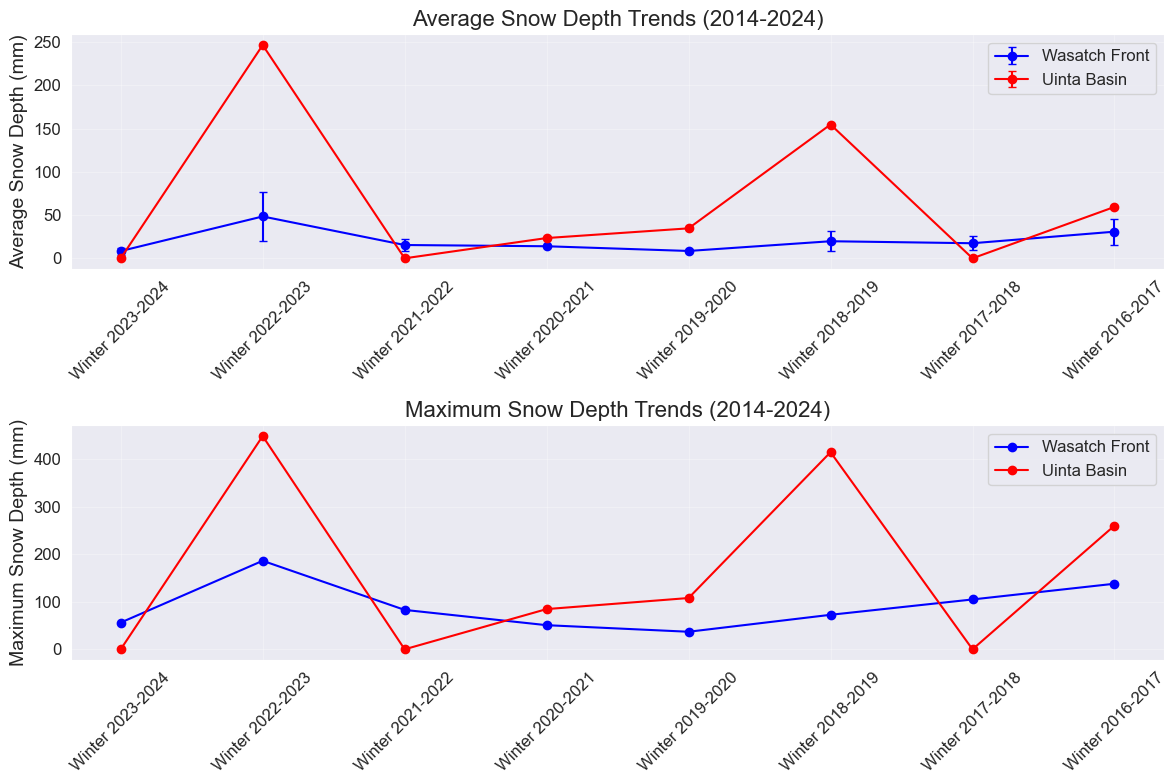

Decade summary chart saved as decade_snow_depth_trends.png


<Figure size 1200x800 with 0 Axes>

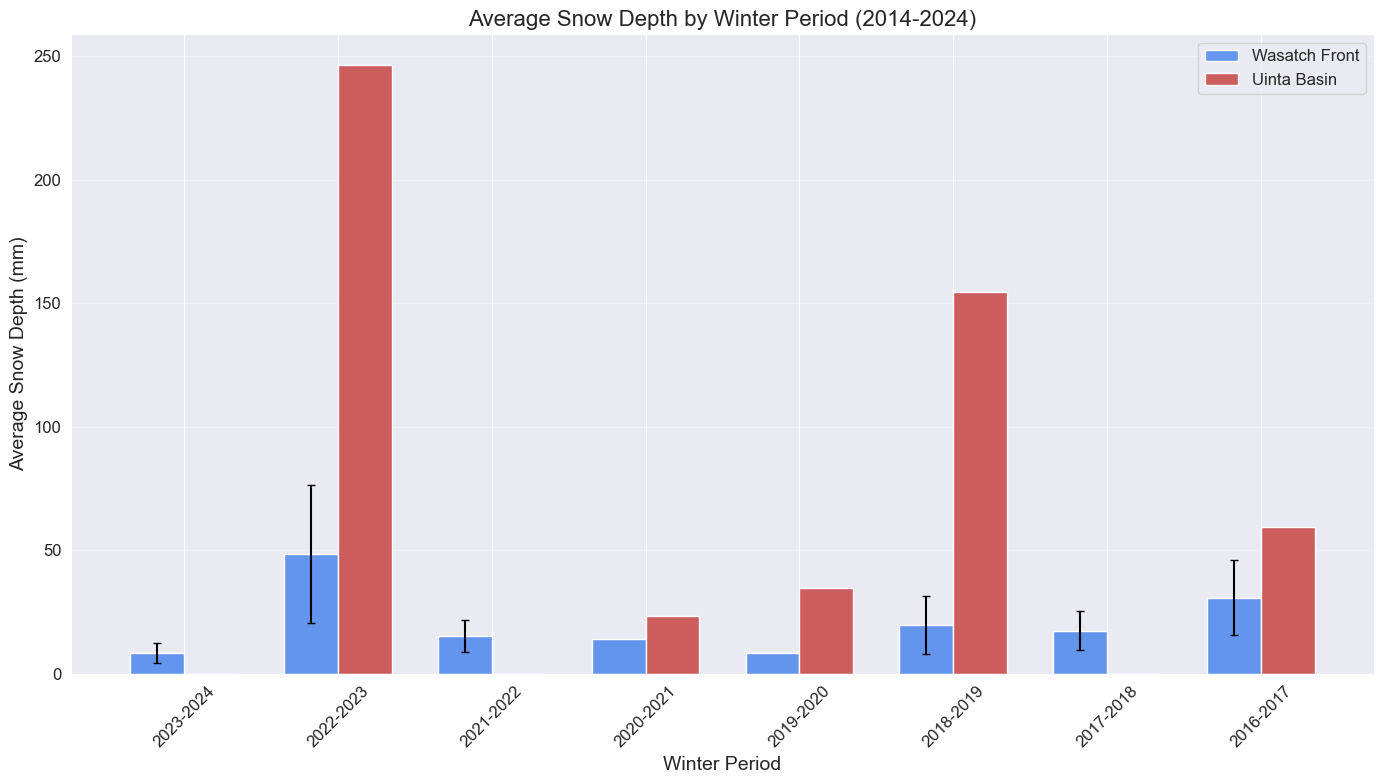

Decade comparison chart saved as decade_snow_depth_comparison.png


<Figure size 1200x800 with 0 Axes>

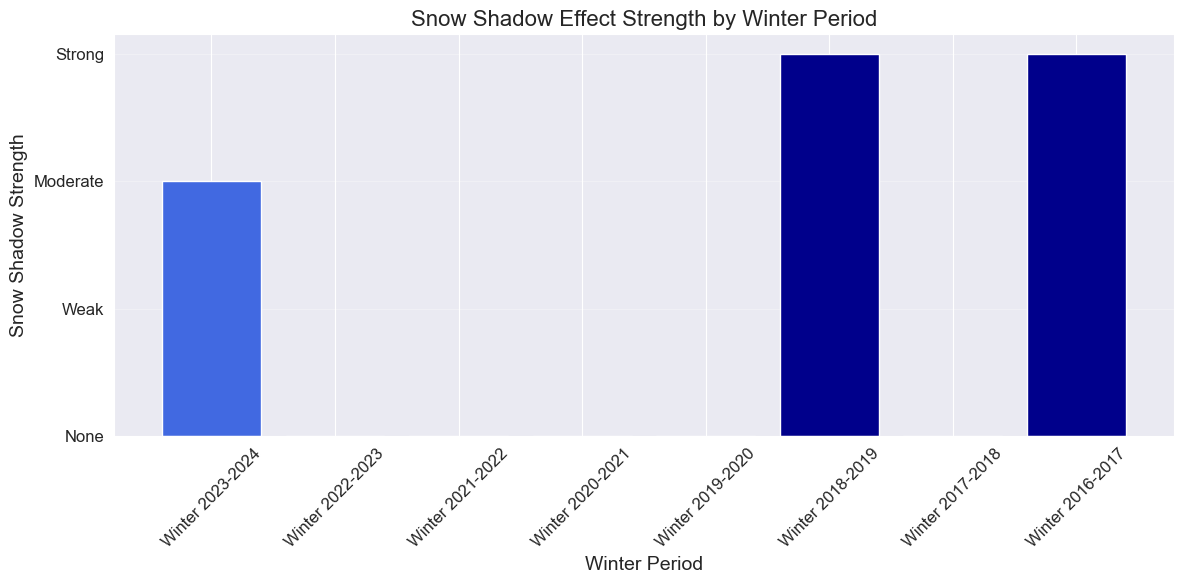

Snow shadow trend chart saved as decade_snow_shadow_trend.png


<Figure size 1200x800 with 0 Axes>

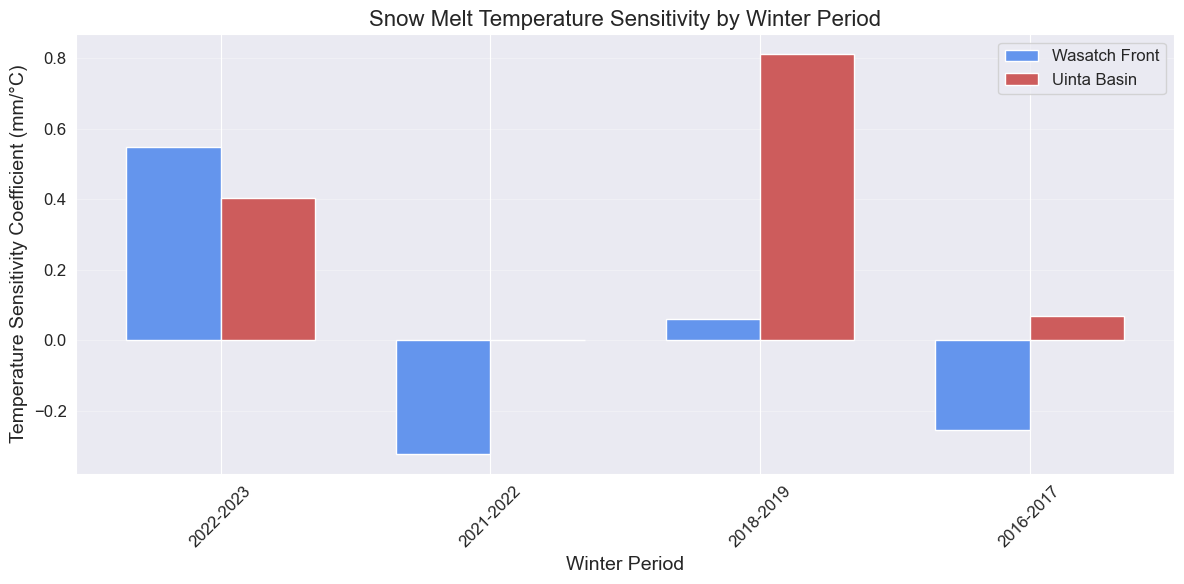

Temperature sensitivity chart saved as decade_temperature_sensitivity.png

Saving all results to file...
Analysis complete. Results saved to snow_analysis_results.pkl


In [8]:
all_results = {}

for winter in winter_periods:
    print(f"\n\n{'='*80}")
    print(f"ANALYZING {winter['name']}")
    print(f"{'='*80}")

    # Run the analysis for this winter
    results, data = analyze_snow_depth(winter)

    if results is not None:
        all_results[winter['name']] = results

# After all winters are analyzed, run the decade summary
if len(all_results) > 0:
    print("\n\n")
    print("="*80)
    print("DECADE SUMMARY ANALYSIS")
    print("="*80)
    summarize_decade_analysis(all_results)

    # Save all results
    print("\nSaving all results to file...")
    with open('snow_analysis_results.pkl', 'wb') as f:
        pickle.dump(all_results, f)
    print("Analysis complete. Results saved to snow_analysis_results.pkl")